<div class="alert alert-info" style="background-color: Black;">
    <h1>
        <center>
        <font size="8"><strong> Using Machine Learning Models to Predict Stock Returns for Apple Inc.<font>
        </center>
    </h1>
</div>

# **Project Overview**
This project employs various Machine Learning models—Linear Regression, Logistic Regression, Support Vector Machines (SVM), XGBoost, and Neural Networks—to predict whether the stock return of a company will increase or decrease in the next quarter. This prediction serves as a signal for whether to invest in the stock ("Buy") or abstain ("Not Buy"). Our predictive framework leverages historical quarterly stock data, the company's fundamental financials, and U.S. economic indicators, covering the period from 2009 to the end of 2024.

Our approach distinguishes itself from traditional approaches found online by not focusing on predicting prices (for profit maximization) or returns for the next day, month, or the relevant timeline. Instead, we aim to adopt a risk-averse strategy, and by using ML models, try to predict whether the return will be positive or negative in the next quarter. **Our goal is to invest only if the return is predicted to be positive in the next quarter**. In other words, we avoid investing if the model predicts that the return will be negative - disregrding the reality. However, we will only invest if the model says us to invest and we will try to consider metrics that evaluate how well our models predict and how often our models capture the reality. *This strategy serves as a hedge against inflation, ensuring that we invest in opportunities with positive returns rather than losing money to inflation.* The research is done from the perspective of an inexperienced investor who prefers a buy and hold approach to build wealth.

For this reason, we aim to consider a model that provides a high precision, followed by high recall for __the Buy signal next quarter__, so that we can invest in the stock confidently and hedge against inflation. Precision, asks the following question: Of all the instances the model predicted as positive, how many are actually positive? Recall, on the other hand,  asks the following question Of all the actual positive instances, how many did the model correctly predict as positive?

---

### **Linear Regression**
Despite the binary nature of our task, Linear Regression is included as a benchmark, implemented as follows:

1. **Target Variable**: The target is defined as `relative_change_in_stock_price_next_quarter`.  
2. **Training Process**: The model is trained on the specified features to learn the relationship between predictors and the target variable.  
3. **Prediction**: Predictions are made on the test set, and their signs (positive or negative) are compared to the actual values:  
   - Assign 1 if the predicted and actual signs match.  
   - Assign 0 otherwise.  
4. **Evaluation**: Accuracy is calculated as the average of these assignments, alongside a classification report to assess precision, recall, and F1-score.  

The **key metric is precision for the "Buy" class (1), followed by recall**, to ensure accurate identification of viable investment opportunities.

---

### **Logistic Regression**
Logistic Regression serves as a robust baseline for binary classification before feature engineering. 

1. **Target Variable**: The target is a binary variable, `Buy`, defined as:  
   - `1`: Stock return next quarter is positive.  
   - `0`: Otherwise.  
2. **Training Process**: The model learns the relationship between the features and the binary target.  
3. **Prediction**: Outputs whether to Buy (1) or Not Buy (0) for each quarter in the test set.  
4. **Evaluation**: Model performance is assessed using accuracy, precision, recall, and F1-score.  

As with Linear Regression, the **most critical metric is precision for the "Buy" class, followed by recall**.

---

### **Support Vector Machines**
Support Vector Machines (SVM) are employed for their ability to handle non-linear relationships between features and the target variable.  

1. **Target Variable**: The binary target variable, `Buy`, is defined as:  
   - `1`: Stock return next quarter is positive.  
   - `0`: Otherwise.  
2. **Training Process**: The SVM model is trained on the features to identify the optimal hyperplane or decision boundary.  
3. **Prediction**: The model predicts "Buy" or "Not Buy" for the test set.  
4. **Evaluation**: Similar to Logistic Regression, metrics such as accuracy, precision, recall, and F1-score are used.  

The **focus remains on precision for the "Buy" class, followed by recall**, to minimize false positive predictions.

---

### **XGBoost**
XGBoost is a gradient-boosting algorithm known for its scalability and efficiency, particularly on tabular data with complex patterns.  

1. **Target Variable**: The binary target variable, `Buy`, is defined as:  
   - `1`: Stock return next quarter is positive.  
   - `0`: Otherwise.  
2. **Training Process**: The XGBoost model iteratively improves predictions by combining weak learners (decision trees) while minimizing a loss function.  
3. **Prediction**: The model predicts "Buy" or "Not Buy" for the test set.  
4. **Evaluation**: Performance is measured using precision, recall, and F1-score, with a focus on the "Buy" class.  

XGBoost’s ability to capture non-linear interactions and its feature importance scores make it an integral part of our model ensemble.

---

### **Neural Networks**
Neural Networks are included to explore their potential for capturing highly complex, non-linear relationships in the data.

1. **Target Variable**: The binary target variable, `Buy`, is defined as:  
   - `1`: Stock return next quarter is positive.  
   - `0`: Otherwise.  
2. **Training Process**: Neural Networks are trained using backpropagation to minimize a binary cross-entropy loss. Layers and neurons are carefully tuned to balance model complexity and generalization.  
3. **Prediction**: Outputs a probability score for each class, converted to "Buy" or "Not Buy" using a threshold.  
4. **Evaluation**: Metrics include precision, recall, and F1-score, with an emphasis on precision for the "Buy" class.  

Regularization techniques such as dropout and weight decay are applied to mitigate overfitting, ensuring robust predictions.

---

### **Conclusion**
This comprehensive approach enables a rigorous comparison of traditional models like Linear Regression and Logistic Regression against advanced algorithms such as SVM, XGBoost, and Neural Networks. By emphasizing precision and recall for the "Buy" class, our investment strategy minimizes risks and optimizes returns, aligning with the goal of inflation hedging. 

---

So, having outlined our approach, we can move towards the data processing part!

For this project we will use __Yahoo Finance__ and __Alpha Vantage__ to gather the relevant data. We need the following data for each stock:
* The latest stock `closing` price for every *quarter*.
* The Average Volume of stocks traded every *quarter*.
* Quarterly Reported Earnings Per Share `reportedEPS`.
* Quarterly `Total Revenue`.
* Quarterly `Net Income`.
* Quarterly `GDP` of the US economy.
* Quarterly `Federal Funds Rate` set by the Federal Reserve Bank of the US.
* Quarterly `Consumer Price Index` (CPI) of the US economy.

Our choice of these features is based on the prevalent and obvious theory that the stock market is influenced by not only the historical stock prices and fundamental company financials, but also the overall economy. The GDP, Federal Funds Rate, and CPI are indicators of the overall health of the economy. The stock price and earnings per share are indicators of the confidence of investors in the value generated by the company. The volume of stocks traded is an indicator of the interest of investors in the stock. The net income and total revenue are indicators of the financial health of the company.

**Important Remark:** By incorporating not only company-specific data but also macroeconomic indicators, our analysis necessitates the use of quarterly data. This decision arises because economic data is typically reported on a quarterly basis, and company financials follow a similar reporting structure. While leveraging such data allows us to capture a broader spectrum of real-world information—thereby enhancing the robustness of our model—it does not encompass all relevant factors, such as market sentiment or geopolitical influences.

*This approach, however, imposes a significant limitation too*: the availability of data. Our dataset spans 60 quarters, and splitting the data into training and test sets (e.g., an 80%-20% split) leaves only 12 data points in the test set. Such a small test set raises concerns about the statistical reliability and generalizability of our results. It is crucial to acknowledge this limitation when interpreting the outcomes of the models and their predictions.

Lets begin by loading the relevant libraries and defining some important functions, later to be used by Neural Networks

---

In [1]:
import yfinance as yf
import requests
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.svm import SVC as SVM
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    precision_score, 
    recall_score, 
    mean_absolute_error, 
    root_mean_squared_error,
    r2_score,
    make_scorer,
    precision_recall_curve,
    auc
)
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
from typing import Any, Dict, List, Union
import math
import random
from xgboost import XGBClassifier


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False 
set_seed(42)

import warnings
warnings.filterwarnings("ignore")

In [2]:
def create_fold_loaders(X_train_tensor, y_train_tensor, n_splits):
    """
    About: Creates `fold_loaders` which is a list of tuples. Each tuple contains a training DataLoader and a validation DataLoader.
    It makes use of Stratified K-Fold cross-validation. It is used to split the data into `n_splits` folds. 
    The data is shuffled and the random seed is set to 42 for reproducibility.

    Args:
    - X_train_tensor: The training features tensor.
    - y_train_tensor: The training target tensor.
    - n_splits: The number of splits/folds.

    Returns:
    - fold_loaders: A list of tuples. Each tuple contains a training DataLoader and a validation DataLoader.
    """
    # Initialize Stratified K-Fold
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    # Initialize a list that will contain the training and validation DataLoaders for each fold
    fold_loaders = []
    
    for train_idx, val_idx in kfold.split(X_train_tensor.numpy(), y_train_tensor.numpy()):
        # loop through the splits and create the DataLoader for each fold
        X_train_fold = X_train_tensor[train_idx]
        y_train_fold = y_train_tensor[train_idx]
        X_val_fold = X_train_tensor[val_idx]
        y_val_fold = y_train_tensor[val_idx]
        
        # Create the DataLoader for the training and validation sets
        train_dataset = TensorDataset(X_train_fold, y_train_fold)
        val_dataset = TensorDataset(X_val_fold, y_val_fold)
        
        train_loader = DataLoader(train_dataset, batch_size=len(X_train_fold)) # Use the full batch size because we have limited data
        val_loader = DataLoader(val_dataset, batch_size=len(X_val_fold)) # Use the full batch size because we have limited data
        
        # Append the DataLoader for the fold to the list
        fold_loaders.append((train_loader, val_loader))
    
    return fold_loaders

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping_patience):
    """
    About: Trains the model and returns the best model state based on the validation loss.
    Early stopping is used to prevent overfitting.
    
    Args:
    - model: The neural network model.
    - train_loader: The DataLoader for the training set.
    - val_loader: The DataLoader for the validation set.
    - criterion: The loss function.
    - optimizer: The optimizer.
    - num_epochs: The number of epochs.
    - early_stopping_patience: The number of epochs to wait before early stopping.
    
    Returns:
    - model: The best model.
    - train_losses: A list of training losses.
    - val_losses: A list of validation losses.
    """
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    clip_value = 1.0



    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()
            train_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        # Calculate average losses
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Early stopping check
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {avg_train_loss:.4f}, "
                  f"Val Loss: {avg_val_loss:.4f}")

    # Load best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model, train_losses, val_losses

def evaluate_model(model, data_loader, threshold):
    """
    About: Evaluates the model on the data loader, containing the validation or test set in form of features and labels. 
    Returns the predictions and true labels.

    Args:
    - model: The trained neural network model.
    - data_loader: The DataLoader for the validation or test set.
    - threshold: The threshold to apply to the predictions. - If the output is greater than or equal to the threshold, it is considered as 1, else 0.

    Returns:
    - all_preds: The predictions.
    - all_labels: The true labels.
    """
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            # Forward pass
            outputs = model(inputs).squeeze()  # Ensure outputs are flattened
            predictions = (outputs >= threshold).float()  # Apply threshold
            
            # Convert tensors to numpy and flatten if necessary
            all_preds.extend(predictions.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())
    
    return np.array(all_preds), np.array(all_labels)


# Print metrics
def print_metrics(y_true, y_pred):
    """
    About: Prints the accuracy, classification report, and confusion matrix.
    
    Args:
    - y_true: The true labels.
    - y_pred: The predicted labels.
    
    Returns:
    - None
    - Prints the accuracy, classification report, and confusion matrix.
    - Displays the confusion matrix using a heatmap.
    """
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    print("\nConfusion Matrix:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.show()

# Plot training validation loss
def plot_train_val_loss(train_losses, val_losses):
    """
    About: Plots the training and validation losses.
    
    Args:
    - train_losses: A list of training losses.
    - val_losses: A list of validation losses.
    
    Returns:
    - None
    - Displays a plot of the training and validation losses.
    """

    plt.plot(train_losses, label="Train Loss", color="darkred")
    plt.plot(val_losses, label="Validation Loss", color="darkblue")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def train_and_evaluate(X_train_tensor, y_train_tensor, input_size, n_splits, learning_rate, dropout_rate, num_epochs, early_stopping_patience, threshold):
    """
    About: Trains and evaluates the neural network model using Stratified K-Fold cross-validation.
    The data is split into `n_splits` folds. The model is trained on `n_splits - 1` folds and validated on the remaining fold.
    
    Args:
    - X_train_tensor: The training features tensor.
    - y_train_tensor: The training target tensor.
    - input_size: The number of features.
    - n_splits: The number of splits/folds.
    - train_batch_size: The batch size for the DataLoader for the training set.
    - val_batch_size: The batch size for the DataLoader for the validation set.
    - learning_rate: The learning rate for the optimizer.
    - dropout_rate: The dropout rate.
    - num_epochs: The number of epochs.
    - early_stopping_patience: The number of epochs to wait before early stopping.
    - threshold: The threshold to apply to the predictions. - If the output is greater than or equal to the threshold, it is considered as 1, else 0.
    
    Returns:
    - final_model: The best model.
    """

    fold_loaders = create_fold_loaders(X_train_tensor, y_train_tensor, n_splits)

    best_model_state = None
    data = pd.DataFrame(columns=["fold", "precision", "recall", "accuracy", "model_state"])

    for fold, (train_loader, val_loader) in enumerate(fold_loaders):
        print(f"\nTraining Fold {fold + 1}")

        model = NeuralNetwork_Apple(input_size, dropout_rate)
        criterion = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        model, train_losses, val_losses = train_model(
            model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping_patience
        )

        val_preds, val_labels = evaluate_model(model, val_loader, threshold)
        fold_precision = precision_score(val_labels, val_preds, pos_label=1, zero_division=0)
        fold_recall = recall_score(val_labels, val_preds, pos_label=1)
        fold_accuracy = accuracy_score(val_labels, val_preds)

        # store the precision, recall, accuracy, and the model state for the best model in a fold in a dataframe
        data = pd.concat([data, pd.DataFrame([{"fold": fold + 1, "precision": fold_precision, "recall": fold_recall, "accuracy": fold_accuracy, "model_state": model.state_dict()}])], ignore_index=True)


        print(f"Fold {fold + 1} Precision: {fold_precision:.4f}")
        print(f"Fold {fold + 1} Recall: {fold_recall:.4f}")
        plot_train_val_loss(train_losses, val_losses)

    data.sort_values(by=["precision", "recall", "accuracy"], ascending=False, inplace=True)
    print(f"\nBest Precision across folds: {data.iloc[0]['precision']:.4f}")
    best_model_state = data.iloc[0]["model_state"]

    final_model = NeuralNetwork_Apple(input_size, dropout_rate)
    final_model.load_state_dict(best_model_state)
    display(data.head())

    return final_model, data

# Test the model
def test_model(model, X_test, y_test, threshold):
    """
    About: Tests the model on the test set and prints the metrics.
    
    Args:
    - model: The trained neural network model.
    - X_test: The test features tensor.
    - y_test: The test target tensor.
    - threshold: The threshold to apply to the predictions. - If the output is greater than or equal to the threshold, it is considered as 1, else 0.
    
    Returns:
    - predictions: The predictions.
    - true_labels: The true labels.
    """
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

    predictions, true_labels = evaluate_model(model, test_loader, threshold)

    print("\nTest Set Metrics:")
    print_metrics(true_labels, predictions)

    return predictions, true_labels

---

We will begin by collecting data for Apple Inc.

In [3]:
ticker = "AAPL" # Apple Inc. stock ticker
# Start date and end date for historical stock data. We want the data to range from start of 2009 to end of 2024.
# These dates were carefully chosen because we have the data available only for this range from the sources we are using.
start_date = "2009-06-30"
end_date = "2024-06-30"
# This choice of range ensure that we have the desired range of data for the model because we will eventually delete some rows due to computations.
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting the Close column and resampling the data to quarterly frequency and selecting the last (latest) value of each quarter.
close = data["Close"].resample("Q").last()
# Setting the index to the quarter, defining the desired date format, and then renaming the column "AAPL" to "Close". 
close.set_index(close.index.strftime("%Y-%m-%d"), inplace = True) 
close.index.name = "Quarter"
close.rename(columns = {"AAPL": "Close"}, inplace = True)
close.head()

Ticker         Close
Quarter             
2009-06-30  5.086786
2009-09-30  6.619643
2009-12-31  7.526071
2010-03-31  8.392857
2010-06-30  8.983214

In [4]:
print(f"Shape of the dataframe: {close.shape}")

Shape of the dataframe: (61, 1)


In [5]:
print(f"Number of missing values in the dataframe: {close.isnull().sum().sum()}")

Number of missing values in the dataframe: 0


In [6]:
# Repeating similar operations for the Volume column.
avg_vol = data["Volume"].resample("Q").mean()
avg_vol.set_index(avg_vol.index.strftime("%Y-%m-%d"), inplace = True)
avg_vol.index.name = "Quarter"
avg_vol.rename(columns = {"AAPL": "Volume"}, inplace = True)
avg_vol.head()

Ticker            Volume
Quarter                 
2009-06-30  4.342240e+08
2009-09-30  4.546341e+08
2009-12-31  5.125769e+08
2010-03-31  6.245778e+08
2010-06-30  7.476355e+08

In [7]:
print(f"Shape of the dataframe: {avg_vol.shape}")

Shape of the dataframe: (61, 1)


In [8]:
print(f"Number of missing values in the dataframe: {avg_vol.isnull().sum().sum()}")

Number of missing values in the dataframe: 0


In [9]:
# Concatenating the two dataframes along the columns axis to get dataframe related to the stock data.
apple_stock_df = pd.concat([close, avg_vol], axis = 1)
apple_stock_df.head(3)

Ticker         Close        Volume
Quarter                           
2009-06-30  5.086786  4.342240e+08
2009-09-30  6.619643  4.546341e+08
2009-12-31  7.526071  5.125769e+08

Until now, we have the data for stock prices and volume. Now, we will get the fundamental financial data for the company and also the economic indicators data using Alpha Vantage.

In [10]:
# Define the dictionary of stock tickers for ease.
tickers = {
    "apple": "AAPL"
}
# API key for Alpha Vantage
api = "S3NWX7VJBO74RG2L"
# Define the URLs for the API calls - url for earnings data and url for income statement data.
url_earnings = f"https://www.alphavantage.co/query?function=EARNINGS&symbol={tickers['apple']}&apikey={api}"
url_income_statement = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={tickers['apple']}&apikey={api}"


In [11]:
# Start by fetching the earnings data for Apple Inc. We will use the Reported EPS (Earnings Per Share) as a feature for our model.

request = requests.get(url_earnings) # a json file
data = request.json() # convert the json file to a dictionary
with open('apple_earnings.json', 'w') as f:
    json.dump(data, f) # save the dictionary to a json file

In [12]:
with open('apple_earnings.json', 'r') as f:
    earnings_dict = json.load(f) # open the json file and load the dictionary
    
if "quarterlyEarnings" in earnings_dict: # check if the key "quarterlyEarnings" is in the dictionary
    earnings = earnings_dict["quarterlyEarnings"]
    apple_earnings_df = pd.DataFrame(earnings) # convert the dictionary of quarterly earnings to a dataframe
else:
    print("No earnings data found.") # if the key is not found, print this message

In [13]:
apple_earnings_df.head()

fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise  \
0       2024-09-30   2024-10-31        1.64          1.6     0.04   
1       2024-06-30   2024-08-01         1.4         1.35     0.05   
2       2024-03-31   2024-05-02        1.53          1.5     0.03   
3       2023-12-31   2024-02-01        2.18          2.1     0.08   
4       2023-09-30   2023-11-02        1.46         1.39     0.07   

  surprisePercentage   reportTime  
0                2.5  post-market  
1             3.7037  post-market  
2                  2  post-market  
3             3.8095  post-market  
4              5.036  post-market

In [14]:
apple_earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fiscalDateEnding    115 non-null    object
 1   reportedDate        115 non-null    object
 2   reportedEPS         115 non-null    object
 3   estimatedEPS        115 non-null    object
 4   surprise            115 non-null    object
 5   surprisePercentage  115 non-null    object
 6   reportTime          115 non-null    object
dtypes: object(7)
memory usage: 6.4+ KB


In [15]:
# convert the date columns to datetime objects
apple_earnings_df["fiscalDateEnding"] = pd.to_datetime(apple_earnings_df["fiscalDateEnding"])
apple_earnings_df["reportedDate"] = pd.to_datetime(apple_earnings_df["reportedDate"])

In [16]:
# we will only keep fiscalDateEnding and reportedEPS - where reportedEPS is the reported earnings per share
apple_earnings_df = apple_earnings_df[["fiscalDateEnding", "reportedEPS"]]

In [17]:
# Masking the data to get the desired range of data.
mask = (apple_earnings_df["fiscalDateEnding"] >= start_date) & (apple_earnings_df["fiscalDateEnding"] <= end_date)
apple_earnings_df = apple_earnings_df[mask]

In [18]:
# Sorting the data by the fiscalDateEnding column.
apple_earnings_df.sort_values(by = "fiscalDateEnding", inplace = True)

In [19]:
apple_earnings_df.head(3)

fiscalDateEnding reportedEPS
61       2009-06-30      0.0475
60       2009-09-30       0.065
59       2009-12-31        0.13

In [20]:
apple_earnings_df.tail(3)

fiscalDateEnding reportedEPS
3       2023-12-31        2.18
2       2024-03-31        1.53
1       2024-06-30         1.4

In [21]:
print(f'Number of missing values in the dataframe: {apple_earnings_df.isnull().sum().sum()}')

Number of missing values in the dataframe: 0


In [22]:
# we will make fiscalDateEnding the index
apple_earnings_df.set_index("fiscalDateEnding", inplace = True)

In [23]:
apple_earnings_df.index = apple_earnings_df.index.strftime("%Y-%m-%d")

In [24]:
apple_earnings_df.shape

(61, 1)

Moving on to the income statements (quarterly) for Apple

In [25]:
# Similar operations for the income statement data.
request = requests.get(url_income_statement)
data = request.json() 
with open('apple_income_statement.json', 'w') as f:
    json.dump(data, f)

In [26]:
with open('apple_income_statement.json', 'r') as f:
    income_statement_dict = json.load(f)
    
if "quarterlyReports" in income_statement_dict: # check if the key "quarterlyReports" is in the dictionary
    income_statement = income_statement_dict["quarterlyReports"] # get the data
    apple_income_statement_df = pd.DataFrame(income_statement)  # convert the dictionary of quarterly income statement to a dataframe
else:
    print("No income statement data found.")

In [27]:
apple_income_statement_df.head()

fiscalDateEnding reportedCurrency  grossProfit  totalRevenue costOfRevenue  \
0       2024-09-30              USD  43879000000   94930000000   57574000000   
1       2024-06-30              USD  39678000000   85777000000   52419000000   
2       2024-03-31              USD  42271000000   90753000000   54950000000   
3       2023-12-31              USD  54855000000  119575000000   71506000000   
4       2023-09-30              USD  40427000000   88496000000   55222000000   

  costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                51051000000     29591000000                      6523000000   
1                46099000000     25352000000                      6320000000   
2                48482000000     27900000000                      6468000000   
3                64720000000     40373000000                      6786000000   
4                49071000000     26969000000                      6151000000   

  researchAndDevelopment operatingExpenses  ... depreciation  \
0             7765000000       14288000000  ...         None   
1             8006000000       14326000000  ...         None   
2             7903000000       14371000000  ...         None   
3             7696000000       14482000000  ...         None   
4             7307000000       13458000000  ...         None   

  depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
0                  2911000000     29610000000      14874000000   
1                  2850000000     25494000000       4046000000   
2                  2836000000     28058000000       4422000000   
3                  2848000000     40323000000       6407000000   
4                  2653000000     26998000000       4042000000   

  interestAndDebtExpense netIncomeFromContinuingOperations  \
0                   None                       14736000000   
1                   None                       21448000000   
2                   None                       23636000000   
3                   None                       33916000000   
4             1002000000                       22956000000   

  comprehensiveIncomeNetOfTax         ebit       ebitda    netIncome  
0                 15980000000  29591000000  32502000000  14736000000  
1                 21992000000  25352000000  28202000000  21448000000  
2                 24054000000  27900000000  30736000000  23636000000  
3                 35990000000  40373000000  43221000000  33916000000  
4                 23305000000  28000000000  29622000000  22956000000  

[5 rows x 26 columns]

In [28]:
apple_income_statement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   fiscalDateEnding                   66 non-null     object
 1   reportedCurrency                   66 non-null     object
 2   grossProfit                        66 non-null     object
 3   totalRevenue                       66 non-null     object
 4   costOfRevenue                      66 non-null     object
 5   costofGoodsAndServicesSold         66 non-null     object
 6   operatingIncome                    66 non-null     object
 7   sellingGeneralAndAdministrative    66 non-null     object
 8   researchAndDevelopment             66 non-null     object
 9   operatingExpenses                  66 non-null     object
 10  investmentIncomeNet                66 non-null     object
 11  netInterestIncome                  66 non-null     object
 12  interestIn

In [29]:
# convert the date columns to datetime objects
apple_income_statement_df["fiscalDateEnding"] = pd.to_datetime(apple_income_statement_df["fiscalDateEnding"])

In [30]:
# we only need fiscalDateEnding, totalRevenue, netIncome for our analysis
apple_income_statement_df = apple_income_statement_df[["fiscalDateEnding", "totalRevenue", "netIncome"]]
# Masking the data to get the desired range of data.
mask = (apple_income_statement_df["fiscalDateEnding"] >= start_date) & (apple_income_statement_df["fiscalDateEnding"] <= end_date)
apple_income_statement_df = apple_income_statement_df[mask]

In [31]:
apple_income_statement_df.sort_values(by = "fiscalDateEnding", ascending=True, inplace = True)

In [32]:
apple_income_statement_df.head(3)

fiscalDateEnding totalRevenue   netIncome
61       2009-06-30   8337000000  1828000000
60       2009-09-30  12207000000  2532000000
59       2009-12-31  15683000000  3378000000

In [33]:
apple_income_statement_df.tail(3)

fiscalDateEnding  totalRevenue    netIncome
3       2023-12-31  119575000000  33916000000
2       2024-03-31   90753000000  23636000000
1       2024-06-30   85777000000  21448000000

In [34]:
apple_income_statement_df.shape

(61, 3)

In [35]:
apple_income_statement_df.set_index("fiscalDateEnding", inplace = True)

In [36]:
apple_income_statement_df.index = apple_income_statement_df.index.strftime("%Y-%m-%d")

In [37]:
print(f"Number of missing values in the dataframe: {apple_income_statement_df.isnull().sum().sum()}")

Number of missing values in the dataframe: 0


Now, it is time to merge all the company specific data!

In [38]:
# merge all datasets into one dataframe - apple_df. concat along the columns axis.
apple_df = pd.concat([apple_stock_df, apple_earnings_df, apple_income_statement_df], axis = 1)
apple_df.head()

Close        Volume reportedEPS totalRevenue   netIncome
2009-06-30  5.086786  4.342240e+08      0.0475   8337000000  1828000000
2009-09-30  6.619643  4.546341e+08       0.065  12207000000  2532000000
2009-12-31  7.526071  5.125769e+08        0.13  15683000000  3378000000
2010-03-31  8.392857  6.245778e+08        0.12  13499000000  3074000000
2010-06-30  8.983214  7.476355e+08       0.125  15700000000  3253000000

Somehow, in later evaluations, there is a None (string) in the totalRevenue column, stemming from the part where we prepared `apple_income_statement_df`. However, and fortunately, this is not an issue because the dataset was saved before and a copy will be used to load the data later!

In [39]:
# we will now make the datatypes to numeric (float) all together
# apple_df = apple_df.astype(float)

In [40]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2009-06-30 to 2024-06-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         61 non-null     float64
 1   Volume        61 non-null     float64
 2   reportedEPS   61 non-null     object 
 3   totalRevenue  61 non-null     object 
 4   netIncome     61 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.9+ KB


Now, we will consider adding the relevant economic data for our time period to enhance the predictions. 

In [41]:
# Url to retrieve the Real GDP data from Alpha Vantage.
url_gdp = f'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey={api}&datatype=csv'
data = requests.get(url_gdp)
with open('gdp.csv', 'w') as f:
    f.write(data.text)

In [42]:
with open('gdp.csv', 'r') as f: # open the saved csv file
    gdp_df = pd.read_csv(f)
# convert the timestamp column to datetime objects
gdp_df["timestamp"] = pd.to_datetime(gdp_df["timestamp"])

In [43]:
gdp_df.head(3)

timestamp     value
0 2024-07-01  5866.841
1 2024-04-01  5817.169
2 2024-01-01  5638.455

The timestamp column is different from the timestamps we are dealing with. It is one day more than our timestamp. Simply adjust it by substracting one day!

In [44]:
gdp_df["timestamp"] = gdp_df["timestamp"] - pd.Timedelta(days = 1)

In [45]:
# Masking the data to get the desired range of data.
mask = (gdp_df["timestamp"] >= start_date) & (gdp_df["timestamp"] <= end_date)
gdp_df = gdp_df[mask]

In [46]:
gdp_df.sort_values(by = "timestamp", inplace = True)
gdp_df.set_index("timestamp", inplace = True)
gdp_df.index = gdp_df.index.strftime("%Y-%m-%d")
print(f"Shape of gdp_df: {gdp_df.shape}")
gdp_df.rename(columns = {"value": "GDP"}, inplace = True)
gdp_df.head()

Shape of gdp_df: (61, 1)


GDP
timestamp           
2009-06-30  4102.854
2009-09-30  4209.064
2009-12-31  4055.062
2010-03-31  4188.706
2010-06-30  4229.410

In [47]:
print(f"Number of missing values in the dataframe: {gdp_df.isnull().sum().sum()}")

Number of missing values in the dataframe: 0


We will now retrive the Federal Funds Rate (monthly) data:

In [48]:
url_fed_funds = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={api}&datatype=csv'
data = requests.get(url_fed_funds)
with open('fed_funds.csv', 'w') as f:
    f.write(data.text)

In [49]:
with open('fed_funds.csv', 'r') as f:
    fed_funds_df = pd.read_csv(f) # open the saved csv file
fed_funds_df.head()

timestamp  value
0  2024-11-01   4.64
1  2024-10-01   4.83
2  2024-09-01   5.13
3  2024-08-01   5.33
4  2024-07-01   5.33

In [50]:
# convert the timestamp column to datetime objects
fed_funds_df["timestamp"] = pd.to_datetime(fed_funds_df["timestamp"])

In [51]:
# make timestamp the index and take the average interest rate per quarter
fed_funds_df.set_index("timestamp", inplace = True)
fed_funds_df = fed_funds_df.resample("Q").mean()

In [52]:
# Masking the data to get the desired range of data.
mask = (fed_funds_df.index >= start_date) & (fed_funds_df.index <= end_date)
fed_funds_df = fed_funds_df[mask]

In [53]:
fed_funds_df.sort_values(by = "timestamp", inplace = True)
print(f"Shape of fed_funds_df: {fed_funds_df.shape}")
fed_funds_df.index = fed_funds_df.index.strftime("%Y-%m-%d")
fed_funds_df.rename(columns = {"value": "Fed_Funds_Rate"}, inplace = True)
fed_funds_df.head()

Shape of fed_funds_df: (61, 1)


Fed_Funds_Rate
timestamp                 
2009-06-30        0.180000
2009-09-30        0.156667
2009-12-31        0.120000
2010-03-31        0.133333
2010-06-30        0.193333

In [54]:
print(f"Number of missing values in the dataframe: {fed_funds_df.isnull().sum().sum()}")

Number of missing values in the dataframe: 0


Finally, we will get the CPI data from Alpha Vantage

In [55]:
# Url to retrieve the Consumer Price Index (CPI) data from Alpha Vantage.
url_cpi = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api}&datatype=csv'
data = requests.get(url_cpi)
with open('monthly_cpi.csv', 'w') as f:
    f.write(data.text)

In [56]:
with open('monthly_cpi.csv', 'r') as f:
    cpi_df = pd.read_csv(f) # open the saved csv file
cpi_df.head(3)

timestamp    value
0  2024-11-01  315.493
1  2024-10-01  315.664
2  2024-09-01  315.301

In [57]:
# Performing similar operations as before.
cpi_df["timestamp"] = pd.to_datetime(cpi_df["timestamp"])
cpi_df.set_index("timestamp", inplace = True)
cpi_df.sort_values(by = "timestamp", inplace = True)
cpi_df = cpi_df.resample("Q").mean() # resampling the data to quarterly frequency and taking the mean of each quarter.
# Masking the data to get the desired range of data.
mask = (cpi_df.index >= start_date) & (cpi_df.index <= end_date)
cpi_df = cpi_df[mask]
print(f"Shape of the dataframe: {cpi_df.shape}")
cpi_df.index = cpi_df.index.strftime("%Y-%m-%d")
cpi_df.rename(columns = {"value": "CPI"}, inplace = True)
cpi_df.head(3)

Shape of the dataframe: (61, 1)


CPI
timestamp          
2009-06-30  214.263
2009-09-30  215.718
2009-12-31  216.152

In [58]:
print(f"Number of missing values in the dataframe: {cpi_df.isnull().sum().sum()}")

Number of missing values in the dataframe: 0


In [59]:
# merge all of them into one dataframe with the name: economic_df
economic_df = pd.concat([gdp_df, fed_funds_df, cpi_df], axis = 1)
economic_df.head()

GDP  Fed_Funds_Rate         CPI
timestamp                                       
2009-06-30  4102.854        0.180000  214.263000
2009-09-30  4209.064        0.156667  215.718000
2009-12-31  4055.062        0.120000  216.152000
2010-03-31  4188.706        0.133333  217.019667
2010-06-30  4229.410        0.193333  218.050667

Ultimately, we are ready to merge the company specific data, stored in `apple_df`, with the economic data, stored in `economic_df`. All data is quarterly in nature!

In [60]:
# merge the economic_df with the apple_df
apple_df = pd.concat([apple_df, economic_df], axis = 1)

In [61]:
# apple_df.to_csv("apple_df.csv", index = True)

In [3]:
# Load the stored data for apple containing all the features.
apple_df = pd.read_csv("apple_df.csv", index_col = 0)

In [5]:
apple_df.head()

Close        Volume  reportedEPS  totalRevenue     netIncome  \
2009-06-30  5.086786  4.342240e+08       0.0475  8.337000e+09  1.828000e+09   
2009-09-30  6.619643  4.546341e+08       0.0650  1.220700e+10  2.532000e+09   
2009-12-31  7.526071  5.125769e+08       0.1300  1.568300e+10  3.378000e+09   
2010-03-31  8.392857  6.245778e+08       0.1200  1.349900e+10  3.074000e+09   
2010-06-30  8.983214  7.476355e+08       0.1250  1.570000e+10  3.253000e+09   

                 GDP  Fed_Funds_Rate         CPI  
2009-06-30  4102.854        0.180000  214.263000  
2009-09-30  4209.064        0.156667  215.718000  
2009-12-31  4055.062        0.120000  216.152000  
2010-03-31  4188.706        0.133333  217.019667  
2010-06-30  4229.410        0.193333  218.050667

In [5]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2009-06-30 to 2024-06-30
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           61 non-null     float64
 1   Volume          61 non-null     float64
 2   reportedEPS     61 non-null     float64
 3   totalRevenue    61 non-null     float64
 4   netIncome       61 non-null     float64
 5   GDP             61 non-null     float64
 6   Fed_Funds_Rate  61 non-null     float64
 7   CPI             61 non-null     float64
dtypes: float64(8)
memory usage: 4.3+ KB


# Exploratory Data Analysis

We will start by examining the structure of the our dataset using `.info()` method from pandas and utilize `.describe()` method to get the summary statistics.

The index contains the dates for each quarter starting from mid 2009 until the mid of 2024! We will start by printing the shape of the dataset!

In [4]:
row_number, col_number = apple_df.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset contains \'{col_number}\' columns')

The dataset contains '61' rows.
The dataset contains '8' columns


We have the stock and economic data for 61 quarters for the Apple Inc. and U.S economy!

In [66]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2009-06-30 to 2024-06-30
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           61 non-null     float64
 1   Volume          61 non-null     float64
 2   reportedEPS     61 non-null     float64
 3   totalRevenue    61 non-null     float64
 4   netIncome       61 non-null     float64
 5   GDP             61 non-null     float64
 6   Fed_Funds_Rate  61 non-null     float64
 7   CPI             61 non-null     float64
dtypes: float64(8)
memory usage: 4.3+ KB


All of our columns are numeric in type and there is no missing value!

In [67]:
apple_df = apple_df.round(6)

In [68]:
apple_df.describe()

Close        Volume  reportedEPS  totalRevenue     netIncome  \
count   61.000000  6.100000e+01    61.000000  6.100000e+01  6.100000e+01   
mean    62.486306  2.478417e+08     0.739139  5.915210e+10  1.397841e+10   
std     60.706363  1.878978e+08     0.530374  2.809761e+10  7.794279e+09   
min      5.086786  5.293779e+07     0.047500  8.337000e+09  1.828000e+09   
25%     19.169287  1.060938e+08     0.355000  3.918600e+10  8.467000e+09   
50%     31.357500  1.682538e+08     0.550000  5.451200e+10  1.156100e+10   
75%    115.809998  4.188073e+08     1.200000  8.224000e+10  1.996500e+10   
max    210.619995  7.476355e+08     2.180000  1.232510e+11  3.463000e+10   

               GDP  Fed_Funds_Rate         CPI  
count    61.000000       61.000000   61.000000  
mean   4884.007508        1.054098  250.225098  
std     511.173566        1.574946   27.203341  
min    4055.062000        0.060000  214.263000  
25%    4419.140000        0.100000  231.739667  
50%    4819.182000        0.160000  241.504667  
75%    5298.828000        1.446667  259.766333  
max    5866.841000        5.330000  313.930667

We will start by plotting a pairplot to see the relationship between the variables - espcially the close price


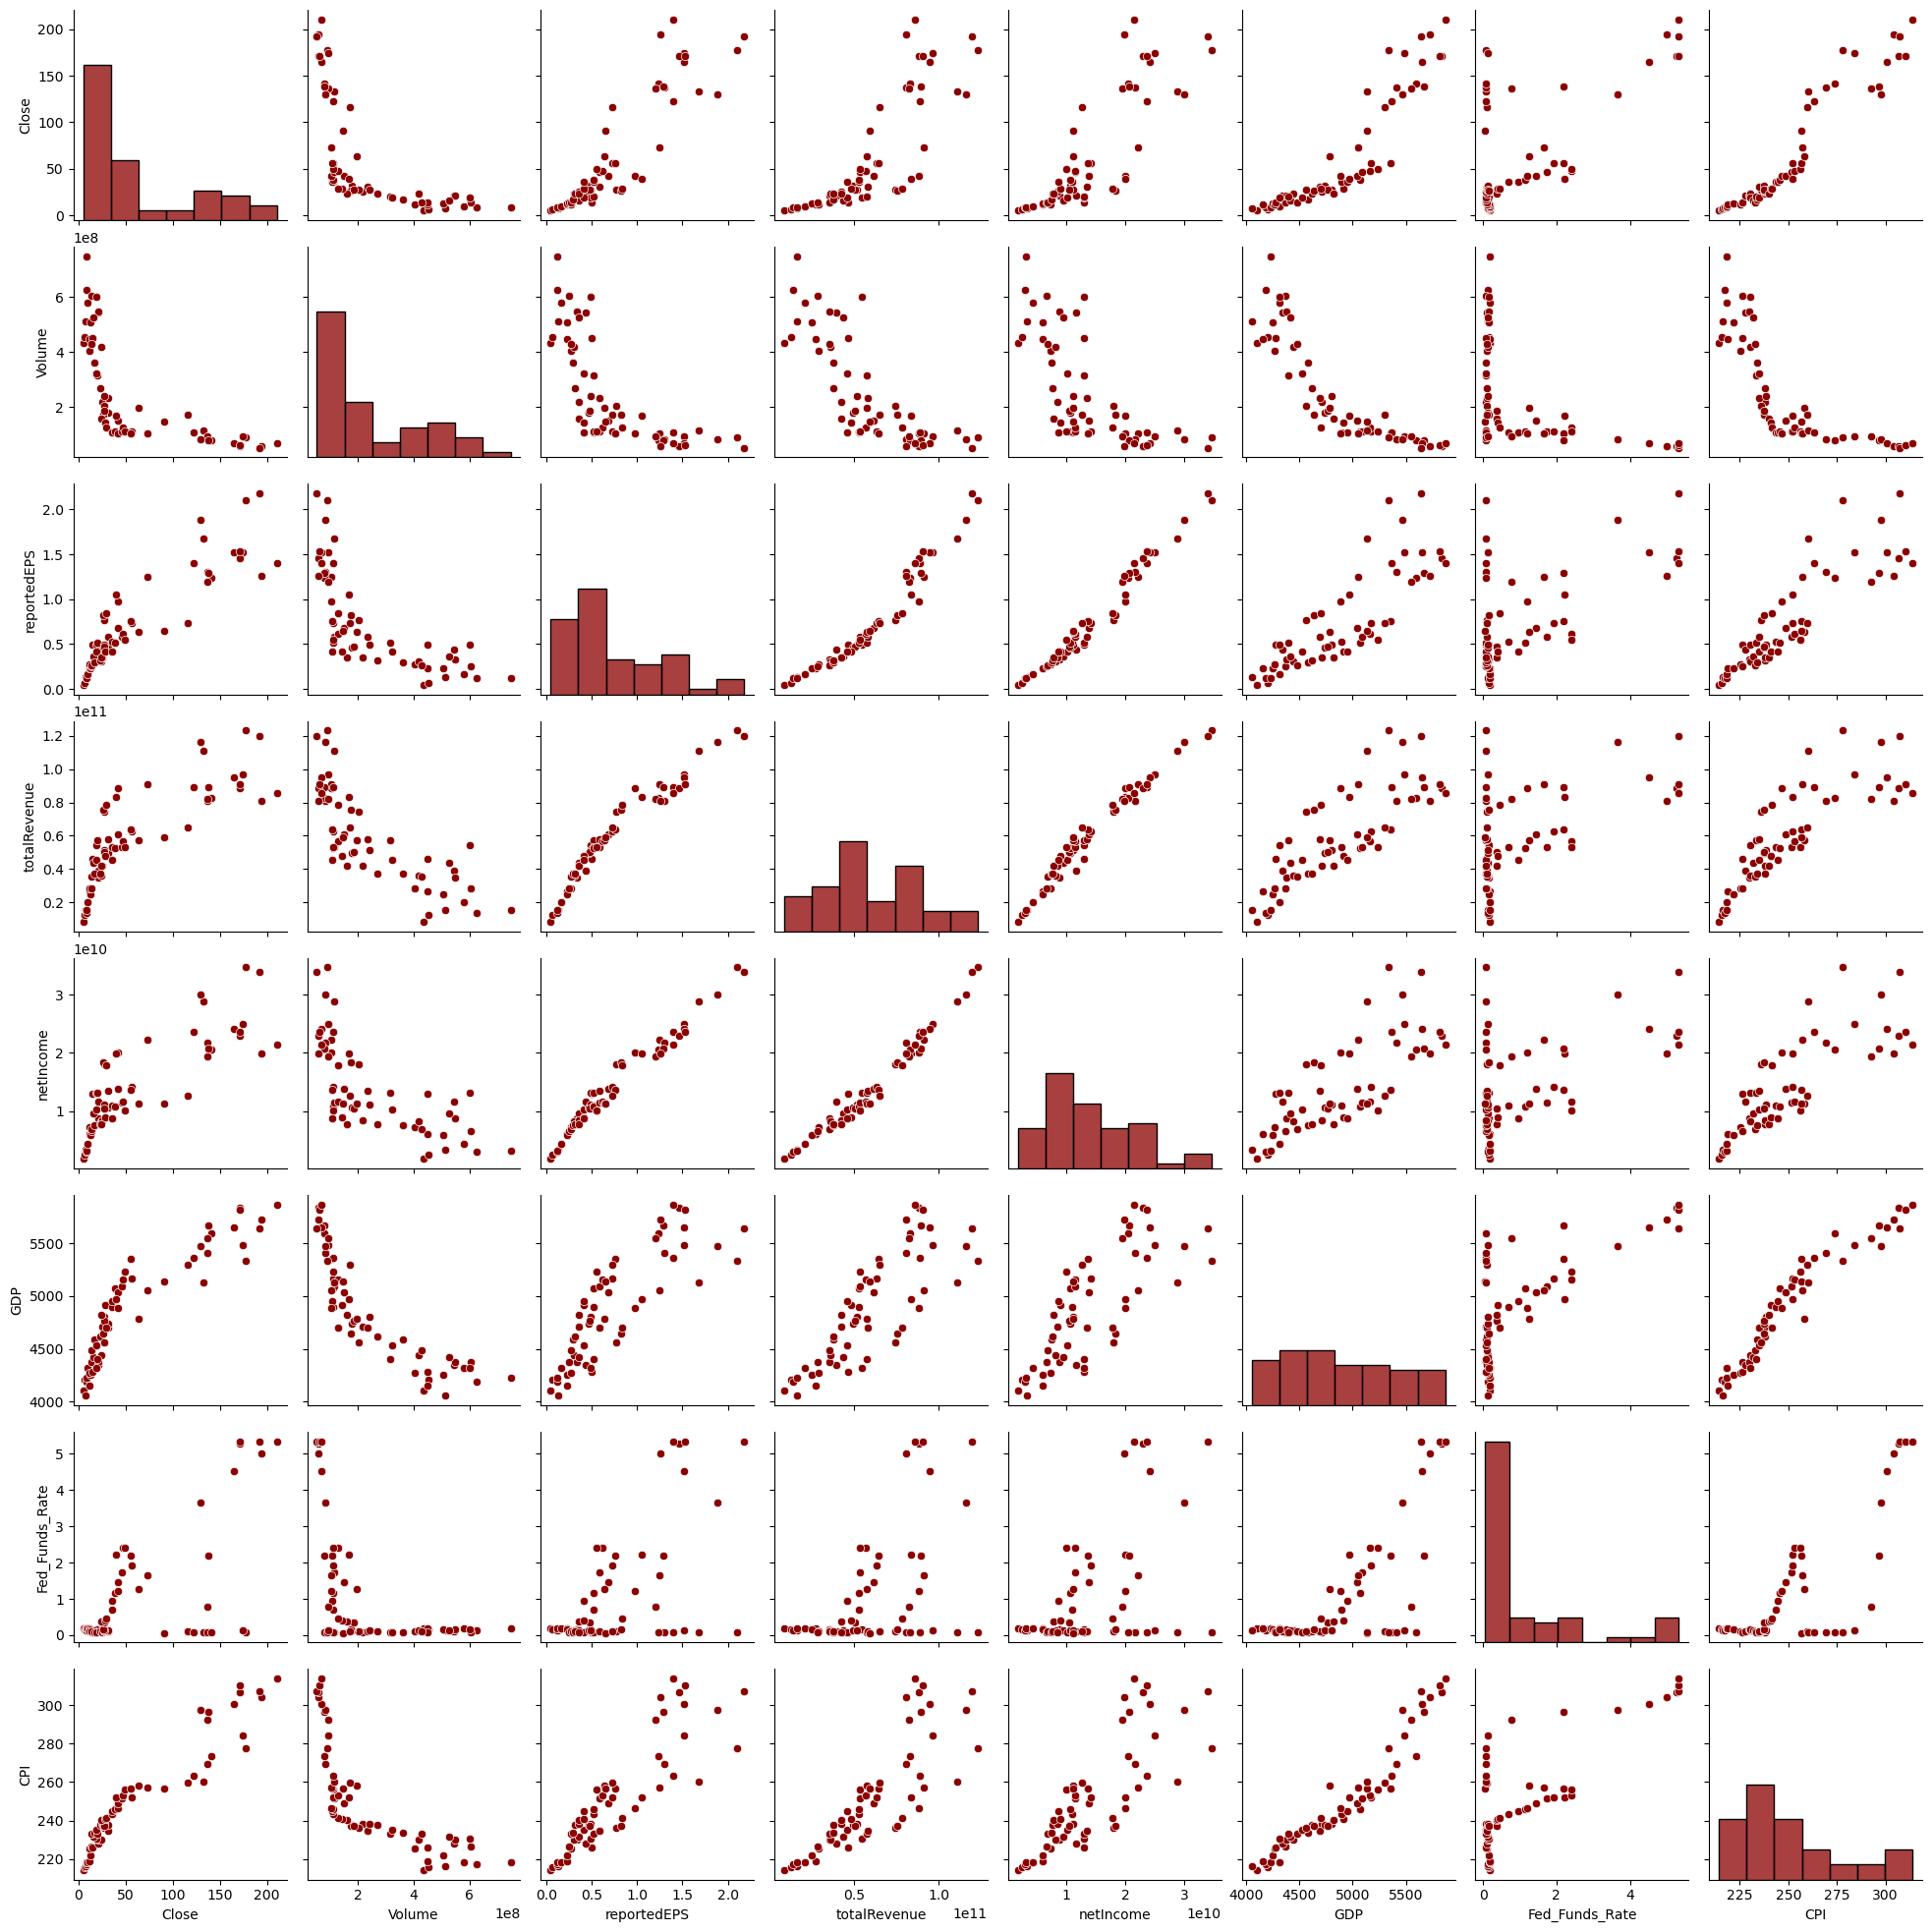

In [69]:
sns.pairplot(apple_df, plot_kws={'color': 'darkred'}, diag_kws={'color': 'darkred'})
plt.show()

__Observations__

We see that almost all variables are positively correlated with respect to the *close price*, except (and *not surprisingly*) volume. It is not surpiring, at least to me, because we are looking at the data for Apple stock and investor's confidence in the stock and his behaviour plays a role here. Investors might be holding onto their shares, expecting the stock price to continue rising. This reduced selling activity can lead to lower trading volumes.

Even though I said that *all variables are positively correlated*, I said it imprecisely without mentioning the intensity of positive correlation. For instance, even though Fed Funds rate is positively related to close price, it is not related in a strong sense (no clear pattern). To see the intensities of correlation, I have plotted the correlation heatmap below.

One remark: Even though a high (or better rising) interest rate and CPI can mean that the economy might be struggling, this does not neccesarily translated into a negative effect (or negative correlation if we talk about mathematical relationships) on the closing stock price across quarters. This is surprising and teaches us that there is no inherent way to interpret what precisely **causes** changes in stock prices due to numerous interpretations. Example: Even though increasing CPI means that consumers real income is negatively affected, which consequently can effect the comapany profitability (and ultimately stock price), another way to look at it can be that because CPI is increasing, so did stock price through chains of increasing in selling prices of commodoties, increase in revenue ..... and ultimately stock price. 

This shows that the stock market is extremely complex and an increase or decrease of some indicator or predictor variable can affect the stock price in a way not anticipated and also completely differently in any two different quarters for example. I will motivate this with an example of how stock prices for many tech companies exploded and continued to rise despite widespread fear of recessions in 2022-2023 and rising interest rates.

Last Remark: The histogram plots for each variable in the plot above reveals that none of our predictor variables follow a normal distribution. This observation aids us in deciding which scaler to use when standardizing the data.

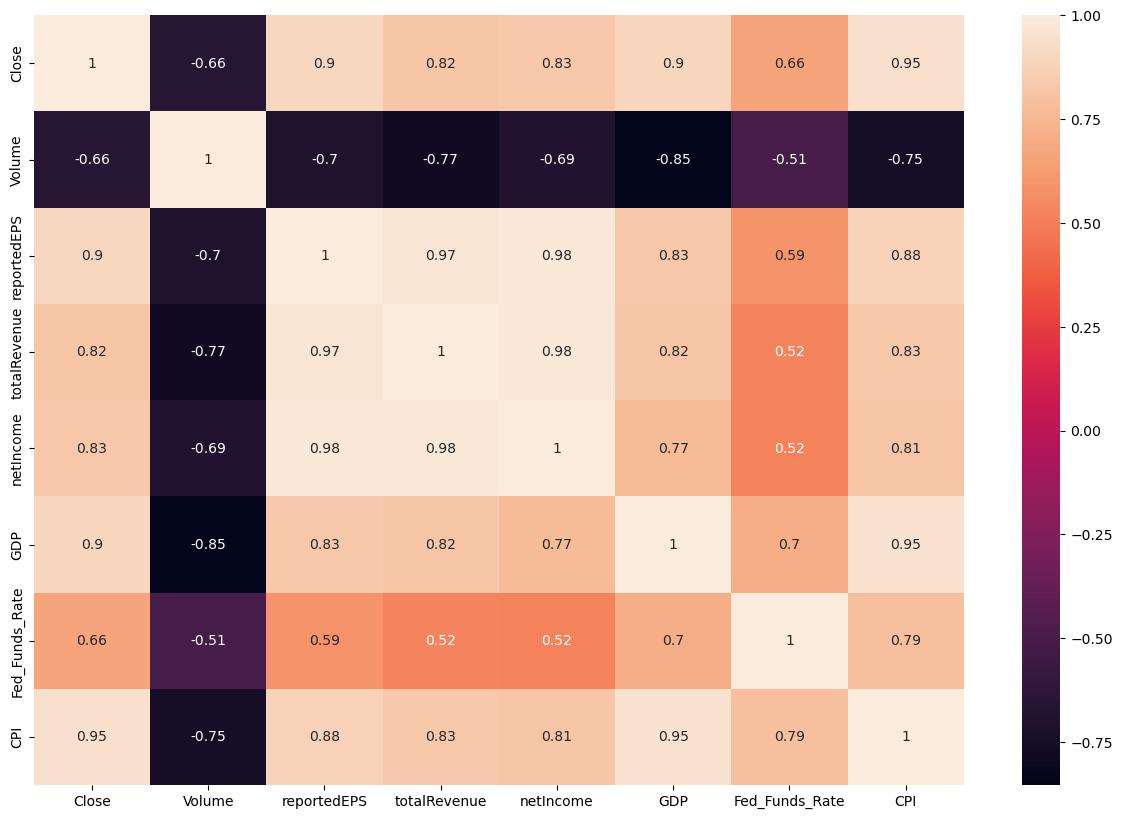

In [70]:
matrix = apple_df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(matrix, annot = True)
plt.show()

The heatmap above shows the correlation between the features in the dataset. Our main concern is the correlation between the Close column and the other columns. We see that all, but the Volume column, have a positive correlation with the Close column. The highest correlation is with the CPI column (*surprisingly*), which is 0.95, followed by GDP, EPS, Revenue, and Income. The Fed_Funds_Rate column has the weakest correlation!

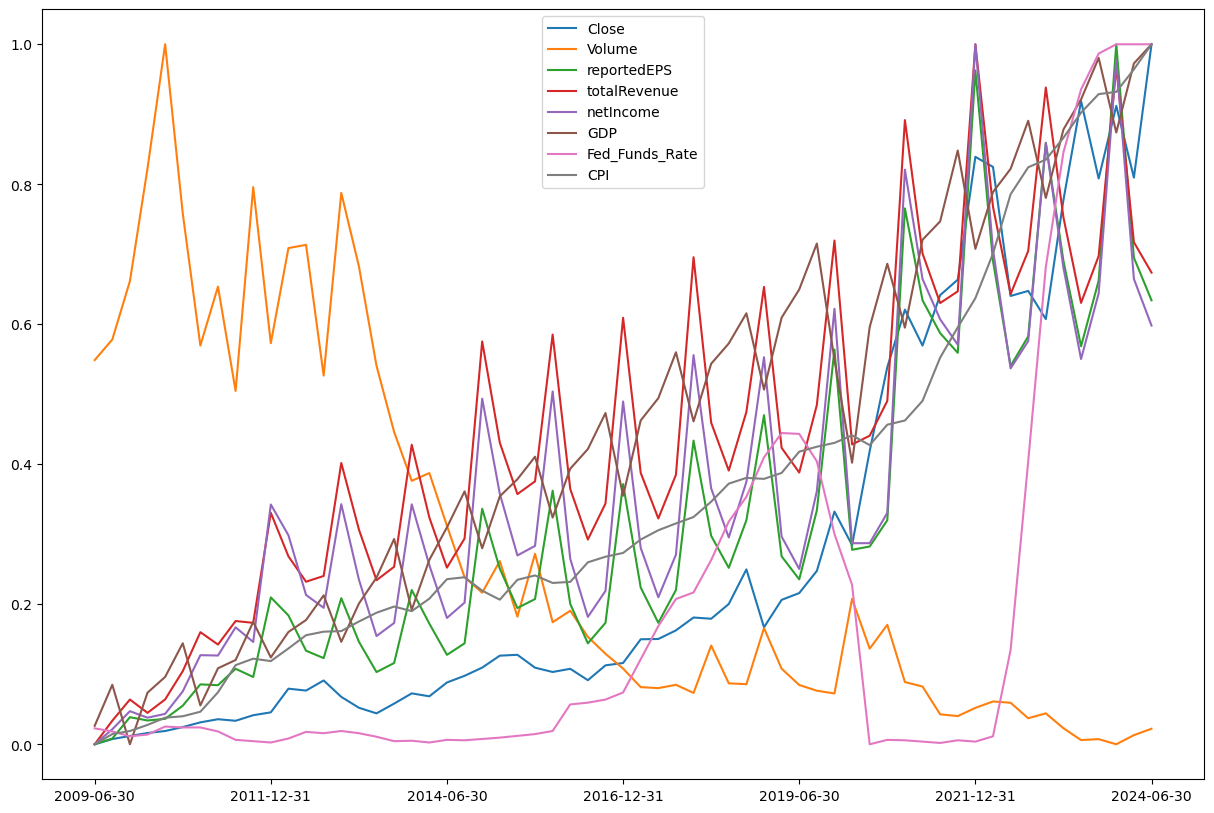

In [71]:
# lets normalise these values so that we can plot them on the same graph for comparison across time
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(apple_df)
scaled_df = pd.DataFrame(scaled_data, columns = apple_df.columns, index = apple_df.index)

plt.figure(figsize = (15, 10))
scaled_df.plot(ax = plt.gca())
plt.show()


Pretty Volatile and Complex right? All variables are increasing **in trend** across time except except volume (which kept decreasing) and fed funds rate (which increased, then decreased, and then spiked again).

---
Before going towards feature engineering, we can move on to the model building phase. The purpose to do modelling now is that we can compare if our feature engineering can get us any better with results, for we have already talked enough that adding more variables does not neccessarily guarantee that we will be able to predict *__stock price changes accurately__*. 

However, we have to keep in mind that stock market data is highly volatile and unpredictable due to the presence of many factors that can influence the stock prices and can't be captured by the ML models. Not to mention, there are many other factors that we haven't accounted in this project - for example market sentiment, environmental, micro, and macroeconomic factors. These factors are in constant interplay to affect stock prices.

We initiated this project with quite optimism but quickly learned that the stock market is not as predictable as we thought and in pratice, Machine Learning models are not very effective in predicting stock prices. However, for the sake of learning and practice, we will proceed with the applying some models to the data and evaluate their performance.  

Now, that we have outlined the potential challenges, we have to make a naive benchmark model to compare the performance of the other models. The naive benchmark is often based on the random walk model.

# Random Walk Model

A Random Walk model assumes that the next value of a time series is the current value plus a random fluctuation. It's a simple yet effective baseline model for financial time series like stock prices.

For a stock price series $P_t$:

$$P_{t+1} = P_t + \epsilon_t$$

Where:
* $P_{t+1}$ is the Next value in the series
* $P_t$ is the Current value
* $\epsilon_t$ is the Random noise (assumed to follow a normal distribution with mean 0)

For relative changes: 

$$\Delta P_{t+1} = P_{t+1} - P_t = \epsilon_t$$

This means that The next price $P_{t+1}$ depends only on the current price $P_t$, making the process "memoryless."

In [72]:
# Make a copy of the dataframe for the ranqom walk model
apple_walk = apple_df.copy()

apple_walk["Close_next_quarter_real"] = apple_walk["Close"].shift(-1)
apple_walk["Close_next_quarter_prediction"] = apple_walk["Close"] + np.random.normal(0, 3, len(apple_walk)) # $3 error

apple_walk["relative_Close_next_quarter_change_real"] = (apple_walk["Close_next_quarter_real"] - apple_walk["Close"]) / apple_walk["Close"]
apple_walk["relative_Close_next_quarter_change_prediction"] = (apple_walk["Close_next_quarter_prediction"] - apple_walk["Close"]) / apple_walk["Close"]

apple_walk.dropna(inplace = True)

apple_walk.head()

Close        Volume  reportedEPS  totalRevenue     netIncome  \
2009-06-30  5.086786  4.342240e+08       0.0475  8.337000e+09  1.828000e+09   
2009-09-30  6.619643  4.546341e+08       0.0650  1.220700e+10  2.532000e+09   
2009-12-31  7.526071  5.125769e+08       0.1300  1.568300e+10  3.378000e+09   
2010-03-31  8.392857  6.245778e+08       0.1200  1.349900e+10  3.074000e+09   
2010-06-30  8.983214  7.476355e+08       0.1250  1.570000e+10  3.253000e+09   

                 GDP  Fed_Funds_Rate         CPI  Close_next_quarter_real  \
2009-06-30  4102.854        0.180000  214.263000                 6.619643   
2009-09-30  4209.064        0.156667  215.718000                 7.526071   
2009-12-31  4055.062        0.120000  216.152000                 8.392857   
2010-03-31  4188.706        0.133333  217.019667                 8.983214   
2010-06-30  4229.410        0.193333  218.050667                10.133929   

            Close_next_quarter_prediction  \
2009-06-30                      10.378943   
2009-09-30                       7.820115   
2009-12-31                      10.462285   
2010-03-31                      15.115537   
2010-06-30                      14.585888   

            relative_Close_next_quarter_change_real  \
2009-06-30                                 0.301341   
2009-09-30                                 0.136930   
2009-12-31                                 0.115171   
2010-03-31                                 0.070340   
2010-06-30                                 0.128096   

            relative_Close_next_quarter_change_prediction  
2009-06-30                                       1.040373  
2009-09-30                                       0.181350  
2009-12-31                                       0.390139  
2010-03-31                                       0.801000  
2010-06-30                                       0.623683

In [73]:
# our model follows the following structure: prediction = current relative_close_change_from_the_last_quarter + random noise ~ N(0, 3)

actuals = apple_walk["Close_next_quarter_real"].values
predictions = apple_walk["Close_next_quarter_prediction"].values


# evaluate the model
rmse = root_mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Accuracy: if the actuals are positive and the predictions are positive,
# or if the actuals are negative and the predictions are negative, then the prediction is correct.
# Count the number of correct predictions
correct_predictions = np.sum(np.sign(apple_walk["relative_Close_next_quarter_change_real"].values) == np.sign(apple_walk["relative_Close_next_quarter_change_prediction"].values))
total_predictions = len(actuals)
accuracy = correct_predictions / total_predictions

# Print results
# print first 5 predictions
print(f"Predictions: {predictions[:5]}")
# print first 5 real values
print(f"Actuals: {actuals[:5]}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Predictions: [10.37894304  7.82011463 10.46228495 15.1155366  14.58588797]
Actuals: [ 6.619643  7.526071  8.392857  8.983214 10.133929]
RMSE: 13.82
MAE: 9.07
R2: 0.95
Accuracy: 0.53


##### Interpreation of the results:

__RMSE__ has not a meaningful interpreation in our context but __MAE__ shows that we, on average were 9$ away from the true value (in absolute value)

__R2__: The R2 value is 0.95. This value measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The higher the value, the better the model. In this case, the value shows that the model is surprisinly appropriate for the data and captures well the movements (variation) in the target variable.

__Accuracy__: The accuracy value is 0.53. This value measures the proportion of correct predictions. Correct predictions are calculated based on the sign of the predicted and actual change in stock price next quarter. The higher the value, the better the model. In this case, the value is 0.53 - which is just at par with random guess by, for instance, flipping a fair coin and betting whether to buy the stock or not!

These results will serve as a naive baseline for the ML models that we will build.

---

### Laying out the ML Cycle for reference

The training and evaluation of machine learning models follow a structured pipeline to ensure reliable performance and generalizability. Here's a concise breakdown of the process followed throughout the notebook.

**1. Data Splitting**  
To ensure a robust evaluation of our machine learning models, we will carefully divide the dataset into training and test sets. The data will be shuffled before splitting to minimize biases and ensure an even distribution of data points across the splits.  

- **Shuffle and Stratify for Splitting**  
To preserve the balance of the target variable (whether the stock return is positive or negative), we will employ stratified splitting in conjunction with shuffling (not regarding the sequence of the data). Stratification ensures that both the training and test sets contain a representative proportion of positive and negative instances, which is critical for models where imbalanced data may skew results.

 - **Training Set**:
    - **Purpose**: The training set is used to fit the model, enabling it to learn the relationships between the features and the target variable.  
    - **Details**: After splitting, the training set comprises 80% of the data, equating to approximately 48 quarters.

- **Validation Set (via Cross-Validation)**:  
   - **Purpose**: Instead of explicitly defining a separate validation set, we will use **k-fold cross-validation** for hyperparameter tuning and model selection.  
   - **Details**: 
      - We choose **5-fold cross-validation**, dividing the training set into 5 folds. 
      - The model will train on 80% of the training set (approximately 38 quarters) and validate on the remaining 20% (approximately 10 quarters) for each fold. 
      - This process repeats 5 times, ensuring each fold serves as the validation set once.

- **Test Set**:  
   - **Purpose**: The test set remains unseen throughout the training and cross-validation processes and is used solely for the final evaluation of the model’s performance on unseen data.  
   - **Details**: It contains 20% of the total data, equating to approximately 12 quarters.

**2. Model Training**
- The model is trained using the training set by minimizing a loss function (e.g. log loss for classification).
- The goal is to optimize the model parameters so that it generalizes well to unseen data.

*In our case, we train the model to predict the **sign** of the relative change in stock price next quarter, focusing on positive (`1`) or negative (`-1`) movements. This would translate into a __Buy__ (__1__) signal if the relative change in stock price next quarter is positive or __Not Buy__ (__-1 or 0__) signal otherwise.

**3. Hyperparameter Tuning**
- We will make use of Grid Search to tune hyperparameters for each model. Grid search is an exhaustive search over specified hyperparameter values for an estimator. As mentioned before, we will use a 5-fold cross-validation for this purpose and tune hyperparameters based on the validation set's performance.
- Metrics (e.g., precision and recall for class 1) guide hyperparameter selection based on the validation set's performance.

For step 2 and 3, we will also keep in mind the __Prelavent Heuristics for Variance and Bias__:
$$Variance \approx CrossValidation Error - Training Error$$
$$Bias \approx Training Error$$

**4. Final Model Evaluation**
- After tuning hyperparameters using cross-validation, retrain the model on the training sets with the best hyperparameters.
- Evaluate on the **test set**, which has remained untouched until now.
- Report final metrics like **precision**, **recall**, and **sign-based accuracy** (or others aligned with business goals).


Now, we will implement the following models for this dataset: Logistic Regression, Linear Regression, S.V.M, XGBoost, and Nueral Networks.

---

# Logistic Regression - No Feature Engineering

Lets begin by defining the target variable for the Logistic Regression model.

In [5]:
log_reg_rel = apple_df.copy()

In [6]:
log_reg_rel["Close_next_quarter"] = log_reg_rel["Close"].shift(-1)
log_reg_rel["relative_Close_next_quarter_change"] = (log_reg_rel["Close_next_quarter"] - log_reg_rel["Close"]) / log_reg_rel["Close"]
log_reg_rel.dropna(inplace = True)
log_reg_rel["Buy"] = np.where(log_reg_rel["relative_Close_next_quarter_change"] > 0, 1, 0)
log_reg_rel.drop(columns = ["Close_next_quarter", "relative_Close_next_quarter_change"], inplace = True)

In [7]:
log_reg_rel.head()

Close        Volume  reportedEPS  totalRevenue     netIncome  \
2009-06-30  5.086786  4.342240e+08       0.0475  8.337000e+09  1.828000e+09   
2009-09-30  6.619643  4.546341e+08       0.0650  1.220700e+10  2.532000e+09   
2009-12-31  7.526071  5.125769e+08       0.1300  1.568300e+10  3.378000e+09   
2010-03-31  8.392857  6.245778e+08       0.1200  1.349900e+10  3.074000e+09   
2010-06-30  8.983214  7.476355e+08       0.1250  1.570000e+10  3.253000e+09   

                 GDP  Fed_Funds_Rate         CPI  Buy  
2009-06-30  4102.854        0.180000  214.263000    1  
2009-09-30  4209.064        0.156667  215.718000    1  
2009-12-31  4055.062        0.120000  216.152000    1  
2010-03-31  4188.706        0.133333  217.019667    1  
2010-06-30  4229.410        0.193333  218.050667    1

Having defined the target variable, it is important to see how does the predictor variable relate to the target variable using correlation matrix.

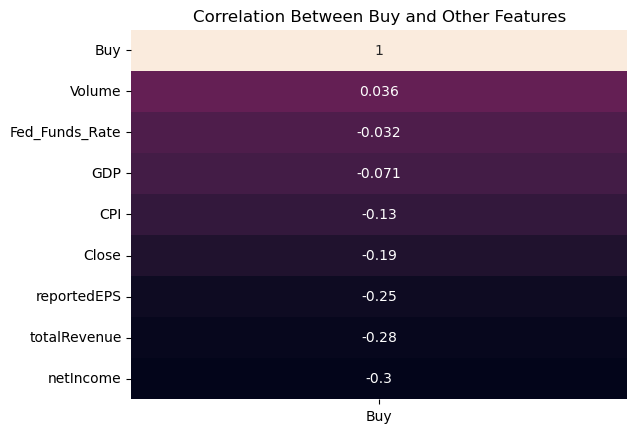

In [9]:
# now we will plot the correlation matrix of the relative_df only for Buy column
plt.figure()
sns.heatmap(log_reg_rel.corr()[["Buy"]].sort_values(by="Buy", ascending=False), annot=True, cbar=False)
plt.title("Correlation Between Buy and Other Features");

The buy column (our target), being a transformation of Close, may not have the similar correlation with the predictors as the Close column (previously analyzed). This is because the buy column is a transformation of the Close column in somewhat convolved way (relative changes).


Buy is defined as: <br><br>
  $$
  \text{Buy} = 1 \text{ if } \text{Relative Change in Close} > 0, \text{ otherwise } 0
  $$
  where:
  $$
  \text{Relative Change in Close} = \frac{\text{Close}_{t+1} - \text{Close}_t}{\text{Close}_t}
  $$

This means the **Buy** signal depends on whether the closing price increases (positive relative change) or decreases (negative relative change) in the next quarter. This also transforms then the relationships (talking about correlations) between predictor variables and Buy Variable However, the relationships are transformed in somewhat unintuitive way:

The plot of correlation matrix between the *features of the relative_df* and *the Buy column* rather, for example, reveals that we should buy if, the relative change in net income decreases or if the relative change in the close price decreases. Though unintuitive, I would emphasize that the Buy variable is the transformation of Close and depends not just on Close, but rather relative change in close from last quarter, next quarter and finally is assigned 1 if Relative Change in Close next quarter is positive!

Just to get a sense of what kind of squiggly line we aim to fit in, we will plot the points:

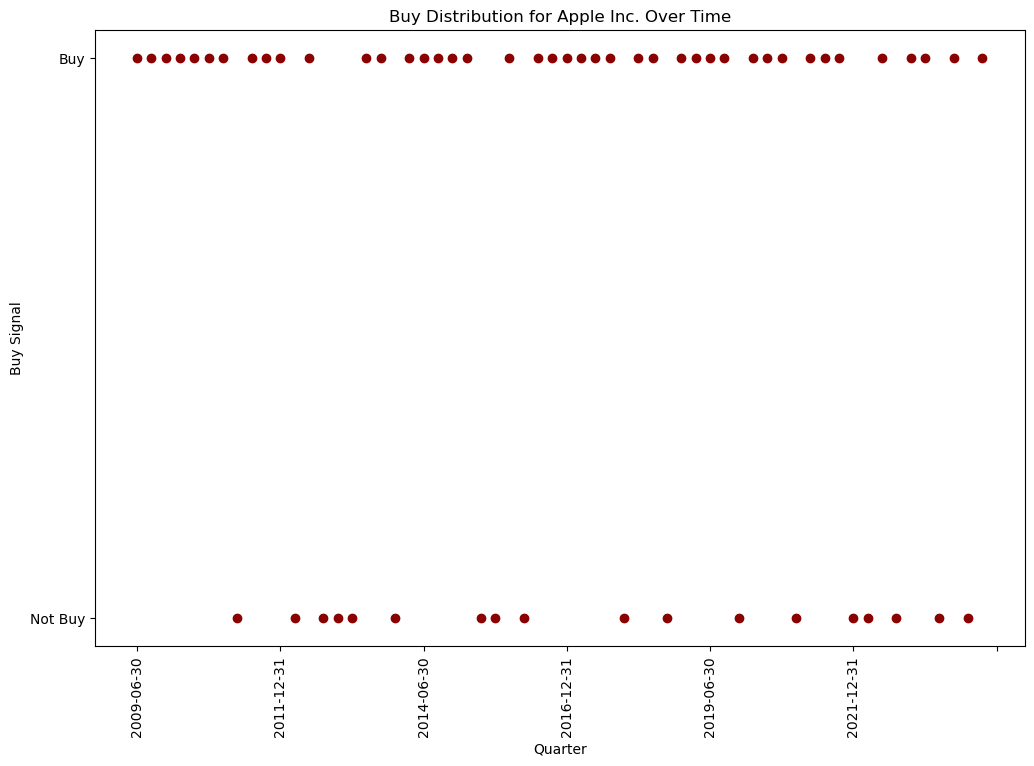

In [8]:
# we will plot the Buy column across the quarters as points
fig, ax = plt.subplots(figsize=(12, 8))
log_reg_rel["Buy"].plot(ax=ax, marker="o", linestyle="", color="darkred")
ax.set_title("Buy Distribution for Apple Inc. Over Time", color='black')
ax.set_ylabel("Buy Signal", color='black')
ax.set_xlabel("Quarter", color='black')
ax.set_yticks([0, 1])
ax.set_yticklabels(["Not Buy", "Buy"])
# rotate the x-axis labels
plt.xticks(rotation=90);

Seems like our results ain't going to be much accurate. There is no way Logistic Regression can fit a squiggly line and separate the two **accurately**! However, we will see that even if it is not accurate, it does pretty well w.r.t other models. Moreover, it is important to check the class imbalance (if there is one). A simple bar plot helps us with this. 

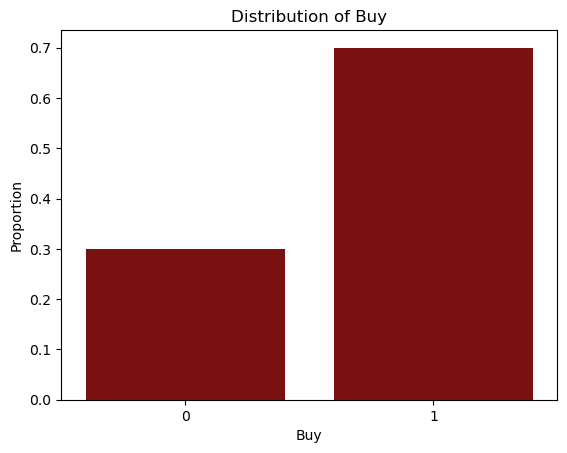

In [9]:
prop = log_reg_rel.Buy.value_counts(normalize=True)
plt.figure()
sns.barplot(x=prop.index, y=prop.values, color="darkred")
plt.title("Distribution of Buy", color='black')
plt.xlabel("Buy", color='black')
plt.ylabel("Proportion", color='black')
plt.show()

### Normalization

Because our values are strictly positive and the individual features are not normally distributed, we will apply the MinMaxScaler to the data to normalize it and transform it into [0,1] range

In [10]:
# standardize the data
scaler = MinMaxScaler()
cols = [col for col in log_reg_rel.columns if col != "Buy"]
log_reg_rel[cols] = scaler.fit_transform(log_reg_rel[cols])

Because of class imbalance, we will use inverse_class_weight in the logistic regression model to handle this imbalance.

In [11]:
class_frequencies = log_reg_rel['Buy'].value_counts(normalize=True)
inverse_class_frequencies = 1 /  class_frequencies
inverse_class_frequencies_dict = inverse_class_frequencies.to_dict()

We have 60 rows, and we will use the last 20% as the test set. We will be using cross validation for the purpose of hyperparameter tuning. We chose to use 5 folds for cross validation - or in other words, 20% of the training data (10 rows) for cross validation.

In [12]:
# Define the features and target variable
X = log_reg_rel.drop(columns="Buy")
y = log_reg_rel["Buy"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [13]:
# Define the scoring metrics to be incorporated into the GridSearch - emphasing the precision and recall for class `1` (Buy)
scoring = {
    "Precision_Class_1": make_scorer(precision_score, pos_label=1, average="binary", zero_division=0),
    "Recall_Class_1": make_scorer(recall_score, pos_label=1, average="binary"),
}

In [14]:
# Logistic Regression
log_reg = LogisticRegression(random_state=0)

# Define the hyperparameters to be tuned - class_weight and C. 
# C is the inverse of the regularization strength. The smaller the value, the stronger the regularization.

C_values = list(np.round(np.linspace(0, 10, int(10 / 0.05)), 2).astype(float))
C_values[0] = 0.01

param_grid = {
    "class_weight": [None, "balanced", inverse_class_frequencies_dict],
    "C": C_values
}


# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="Precision_Class_1",
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                               0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                               0.9, 0.95, 1.01, 1.06, 1.11, 1.16, 1.21, 1.26,
                               1.31, 1.36, 1.41, 1.46, ...],
                         'class_weight': [None, 'balanced',
                                          {0: 3.3333333333333335,
                                           1: 1.4285714285714286}]},
             refit='Precision_Class_1',
             scoring={'Precision_Class_1': make_scorer(precision_score, response_method='predict', pos_label=1, average=binary, zero_division=0),
                      'Recall_Class_1': make_scorer(recall_score, response_method='predict', pos_label=1, average=binary)},
             verbose=1)

In [15]:
# print the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 4.97, 'class_weight': {1: 1.4285714285714286, 0: 3.3333333333333335}}


Accuracy on training set: 0.69
Classification report on training set:
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        14
           1       0.81      0.74      0.77        34

    accuracy                           0.69        48
   macro avg       0.64      0.65      0.64        48
weighted avg       0.71      0.69      0.70        48



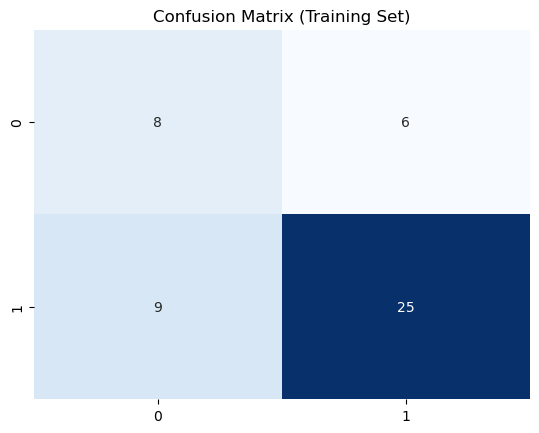

In [16]:
# print the accuracy score, the precision score, and the recall score on the training set
best_model = LogisticRegression(**best_params, random_state=0)

best_model.fit(X_train, y_train)

accuracy_train = best_model.score(X_train, y_train)
y_pred_train = best_model.predict(X_train)

classification_report_train = classification_report(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Classification report on training set:\n{classification_report_train}")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure()
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Training Set)");

As outlined in the beggining of the project, our main metric to evaluate how well our model is performing is precision score for class 1 (signal to buy), followed by recall. This is because we want to make sure that we precisely predict when to buy the stock - as to not lose money - and also to not miss out on opportunities to buy the stock when it is going to increase in value. 

### One time definitions for important metrics:  

> **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all the instances that were predicted as positive, how many were actually positive?"
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$
---
> **Recall (Sensitivity or True Positive Rate)**: Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "Of all the instances that were actually positive, how many were correctly predicted as positive?"
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
---
> **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
---
> **Accuracy**: Accuracy is the ratio of correctly predicted observations to the total observations. It answers the question: "How often is the classifier correct?"
   $$
   \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Observations}}
  $$

We see that the model has an accuracy of 0.69 on the training set. The precision and recall for class `1` (Buy) are 0.81 and 0.74, respectively. The precision is the proportion of true positive predictions among all positive predictions, while the recall is the proportion of true positive predictions among all actual positive instances. The scores are strong indication that we can trust the model to a safer extent when investing in a Buy signal. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model.

Let's put the trained model on the testing set!

Accuracy on test set: 0.75
Classification report on test set:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



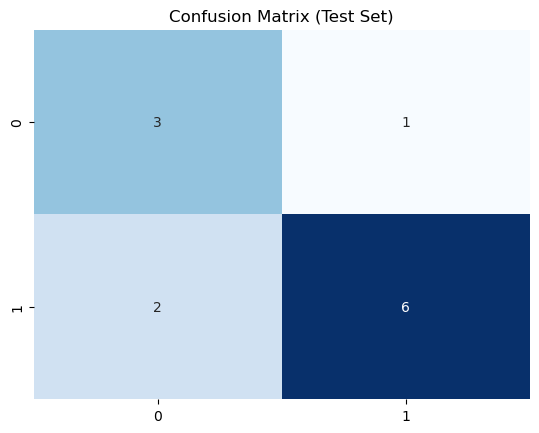

In [17]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification report on test set:\n{classification_report_test}")

# Confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)");

On the test set, the model performs way better than the training set. The accuracy is 0.75. As we care more about the precision and recall for class 1, we can see that the precision is 0.86 and the recall is 0.75. This means that the model correctly predicts stock increases 86% of the time. More importantly, it makes only 14% error of making us buy when we should not. The model correctly identifies 75% (recall) of the quarters where the stock price increased as quarters where the stock price increased. We will try more models and then compare them later.

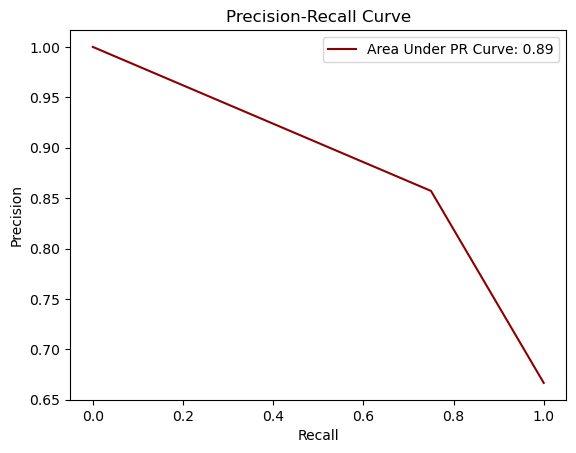

Area Under PR Curve: 0.89


In [18]:
# lets plot the precision and recall curve and also print the area under the pr curve
# Calculate the precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color="darkred", label=f"Area Under PR Curve: {auc_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print(f"Area Under PR Curve: {auc_score:.2f}")

At the highest recall levels, the precision drops significantly, suggesting that the model struggles to maintain accurate predictions when trying to capture all positive instances. The curve, howeverm exhibits relatively good performance for moderate recall values (e.g., between 0.0 and 0.7), where both precision and recall are reasonably high (above 0.85). The area under the precision-recall curve (AUC-PR) is reported as 0.89, which is a strong indicator of the model's performance on imbalanced datasets. This value signifies that the model is effective at identifying positive cases with a balance between precision and recall.

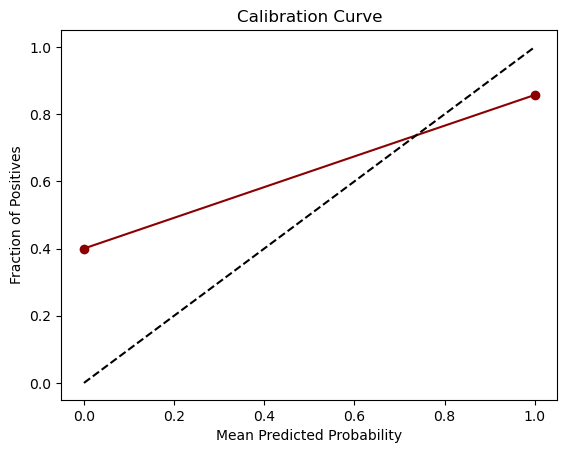

In [19]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

Calibration plot serves to assess how well the predicted probabilities of a classification model reflect the true likelihood of an event occurring. In other words, it checks if the model's probability estimates are "trustworthy."  A well-calibrated model produces probabilities that are close to the actual observed frequencies. For example, if the model predicts a probability of 0.8 for a set of samples, then ideally, approximately 80% of those samples should actually belong to the positive class. A poorly calibrated model, conversely, produces probabilities that are systematically different from the true frequencies (Over confident model or Under confident model).  

The x axis in the plot above represents the predicted probabilities output by the logistic regression model, grouped into bins. Y axis, on the other hand represents the proportion of true positive outcomes within each bin of predicted probabilities. This is the actual observed frequency of the positive class.

The **dashed diagonal line** represents a perfectly calibrated model. If the model's predicted probabilities align perfectly with actual outcomes, all points will lie on this line. For instance, if the model predicts a probability of 0.6 for certain instances, 60% of those predictions should indeed belong to the positive class.

The **red line shows** how well the model's predicted probabilities match the actual observed probabilities. For lower probabilities (e.g., 0.4), the model slightly underpredicts the fraction of positives compared to perfect calibration (the red point lies below the diagonal). For higher probabilities (e.g., 0.8–1.0), the model is almost perfectly calibrated, as the red points lie closer to the diagonal line.

The model shows reasonable calibration across the entire range of predicted probabilities. It slightly underestimates the likelihood of the positive class at lower predicted probabilities. At higher predicted probabilities, the model predictions are very close to the true fraction of positives, indicating that it is reliable for confident predictions (e.g., probabilities closer to 1.0).

**Implications**: For higher probabilities, you can trust the model's outputs to accurately reflect the chance of a positive outcome.

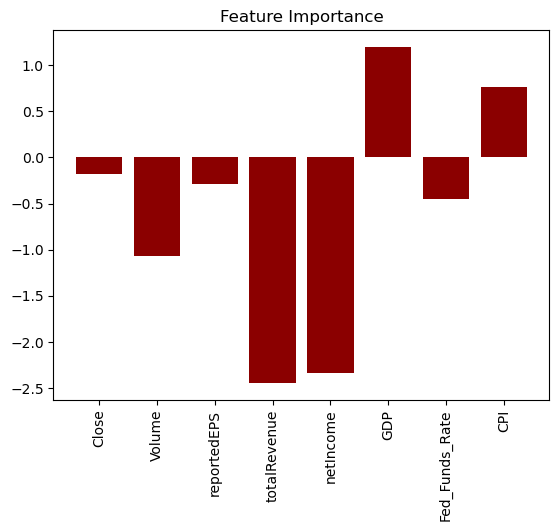

In [20]:
# plot the coefficients
plt.figure()
plt.bar(X_train.columns, best_model.coef_[0], color='darkred')
plt.xticks(rotation=90, fontsize=10)
plt.title("Feature Importance")
plt.show()

The coefficients, to much extent, align with the insight we got from the plot of correlation matrix between the features of the relative_df for the Buy column

# Linear Regression (with Regularization) - No Feature Engineering

In [20]:
apple_linear_reg = apple_df.copy()

For the Linear Regression modelling part, we will set `change_in_Close_next_quarter` column as the target variable. We will try to predict the change in the closing price of the next quarter using the other features. We will define accuracy and other scoring metrics based on the sign of the predictions.

In [21]:
apple_linear_reg["Close_next_quarter"] = apple_linear_reg["Close"].shift(-1)
apple_linear_reg["change_in_Close_next_quarter"] = apple_linear_reg["Close_next_quarter"] - apple_linear_reg["Close"]
apple_linear_reg.drop(columns = ["Close_next_quarter"], inplace = True)
apple_linear_reg.dropna(inplace = True)

apple_linear_reg.head()

Close        Volume  reportedEPS  totalRevenue     netIncome  \
2009-06-30  5.086786  4.342240e+08       0.0475  8.337000e+09  1.828000e+09   
2009-09-30  6.619643  4.546341e+08       0.0650  1.220700e+10  2.532000e+09   
2009-12-31  7.526071  5.125769e+08       0.1300  1.568300e+10  3.378000e+09   
2010-03-31  8.392857  6.245778e+08       0.1200  1.349900e+10  3.074000e+09   
2010-06-30  8.983214  7.476355e+08       0.1250  1.570000e+10  3.253000e+09   

                 GDP  Fed_Funds_Rate         CPI  change_in_Close_next_quarter  
2009-06-30  4102.854        0.180000  214.263000                      1.532857  
2009-09-30  4209.064        0.156667  215.718000                      0.906428  
2009-12-31  4055.062        0.120000  216.152000                      0.866786  
2010-03-31  4188.706        0.133333  217.019667                      0.590358  
2010-06-30  4229.410        0.193333  218.050667                      1.150715

Before moving on to modelling, let's perform some EDA on the data.

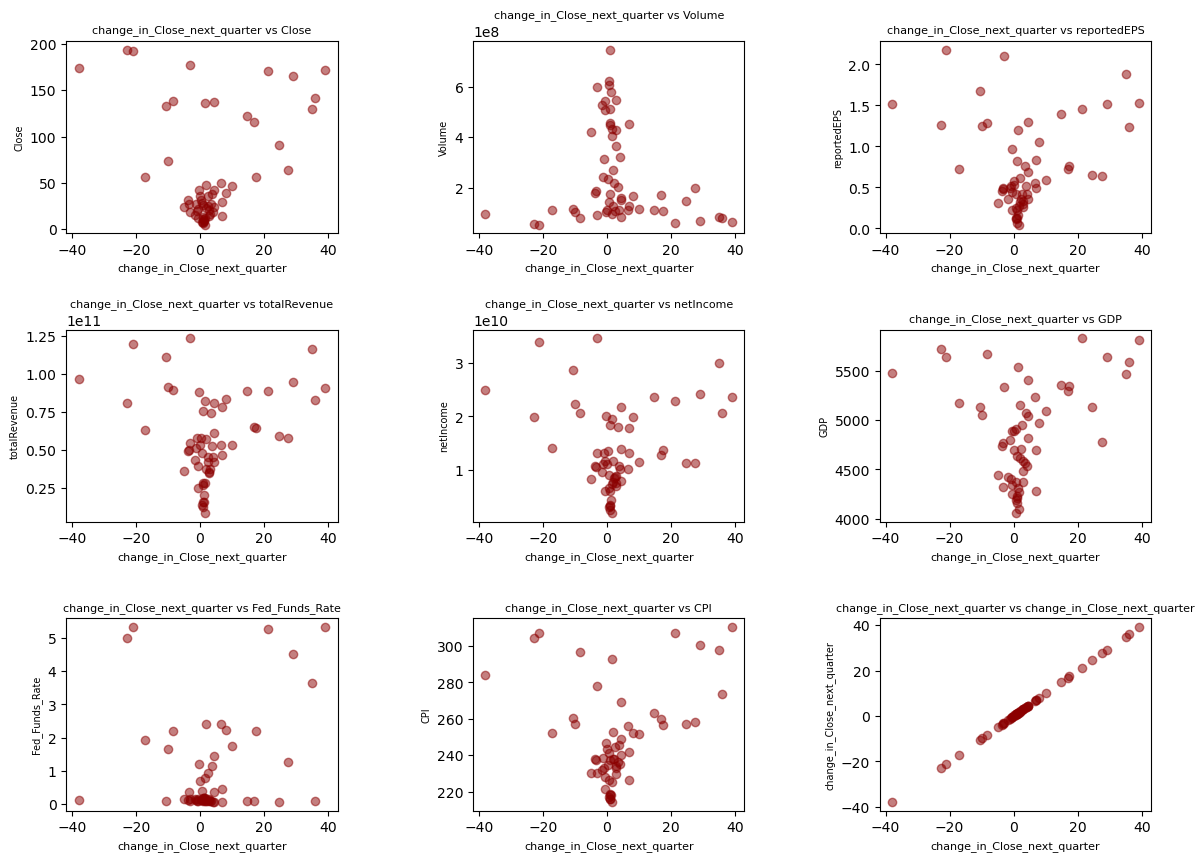

In [22]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(apple_linear_reg.columns):
    plt.subplot(3, 3, i+1)
    plt.scatter(apple_linear_reg["change_in_Close_next_quarter"], apple_linear_reg[col], alpha=0.5, color='darkred')
    # add space between the subplots
    plt.subplots_adjust(hspace=.5, wspace=.5)
    plt.xlabel("change_in_Close_next_quarter", fontsize=8)
    plt.ylabel(col, fontsize=7)
    plt.title(f"change_in_Close_next_quarter vs {col}", fontsize=8)
plt.show();

The plot, like in the section for modelling of Logistic Regression, shows that there is no strong positive or negative relationship between change_in_Close_next_quarter (our target variable) and the other features. Meaning, a positive change in the closing price of the stock next quarter does not necessarily mean a positive change in the other features and vice versa. 

Now we will plot the correlation matrix of the `apple_linear_reg` focusing only on `change_in_Close_next_quarter`.

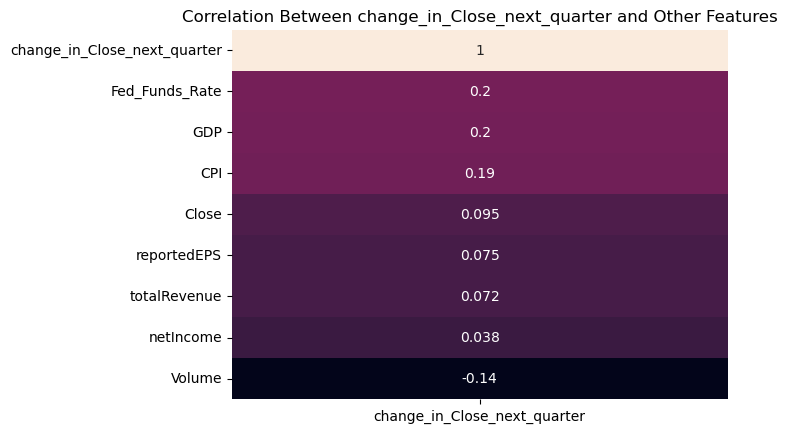

In [23]:
plt.figure()
data = apple_linear_reg.corr()[["change_in_Close_next_quarter"]].sort_values(by="change_in_Close_next_quarter", ascending=False)
sns.heatmap(data, annot=True, cbar=False)
plt.title("Correlation Between change_in_Close_next_quarter and Other Features");

The plot above matches with the previous plots. There is no strong correlation between the change in the closing price next quarter and other features. As can be analysed from the plot above, many of our values have almost 0 correlation. Following the correlation does not imply independence mantra, we are not saying that the variables are independent or that correlation implies causation, but the plot of correlations just give a naive understanding of the relationships. 

We will now proceed with normalisation of the data and then fitting the Linear regression model!

In [24]:
cols = [col for col in apple_linear_reg.columns if col != "change_in_Close_next_quarter"]
scaler = MinMaxScaler()
apple_linear_reg[cols] = scaler.fit_transform(apple_linear_reg[cols])

In [25]:
X = apple_linear_reg.drop(columns="change_in_Close_next_quarter")
y = apple_linear_reg["change_in_Close_next_quarter"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True) # no need to stratify as we are not classifying

Previously, we used grid search for logistic regression and passed on scoring dictionary, containing precision and recall metrics, for the model to be evaluated on so that the best hyperparameters can be selected based on these metrics.


However, for linear regression, we can not make such dictionary because linear regression is not a classification model. Now because we can not fine tune our model using the same method as before, we will use the regular linear regression, and then Ridge reression and see how they perform.

MAE on training set: 8.31
R2 on training set: 0.21
Training Accuracy: 0.71
              precision    recall  f1-score   support

        -1.0       0.53      0.53      0.53        15
         1.0       0.79      0.79      0.79        33

    accuracy                           0.71        48
   macro avg       0.66      0.66      0.66        48
weighted avg       0.71      0.71      0.71        48



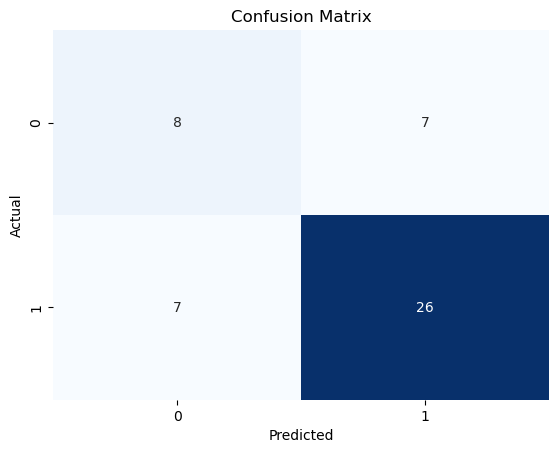

In [26]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print MAE, and R2 on the training set
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE on training set: {mae_train:.2f}")
print(f"R2 on training set: {r2_train:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_train) == np.sign(y_pred_train))
total_predictions = len(y_train)
accuracy = correct_predictions / total_predictions
print(f"Training Accuracy: {accuracy:.2f}")

report = classification_report(np.sign(y_train), np.sign(y_pred_train))
# print the classification report
print(classification_report(np.sign(y_train), np.sign(y_pred_train)))

plt.figure()
sns.heatmap(confusion_matrix(np.sign(y_train), np.sign(y_pred_train)), annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

We see that the model has an accuracy of 0.71 on the training set. The precision and recall for class `1` (Buy) are 0.79 and 0.79, respectively. The precision is the proportion of true positive predictions among all positive predictions, while the recall is the proportion of true positive predictions among all actual positive instances. The scores are impressive. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model. The model, somehow, performs better than Logistic Regression on the Train Set. One more remark: MAE has a nice interpretation here too. It tells us that on average, we are 8.31% away in absolute value from the truu relative change!

Let's put the trained model on the testing set!

MAE on training set: 8.12
R2 on training set: 0.06
Training Accuracy: 0.69
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        15
         1.0       0.69      1.00      0.81        33

    accuracy                           0.69        48
   macro avg       0.34      0.50      0.41        48
weighted avg       0.47      0.69      0.56        48



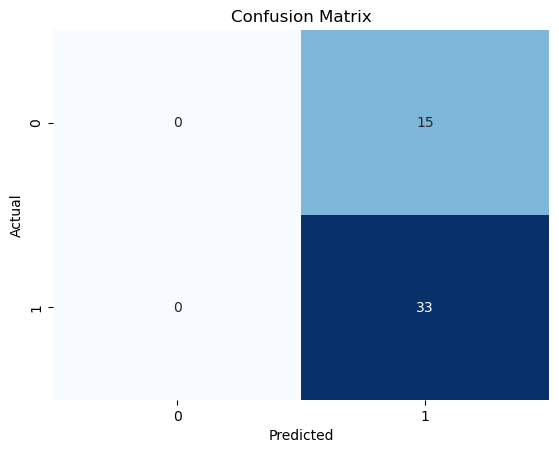

In [27]:
# Now, using the Ridge regression model - a linear regression model with L2 regularization
# Default alpha value is 1.0 - meaning the regularization strength is 1.0. the equation becomes:
# Loss = OLS Loss + alpha * (sum of square of coefficients)
# The higher the alpha, the stronger the regularization.

model = Ridge()

# Fit the model
model.fit(X_train, y_train)

# Print MAE, and R2 on the training set
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE on training set: {mae_train:.2f}")
print(f"R2 on training set: {r2_train:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_train) == np.sign(y_pred_train))
total_predictions = len(y_train)
accuracy = correct_predictions / total_predictions
print(f"Training Accuracy: {accuracy:.2f}")

report = classification_report(np.sign(y_train), np.sign(y_pred_train))
# print the classification report
print(classification_report(np.sign(y_train), np.sign(y_pred_train)))

plt.figure()
sns.heatmap(confusion_matrix(np.sign(y_train), np.sign(y_pred_train)), annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Standard linear regression works better than Ridge regression for this dataset. Let's now evaluate on the test set.


MAE on training set: 11.66
R2 on training set: -0.44
Testing Accuracy: 0.67
              precision    recall  f1-score   support

        -1.0       0.40      0.67      0.50         3
         1.0       0.86      0.67      0.75         9

    accuracy                           0.67        12
   macro avg       0.63      0.67      0.62        12
weighted avg       0.74      0.67      0.69        12



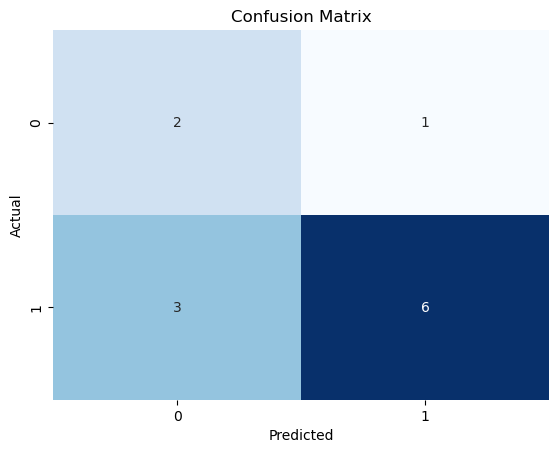

In [28]:
# Standard linear regression works better than Ridge regression for this dataset. Let's now evaluate on the test set.

# Predict on the test set
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print MAE, and R2 on the training set
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MAE on training set: {MAE:.2f}")
print(f"R2 on training set: {R2:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_test) == np.sign(y_pred))
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print(f"Testing Accuracy: {accuracy:.2f}")

report = classification_report(np.sign(y_test), np.sign(y_pred))
# print the classification report
print(classification_report(np.sign(y_test), np.sign(y_pred)))

plt.figure()
sns.heatmap(confusion_matrix(np.sign(y_test), np.sign(y_pred)), annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

On the test set, the model performs a bit worse than the training set in terms of accuracy. The accuracy is 0.67. However, as we care more about the precision and recall for class 1, we can see that the precision is 0.86 and the recall is 0.67. This means that the model correctly predicts stock increases 86% of the time. More importantly, it makes only 14% error of making us buy when we should not. The model correctly identifies 67% (recall) of the quarters where the stock price increased as quarters where the stock price increased. When comparing Linear Regression with Logistic Regression, Logistic Regression obviously wins.

--- 

# Support Vector Machine - No Feature Engineering

### What is a Support Vector Machine?

A **Support Vector Machine (SVM)** is a supervised machine learning algorithm used for **classification** and **regression** problems. SVMs are particularly effective for binary classification tasks, where the goal is to identify a decision boundary that best separates two classes. 

In SVMs, the decision boundary is a hyperplane that maximizes the **margin** (distance) between the boundary and the closest data points (called **support vectors**) from each class. This leads to a robust and generalized model.

---

### Important Parameters of SVM

SVM has several hyperparameters that influence its performance. Below are the key ones we will focus on:

1. `C` **(Regularization Parameter)**    
> The `C` parameter controls the **trade-off between maximizing the margin** and **minimizing classification errors**.  
A **small** `C` value allows for a **larger margin** and tolerates some misclassifications (simpler model, less overfitting). A **large `C`** value forces the model to classify all training data correctly, potentially leading to overfitting.  
  - Start with the default value `C=1.0`.
  - Increase `C` for more strict classification and decrease `C` to allow flexibility.

2. `kernel` **(Kernel Function)**  
> The `kernel` parameter determines the type of **hyperplane** or decision boundary used to separate the classes. It enables SVM to capture non-linear relationships in the data.  
 - **Common kernel types**:
  - **`linear`**: A simple linear boundary (fast and efficient for linearly separable data).
  - **`rbf` (Radial Basis Function)**: Maps the data to a higher-dimensional space to find non-linear boundaries.
  - **`poly`**: Polynomial kernel, used for more complex non-linear boundaries.   
  - Start with **`rbf`** as it works well in most cases.
  - Use **`linear`** if the data is linearly separable or has many features.

3. `gamma` **(Kernel Coefficient)**  
  > The `gamma` parameter controls the influence of individual training points in the `rbf` and `poly` kernels. It defines how far a single training point's influence reaches.
  - A **small** `gamma` value considers points far from the decision boundary, leading to a smoother, generalized model.
  - A **large** `gamma` value focuses on points very close to the boundary, resulting in a complex, localized decision surface (can cause overfitting).  
  - Start with `gamma='scale'`, which adjusts the value automatically based on the input features.
  - Use **small values** (e.g., `0.01`) for a smoother model or **large values** (e.g., `1.0`) for more complex decision boundaries.

4. `class_weight` **(Handling Imbalanced Classes)**  
> The `class_weight` parameter helps address **imbalanced datasets** by assigning higher weights to underrepresented classes. This ensures that the model does not bias towards the majority class. Options:
  - `None`: Equal weight for all classes (default).
  - `balanced`: Automatically adjusts weights inversely proportional to class frequencies.
  - Use `class_weight='balanced'` when there is significant class imbalance (e.g., if "Buy" occurs much less frequently than "Not Buy").

---

### Summary of Parameters

| Parameter       | Description                              | Default Value   | When to Tune           |
|-----------------|------------------------------------------|-----------------|------------------------|
| **`C`**        | Regularization strength                  | `1.0`           | Overfitting/Underfitting|
| **`kernel`**   | Type of kernel function                  | `'rbf'`         | Linear vs Non-linear   |
| **`gamma`**    | Influence of individual training points  | `'scale'`       | Smooth vs Complex Model|
| **`class_weight`** | Adjust weights for imbalanced classes   | `None`          | Imbalanced datasets    |


### Conclusion

Support Vector Machines are a powerful choice for classification tasks, especially when dealing with non-linear relationships or high-dimensional data. By tuning hyperparameters like **`C`**, **`gamma`**, and **`class_weight`**, we can optimize the model to achieve the best performance for predicting **"Buy" or "Not Buy"** in our stock dataset.

--- 

In [29]:
# Using the already prepared dataset from the logistic regression model
apple_svm = log_reg_rel.copy()

In [30]:
# From the EDA, we remember that our target class is imbalanced, so when instantiating the model, we will take this into account.
prop = apple_svm.Buy.value_counts(normalize=True)
print(f"Proportion of Buy: {prop[1]:.2f} and Not Buy: {prop[0]:.2f}")

Proportion of Buy: 0.70 and Not Buy: 0.30


In [31]:
X = apple_svm.drop(columns="Buy")
y = apple_svm["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [32]:
# Instantiate the model
model = SVC(random_state=0)

# Defining the hyperparameters to be tuned
param_grid = {
    "C": C_values, # small value: larger margin, large value: smaller margin. Meaning high C means stricter classification.
    "kernel": ["rbf", "poly"], # Because we have a non-linear dataset, we will use the rbf and poly kernels.
    "class_weight": [inverse_class_frequencies_dict, "balanced", None], # to account for the class imbalance
    "gamma": ["scale", .5, 1, 2, "auto"] # small gamma means more generalization, large gamma means overfitting
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="Precision_Class_1",
    n_jobs=-1,
    verbose=1,
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                               0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                               0.9, 0.95, 1.01, 1.06, 1.11, 1.16, 1.21, 1.26,
                               1.31, 1.36, 1.41, 1.46, ...],
                         'class_weight': [{0: 3.3333333333333335,
                                           1: 1.4285714285714286},
                                          'balanced', None],
                         'gamma': ['scale', 0.5, 1, 2, 'auto'],
                         'kernel': ['rbf', 'poly']},
             refit='Precision_Class_1',
             scoring={'Precision_Class_1': make_scorer(precision_score, response_method='predict', pos_label=1, average=binary, zero_division=0),
                      'Recall_Class_1': make_scorer(recall_score, response_method='predict', pos_label=1, average=binary)},
             verbose=1)

In [33]:
# print the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 2.96, 'class_weight': 'balanced', 'gamma': 2, 'kernel': 'poly'}


Accuracy on training set: 0.81
Classification report on training set:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.86      0.88      0.87        34

    accuracy                           0.81        48
   macro avg       0.77      0.76      0.77        48
weighted avg       0.81      0.81      0.81        48



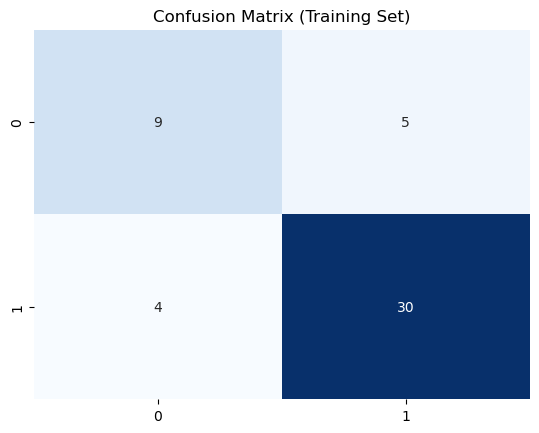

In [34]:
# print the accuracy score, the precision score, and the recall score on the training set
best_model = SVC(**best_params, random_state=0)
best_model.fit(X_train, y_train)

accuracy_train = best_model.score(X_train, y_train)
y_pred_train = best_model.predict(X_train)


classification_report_train = classification_report(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Classification report on training set:\n{classification_report_train}")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure()
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Training Set)");

We see that the model has an accuracy o 0.81 (0.71 for LogReg) on the training set. The precision and recall for class `1` (Buy) are 0.86 (0.79 for LogReg) and 0.88 (0.79 for LogReg), respectively. The scores, at least on the train set, are better than Logistic Regression. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model.

Let's put the trained model on the testing set!

Accuracy on test set: 0.75
Classification report on test set:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



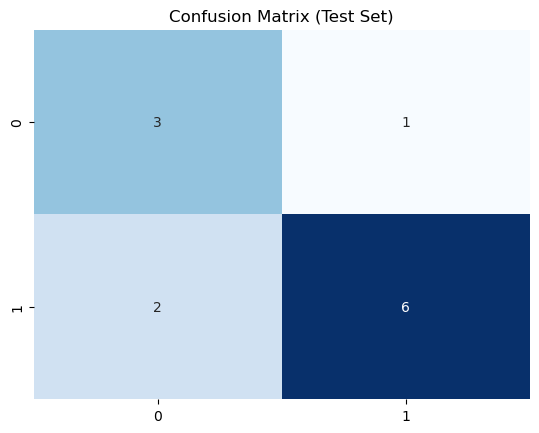

In [35]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification report on test set:\n{classification_report_test}")

# Confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)");

On the test set, the model performs a bit worse than the training set in terms of accuracy. The accuracy is 0.75. However, as we care more about the precision and recall for class 1, we can see that the precision is 86% on the test set and the recall is 75%. This means that the model correctly predicts stock increases 86% of the time. More importantly, it makes only 14% error of making us buy when we should not. The model correctly identifies 75% (recall) of the quarters where the stock price increased as quarters where the stock price increased. When comparing SVM with Logistic Regression, They both perform the same, in terms of scores, on the test set!

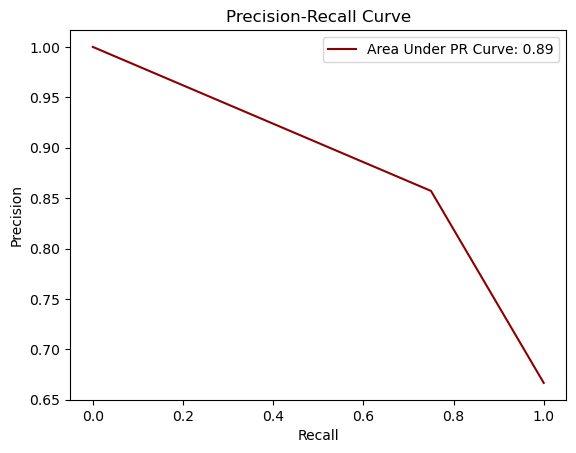

Area Under PR Curve: 0.89


In [36]:
# precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color="darkred", label=f"Area Under PR Curve: {auc_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print(f"Area Under PR Curve: {auc_score:.2f}")

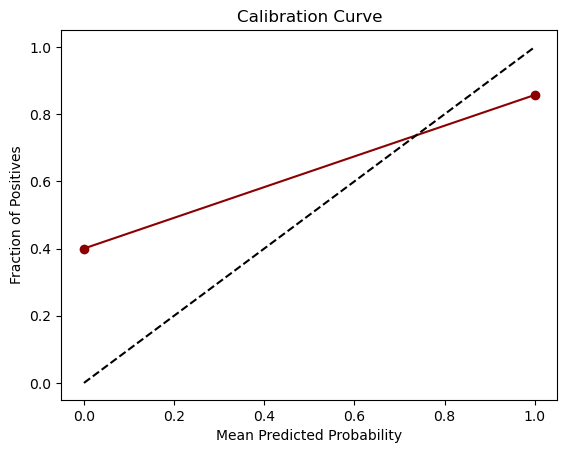

In [37]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

Instead of providing detailed interpretation here about the two plots above, I would like to invite you to read the interpretation from the Logistic Regression Section, for both models output almost the same PR Curve and Calibration Curve

---

# XGBoost

We will use XGBoost (Extreme Gradient Boosting), which is a popular machine learning algorithm. Why XGBoost for Binary Classification?

- XGBoost builds a powerful predictive model by combining the predictions of multiple individual models (called base learners), hence classified as ensemble learning model. It operates sequentially, with each new model correcting the errors made by the previous ones.

- XGBoost primarily uses decision trees as its base learners. Decision Trees, in the context of Machine Learning, are models that predicts the value of a target variable based on several input features by learning simple decision rules inferred from the data features.

- Decision trees consist of nodes that represent features, branches that represent decisions or rules, and leaf nodes that represent the outcome or prediction. At each node, the tree algorithm selects the best feature to split the data based on certain criteria (e.g., Gini impurity)

- XGBoost fits each new tree to the residuals (the differences between predicted and actual values) of the previous trees. At each step, the algorithm tries to minimize the loss function by adding a new tree that reduces the residuals. The algorith is also scalabe and efficient even to large datasets.

- Real-world data often contains complex non-linear relationships. **XGBoost with decision trees can capture these non-linear patterns** better than traditional logistic regression.

---

**Hyperparameters and their Roles**:

1. Learning Rate (eta):
Controls the step size at each iteration while moving toward a minimum of the loss function. Lower values make the model more robust but require more boosting rounds.

2. Maximum Depth (max_depth):
Limits the maximum depth of the individual trees in the ensemble. Higher depths allow the model to capture more complex relationships but increase the risk of overfitting.

3. Number of Trees (n_estimators):
Specifies the number of boosting rounds or trees to be built. A higher number of trees can lead to overfitting, while too few trees might result in underfitting.

4. Regularization Parameters (lambda, alpha):
Lambda (L2 regularization term) and alpha (L1 regularization term) help control overfitting by adding penalty terms to the objective function.

5. Minimum Child Weight (min_child_weight):
Specifies the minimum sum of instance weight needed in a child. Higher values prevent the model from learning too specific patterns.

6. Gamma and Column Subsampling (colsample_bytree):
Gamma corresponds to the minimum loss reduction allowed for a split to occur. Higher values means model is more conservative regarding making splits in the tree. `colsample_bytree` controls the fraction of features (columns) to be randomly sampled for building each tree during training. A value of 1 means all columns are used.

By tuning these hyperparameters effectively, we can enhance the model's performance, avoid overfitting, and build a more accurate predictive model using XGBoost. To tune the hyperparameters, we will use RandomizedSearchCV and k-fold cross validation from sklearn. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Randomized Search is typically faster and more efficient for large search spaces since it considers only a sample of the combinations of the hyperparameters in question.

---

In [38]:
# Using the already prepared dataset from the logistic regression model
xgboost_df = apple_svm.copy()
X = xgboost_df.drop(columns="Buy")
y = xgboost_df["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

neg, pos = np.bincount(y)
scale_pos_weight = neg / pos # to account for the class imbalance

In [39]:
# parameters to tune for the XGBoost model
param_grid = {
    'eta': [0.01, 0.1, 0.3], # learning rate - default=0.3
    'max_depth': [3, 5, 7, 9], # maximum depth of the tree - default=6
    'subsample': [0.5, 0.7, 1], # fraction of observations to be randomly sampled for each tree - Default=1
    'colsample_bytree': [0.5, 0.7, 1], # fraction of columns to be randomly sampled for each tree - Default=1 
    'n_estimators': [100, 200, 300], # number of trees - Default=100
    'reg_lambda': [0, .2, 0.5, .8, 1], # L2 regularization - Default=1
    'scale_pos_weight': [scale_pos_weight, 1] # to account for the class imbalance
}

# Instantiate the XGBoost model
model = XGBClassifier(random_state=0)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="Precision_Class_1",
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                         'reg_lambda': [0, 0.2, 0.5, 0.8, 1],
                         'scale_pos_weight': [0.42857142857142855, 1],
                         'subsample': [0.5, 0.7, 1]},
             refit='Precision_Class_1',
             scoring={'Precision_Class_1': make_scorer(precision_score, response_method='predict', pos_label=1, average=binary, zero_division=0),
                      'Recall_Class_1': make_scorer(recall_score, response_method='predict', pos_label=1, average=binary)},
             verbose=1)

In [40]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'colsample_bytree': 0.5, 'eta': 0.3, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 0.2, 'scale_pos_weight': 0.42857142857142855, 'subsample': 0.7}


We can tweak the best hyperparameters chosen by the grid search to our dataset according to the state of the data we have. What we mean is the following: Due to limited number of features and dataset size, we want `colsample_bytree` to be 1 instead of 0.5, because we want all the columns to be considered by the model. Similar approach will be taken for `subsample` and we will also equate to 1. Now, to counter overfitting, we will then shift `reg_lambda` from 0.2 to 1.

Accuracy on training set: 0.96
Classification report on training set:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.94      0.97        34

    accuracy                           0.96        48
   macro avg       0.94      0.97      0.95        48
weighted avg       0.96      0.96      0.96        48



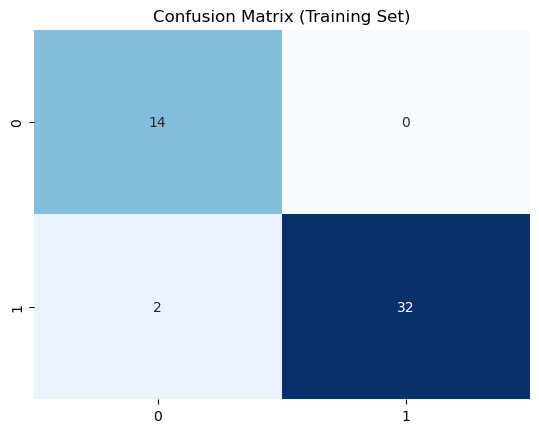

In [47]:
best_params = {'colsample_bytree': 1, 'eta': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1, 'scale_pos_weight': scale_pos_weight, 'subsample': 1}

# print the accuracy score, the precision score, and the recall score on the training set
best_model = XGBClassifier(**best_params, random_state=0)

best_model.fit(X_train, y_train)

accuracy_train = best_model.score(X_train, y_train)
y_pred_train = best_model.predict(X_train)

classification_report_train = classification_report(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Classification report on training set:\n{classification_report_train}")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure()
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Training Set)");


We see that the model has an accuracy o 0.96 (0.81 for SVM) on the training set. The precision and recall for class `1` (Buy) are 1.00 (0.86 for SVM) and 0.94 (0.79 for SVM), respectively. The scores, at least on the train set, are better than both SVM and Logistic Regression. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model.

Let's put the trained model on the testing set!

Accuracy on test set: 0.58
Classification report on test set:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.67      0.75      0.71         8

    accuracy                           0.58        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.56      0.58      0.57        12



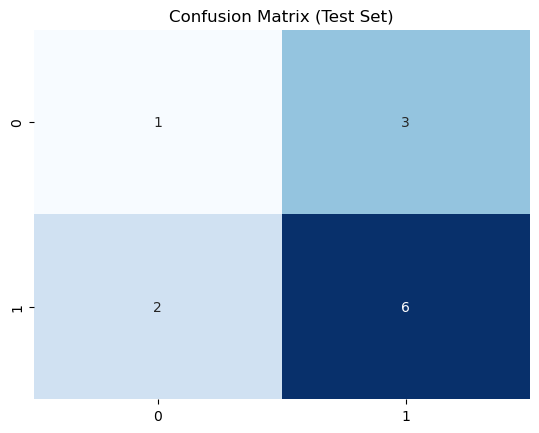

In [48]:
# Test the model
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification report on test set:\n{classification_report_test}")

# Confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)");

On the test set, the model performs worse than the training set in terms of accuracy (indication of variance). The accuracy is 0.58. However, as we care more about the precision and recall for class 1, we can see that the precision is 0.67 on the test set and the recall is 0.75. This means that the model correctly predicts stock increases 67% of the time. More importantly, it makes 33% error of making us buy when we should not. The model correctly identifies 75% (recall) of the quarters where the stock price increased as quarters where the stock price increased. When comparing the model with SVM and Logistic Regression, SVM and LogReg surely win for their precision.

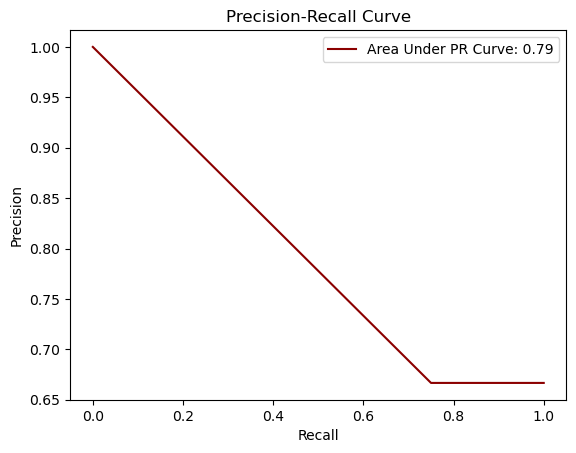

Area Under PR Curve: 0.79


In [49]:
# plot the precision recall curve

# Calculate the precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color="darkred", label=f"Area Under PR Curve: {auc_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print(f"Area Under PR Curve: {auc_score:.2f}")

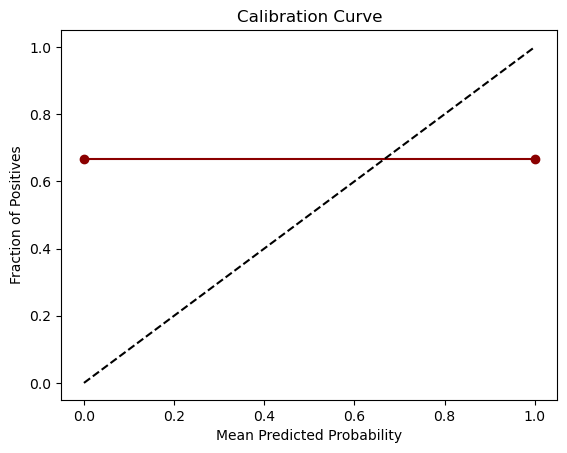

In [50]:
# plot calibration curve

# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

The model is not well calibrated at all! A calibration curve with a horizontal line indicates a very specific type of miscalibration. Regardless of what probability the model predicts (from near 0 to near 1), the actual fraction of positive instances is consistently around 67%. The model is not confident enough in its predictions. It's not assigning high enough probabilities to the positive class, even when the data strongly suggests a positive outcome. It is also not predicting low enough probabilities for negative classes. The model is essentially saying "I'm not really sure, but it's probably around 67%."

---

# Neural Networks - No Feature Engineering

In [345]:
nn_df = log_reg_rel.copy()
X = nn_df.drop(columns="Buy")
y = nn_df["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [346]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32) # X_train_tensor shape: torch.Size([48, 8])
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32) # X_test_tensor shape: torch.Size([12, 8])
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) # y_train_tensor shape: torch.Size([48, 1])
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1) # y_test_tensor shape: torch.Size([12, 1])

**Defining the Structure for our Neural Netowrk:**

Neural Network Architecture: `NeuralNetwork_Apple`

This is a feedforward neural network designed for binary classification, implemented using PyTorch. Below are the architectural details:

1. **Input Layer**:
   - The input size is determined by the number of features (`input_size`) - 8 in our case 

2. **Hidden Layers**:
   - **First Hidden Layer**:
     - Fully connected layer with 128 neurons - even though the initial choice of neurons in the first hidden layer are high, dropout is also introduced to overcome overfitting
     - Batch normalization to stabilize and accelerate training.
     - ReLU activation for non-linearity.
     - Dropout to prevent overfitting, with a rate of `dropout_rate`.
   - **Second Hidden Layer**:
     - Fully connected layer with 64 neurons.
     - Batch normalization, ReLU activation, and dropout as above.
   - **Third Hidden Layer**:
     - Fully connected layer with 32 neurons.
     - Batch normalization, ReLU activation, and dropout as above.
   - **Fourth Hidden Layer**:
     - Fully connected layer with 16 neurons.
     - Batch normalization, ReLU activation, and dropout as above.

3. **Output Layer**:
   - Fully connected layer with 1 neuron to produce the output.
   - A sigmoid activation function to map the output to the range [0, 1], representing a probability for binary classification.

4. **Initialization**:
   - Weights of all linear layers are initialized using the Kaiming Normal (HE) initialization for better convergence.
   - Biases are initialized to zero.

5. **Forward Pass**:
   - Data flows sequentially through the layers defined in the model, with each layer applying transformations such as linear mapping, activation, normalization, and dropout.

This architecture is designed to effectively handle tabular data with a moderate number of features, leveraging regularization (dropout) and batch normalization to improve generalization and training stability.


In [347]:
# Define the Neural Network model
class NeuralNetwork_Apple(nn.Module):
    def __init__(self, input_size, dropout_rate): # input_size = number of features, dropout_rate = dropout rate
        super(NeuralNetwork_Apple, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(16, 1),
            nn.Sigmoid()   
        )
        self.apply(self.init_weights)

    def init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.kaiming_normal_(module.weight)
            nn.init.zeros_(module.bias)
        
    def forward(self, x):
        return self.network(x)

**Overview of Functions used for Model Training, Evaluation, and Testing**

1. `create_fold_loaders`
- **Purpose**: Creates a list of data loaders for cross-validation using Stratified K-Fold.
- **Inputs**: Training tensors (`X_train_tensor`, `y_train_tensor`) and the number of splits (`n_splits`).
- **Outputs**: A list of `(train_loader, val_loader)` tuples for each fold.
- **Role**: Prepares data splits for training and validation, ensuring class distribution consistency.

---

2. `train_model`
- **Purpose**: Trains the neural network using a given data loader and applies early stopping.
- **Inputs**: Model, data loaders (`train_loader`, `val_loader`), loss function, optimizer, number of epochs, and patience for early stopping.
- **Outputs**: The best model state, training losses, and validation losses.
- **Role**: Performs model training, monitors validation loss, and saves the best model to prevent overfitting.

---

3. `evaluate_model`
- **Purpose**: Evaluates the trained model on a given data loader.
- **Inputs**: Model, data loader, and a decision threshold for binary classification.
- **Outputs**: Predictions and true labels.
- **Role**: Generates predictions from the model and compares them to the ground truth for further analysis.

---

4. `print_metrics`
- **Purpose**: Computes and displays classification metrics.
- **Inputs**: True labels (`y_true`) and predicted labels (`y_pred`).
- **Outputs**: None (displays metrics).
- **Role**: Provides detailed evaluation of the model’s performance, including accuracy, classification report, and confusion matrix.

---

5. `plot_train_val_loss`
- **Purpose**: Visualizes the training and validation loss over epochs.
- **Inputs**: Lists of training and validation losses.
- **Outputs**: None (displays a loss curve).
- **Role**: Helps monitor overfitting or underfitting during training.

---

6. `train_and_evaluate`
- **Purpose**: Orchestrates the complete training and evaluation process using Stratified K-Fold with special focus on the Precision and Recall for class 1 (Buy).
- **Inputs**: Training tensors, model parameters (e.g., `input_size`, `dropout_rate`), and training hyperparameters (e.g., `num_epochs`, `early_stopping_patience`).
- **Outputs**: The best model and a DataFrame summarizing metrics for each fold.
- **Role**: Combines fold preparation, model training, and performance analysis across multiple splits.

---

7. `test_model`
- **Purpose**: Tests the final trained model on a test set and prints metrics.
- **Inputs**: Model, test tensors (`X_test`, `y_test`), and a threshold for classification.
- **Outputs**: Predictions and true labels.
- **Role**: Validates the final model’s performance on unseen data.

---

Sequence and Cooperation:
1. **Data Preparation**: `create_fold_loaders` splits data into folds for cross-validation.
2. **Model Training**: `train_model` trains on the training set and validates on the validation set.
3. **Evaluation**: `evaluate_model` generates predictions for each fold, while `print_metrics` and `plot_train_val_loss` assess performance.
4. **Cross-Validation**: `train_and_evaluate` integrates the above steps to train and evaluate the model across multiple folds, selecting the best-performing model.
5. **Final Testing**: `test_model` evaluates the selected model on the test set, providing a final performance report.


After an iterative process of adjusting the learning rate and dropout rate, aided by the plots generated for each training fold and the final dataframe consisting of results, we determined that the optimal learning rate is 0.01 and the optimal dropout rate is 0.3. This is also consitent because we chose 128 neurons in the first hidden layer and we have multiple hidden layers. Thus, to avoid overfitting, a dropout of 0.3 aligns well.


Training Fold 1
Epoch [5/100], Train Loss: 0.5573, Val Loss: 0.8987
Epoch [10/100], Train Loss: 0.5345, Val Loss: 0.8556
Epoch [15/100], Train Loss: 0.4364, Val Loss: 0.7215
Epoch [20/100], Train Loss: 0.4162, Val Loss: 0.6174
Epoch [25/100], Train Loss: 0.4393, Val Loss: 0.5717
Epoch [30/100], Train Loss: 0.4012, Val Loss: 0.5886
Epoch [35/100], Train Loss: 0.3988, Val Loss: 0.6327
Epoch [40/100], Train Loss: 0.4251, Val Loss: 0.6433
Epoch [45/100], Train Loss: 0.4040, Val Loss: 0.6083
Early stopping triggered at epoch 46
Fold 1 Precision: 0.6667
Fold 1 Recall: 0.8571


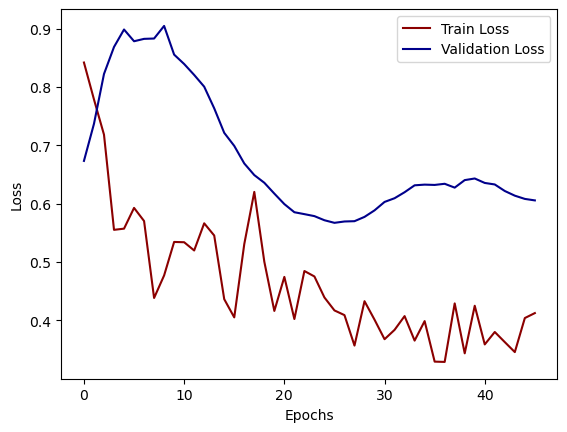


Training Fold 2
Epoch [5/100], Train Loss: 0.5681, Val Loss: 0.8526
Epoch [10/100], Train Loss: 0.6546, Val Loss: 0.8811
Epoch [15/100], Train Loss: 0.5722, Val Loss: 0.6767
Epoch [20/100], Train Loss: 0.5660, Val Loss: 0.5818
Epoch [25/100], Train Loss: 0.5147, Val Loss: 0.5896
Epoch [30/100], Train Loss: 0.4639, Val Loss: 0.6076
Epoch [35/100], Train Loss: 0.5303, Val Loss: 0.6054
Epoch [40/100], Train Loss: 0.4265, Val Loss: 0.6707
Early stopping triggered at epoch 42
Fold 2 Precision: 0.8571
Fold 2 Recall: 0.8571


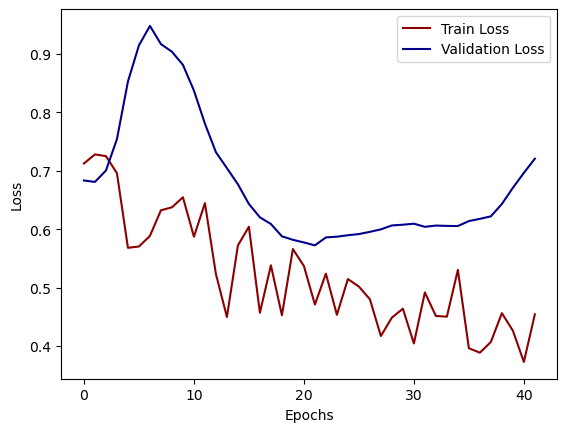


Training Fold 3
Epoch [5/100], Train Loss: 0.7942, Val Loss: 0.8819
Epoch [10/100], Train Loss: 0.5006, Val Loss: 0.8055
Epoch [15/100], Train Loss: 0.6722, Val Loss: 0.6275
Epoch [20/100], Train Loss: 0.5294, Val Loss: 0.6644
Epoch [25/100], Train Loss: 0.4378, Val Loss: 0.7662
Epoch [30/100], Train Loss: 0.3286, Val Loss: 0.8035
Early stopping triggered at epoch 35
Fold 3 Precision: 0.7143
Fold 3 Recall: 0.7143


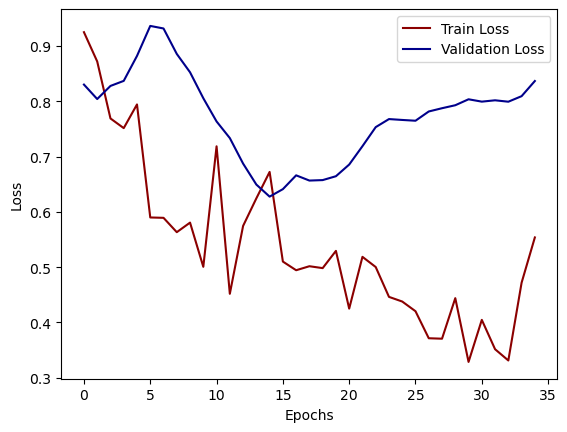


Training Fold 4
Epoch [5/100], Train Loss: 0.5991, Val Loss: 0.7024
Epoch [10/100], Train Loss: 0.6701, Val Loss: 0.6951
Epoch [15/100], Train Loss: 0.4854, Val Loss: 0.6586
Epoch [20/100], Train Loss: 0.4584, Val Loss: 0.6145
Epoch [25/100], Train Loss: 0.5527, Val Loss: 0.5896
Epoch [30/100], Train Loss: 0.3566, Val Loss: 0.5813
Epoch [35/100], Train Loss: 0.5292, Val Loss: 0.5849
Epoch [40/100], Train Loss: 0.4971, Val Loss: 0.6042
Epoch [45/100], Train Loss: 0.4453, Val Loss: 0.6512
Epoch [50/100], Train Loss: 0.4768, Val Loss: 0.7187
Early stopping triggered at epoch 51
Fold 4 Precision: 0.7500
Fold 4 Recall: 1.0000


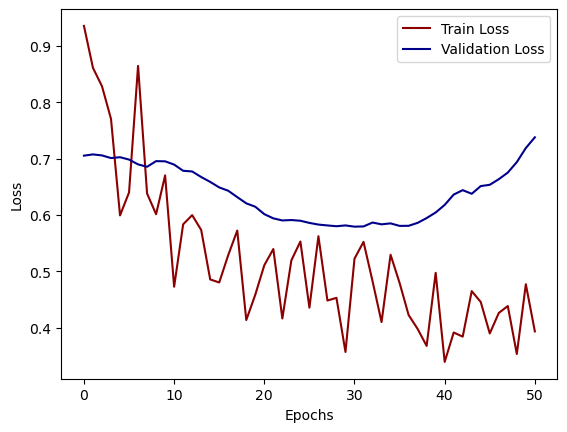


Training Fold 5
Epoch [5/100], Train Loss: 0.8261, Val Loss: 0.7939
Epoch [10/100], Train Loss: 0.5395, Val Loss: 0.6776
Epoch [15/100], Train Loss: 0.5483, Val Loss: 0.6722
Epoch [20/100], Train Loss: 0.4074, Val Loss: 0.6815
Epoch [25/100], Train Loss: 0.4419, Val Loss: 0.7136
Epoch [30/100], Train Loss: 0.3667, Val Loss: 0.7966
Early stopping triggered at epoch 31
Fold 5 Precision: 0.7500
Fold 5 Recall: 0.8571


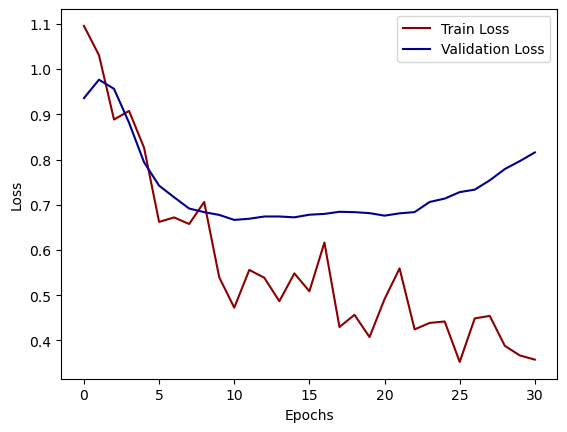


Best Precision across folds: 0.8571


fold  precision    recall  accuracy  \
1    2   0.857143  0.857143  0.800000   
3    4   0.750000  1.000000  0.777778   
4    5   0.750000  0.857143  0.666667   
2    3   0.714286  0.714286  0.600000   
0    1   0.666667  0.857143  0.600000   

                                         model_state  
1  {'network.0.weight': [[tensor(0.4501), tensor(...  
3  {'network.0.weight': [[tensor(0.0314), tensor(...  
4  {'network.0.weight': [[tensor(-0.9653), tensor...  
2  {'network.0.weight': [[tensor(-0.1915), tensor...  
0  {'network.0.weight': [[tensor(-0.4961), tensor...

In [390]:
input_size = X_train_tensor.shape[1]
best_model, data = train_and_evaluate(X_train_tensor, y_train_tensor, input_size, n_splits=5, learning_rate=0.01, dropout_rate=0.3, num_epochs=100, early_stopping_patience=20, threshold=0.5)

Fold 4 gives us the best set of model_state, conidering the plots, the validation lossed printed above, and also the datafram of results. We will use that for the test set!

In [411]:
best_model.load_state_dict(data["model_state"].iloc[1])


<All keys matched successfully>


Test Set Metrics:
Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.70      0.88      0.78         8

    accuracy                           0.67        12
   macro avg       0.60      0.56      0.56        12
weighted avg       0.63      0.67      0.63        12


Confusion Matrix:


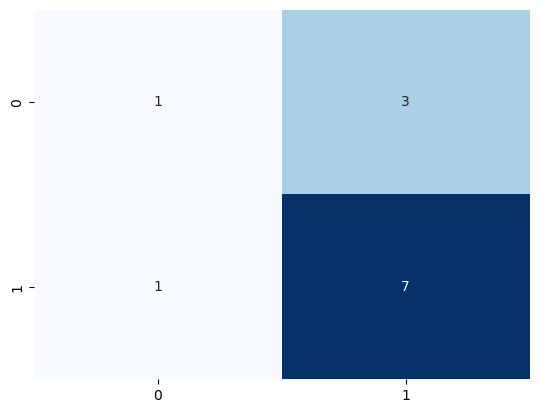

In [412]:
test_predictions, test_labels = test_model(best_model, X_test_tensor, y_test_tensor, threshold=0.5)

On the test set, the model gives an accuracy of 0.67 (lower than SVM and LogReg). As we care more about the precision and recall for class 1, we can see that the precision is 0.70 and the recall is 0.88. This means that the model correctly predicts stock increases 70% of the time. More importantly, it makes 30% error of making us buy when we should not. The model correctly identifies 88% (recall) of the quarters where the stock price increased as quarters where the stock price increased. However, because the precision is quite low as compared to LogReg and SVM, they take the lead.

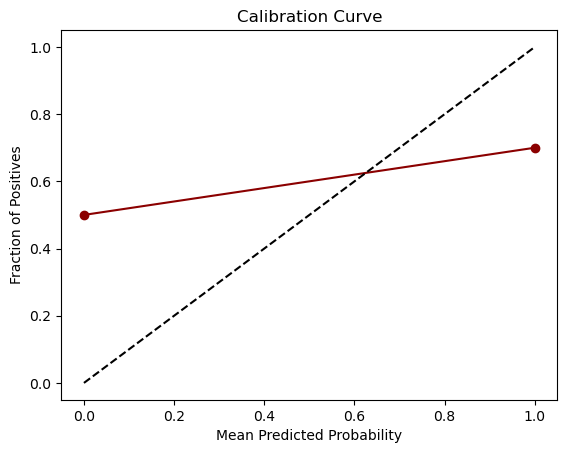

In [413]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(test_labels, test_predictions, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

The **x-axis** represents the predicted probabilities output by the neural network (NN) model, grouped into bins. The **y-axis** represents the fraction of true positive outcomes (observed probabilities) within each bin of predicted probabilities.

The **dashed diagonal line** represents a perfectly calibrated model. A perfectly calibrated model's predictions would fall on this line, meaning the predicted probabilities align exactly with the observed probabilities. For instance, if the model predicts a 0.6 probability for a set of instances, then 60% of those instances should actually belong to the positive class.

The **red line** shows how the NN's predicted probabilities compare to the true observed probabilities:

- At lower predicted probabilities (e.g., the leftmost red point near 0.0), the fraction of positives is much higher than the predicted probability. This indicates that the model **underpredicts** the likelihood of positive outcomes in this range.
- At higher predicted probabilities (e.g., the rightmost red point near 1.0), the predicted probabilities are close to being perfectly calibrated. However, the slight deviation suggests a mild overconfidence or slight underestimation in this range.

**Model's Behavior**:
- **At lower predicted probabilities (0–0.5)**: The model is poorly calibrated. It tends to **underestimate** the likelihood of positive outcomes, as the observed fraction of positives is higher than predicted.
- **At higher predicted probabilities (0.6–1.0)**: The model is better calibrated and nearly aligns with the diagonal line in the (0.6 -0.8 range), indicating that predictions in this range are more reliable. 

**Implications**:
- **Lower probability predictions** are unreliable because the model systematically underestimates the actual probability of positive outcomes. This suggests that the model struggles to distinguish between positive and negative outcomes in this range, possibly due to issues with the loss function, data imbalance, or insufficient training.
- **Higher probability predictions** are reasonably reliable, as the model aligns closely with the true fraction of positives.

In summary, while the model shows reasonable calibration at higher probabilities, significant underestimation occurs at lower probabilities, suggesting room for improvement in training or recalibration techniques.

# Feature Engineering

What is __Feature Engineering__?
Feature engineering is the process of using domain knowledge to extract features from existing data to further enhance the information and find patters intermingling with our target variable. These features can be used to improve the performance of machine learning algorithms.

One feature, thanks to our domain knowledge, that we have selected is as follows:

**Price to Earnings Ratio**: The price to earnings ratio (P/E ratio) is the ratio for valuing a company that measures its current share price relative to its per-share earnings. It is also known as the price multiple or the earnings multiple.

Moreover, we ourselves defined our target variable, named as `Buy`. Buy is defined as: <br><br>
$$
  \text{Buy} = 1 \text{ if } \text{Relative Change in Close next Quarter} > 0, \text{ otherwise } 0
$$
  where:
$$
  \text{Relative Change in Close next Quarter} = \frac{\text{Close}_{t+1} - \text{Close}_t}{\text{Close}_t}
$$

### Important Remark:

We will, from now on, consider relative changes from the last quarter instead of absolute values for this quarter as inputs to our model because relative changes normalize the data, remove trends, and better capture directional movements, which are crucial for predicting the sign of future stock price changes. This approach also ensures that our features are more interpretable and less prone to overfitting.

__Key Points__
- **Normalization**: Relative changes standardize data across features with different scales.  
- **Directionality**: Focuses on predicting the **sign** (increase or decrease) rather than the magnitude.  
- **Stationarity**: Reduces trends and ensures data is more stable for modeling.  
- **Volatility Awareness**: Captures the scale of price fluctuations effectively: Does not regard absolute magnitude change but rather relative magnitude
- **Reduced Overfitting**: Avoids noisy patterns present in absolute values.  
- **Interpretability**: Easier to understand and explain model outputs based on directional changes.  

This modification, in itself, is feature engineering because we had, as features, absolute values for variables like stock closing price of GDP, and we transformed them into relative values!

In [51]:
# Price to Earnings ratio = Market value per share / Earnings per share
apple_df["PE_Ratio"] = apple_df["Close"] / apple_df["reportedEPS"]

In [52]:
# calculate the relative changes from the last quarter
relative_df = (apple_df - apple_df.shift()) / apple_df.shift()
relative_df.dropna(inplace=True)
relative_df.columns = [f"change_in_{col}_from_last_Q" for col in relative_df.columns]

In [53]:
relative_df.head(3)

change_in_Close_from_last_Q  change_in_Volume_from_last_Q  \
2009-09-30                     0.301341                      0.047004   
2009-12-31                     0.136930                      0.127449   
2010-03-31                     0.115171                      0.218506   

            change_in_reportedEPS_from_last_Q  \
2009-09-30                           0.368421   
2009-12-31                           1.000000   
2010-03-31                          -0.076923   

            change_in_totalRevenue_from_last_Q  \
2009-09-30                            0.464196   
2009-12-31                            0.284755   
2010-03-31                           -0.139259   

            change_in_netIncome_from_last_Q  change_in_GDP_from_last_Q  \
2009-09-30                         0.385120                   0.025887   
2009-12-31                         0.334123                  -0.036588   
2010-03-31                        -0.089994                   0.032957   

            change_in_Fed_Funds_Rate_from_last_Q  change_in_CPI_from_last_Q  \
2009-09-30                             -0.129630                   0.006791   
2009-12-31                             -0.234043                   0.002012   
2010-03-31                              0.111111                   0.004014   

            change_in_PE_Ratio_from_last_Q  
2009-09-30                       -0.049020  
2009-12-31                       -0.431535  
2010-03-31                        0.208102

# Exploratory Data Analysis

We will start by examining the structure of the our dataset using `.info()` method from pandas and utilize `.describe()` method to get the summary statistics.

The index contains the dates for each quarter starting from mid 2009 until the end of 2024! We will start by printing the shape of the dataset!

In [54]:
row_number, col_number = relative_df.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset contains \'{col_number}\' columns')

The dataset contains '60' rows.
The dataset contains '9' columns


We have the stock and economic data for 60 quarters for the Apple Inc. and U.S economy!

In [55]:
relative_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2009-09-30 to 2024-06-30
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   change_in_Close_from_last_Q           60 non-null     float64
 1   change_in_Volume_from_last_Q          60 non-null     float64
 2   change_in_reportedEPS_from_last_Q     60 non-null     float64
 3   change_in_totalRevenue_from_last_Q    60 non-null     float64
 4   change_in_netIncome_from_last_Q       60 non-null     float64
 5   change_in_GDP_from_last_Q             60 non-null     float64
 6   change_in_Fed_Funds_Rate_from_last_Q  60 non-null     float64
 7   change_in_CPI_from_last_Q             60 non-null     float64
 8   change_in_PE_Ratio_from_last_Q        60 non-null     float64
dtypes: float64(9)
memory usage: 4.7+ KB


All of our columns are numeric in type and there is no missing value!

In [56]:
relative_df = relative_df.round(6)

In [126]:
relative_df.describe()

change_in_Close_from_last_Q  change_in_Volume_from_last_Q  \
count                    60.000000                     60.000000   
mean                      0.075272                     -0.007064   
std                       0.155064                      0.233104   
min                      -0.301231                     -0.331249   
25%                      -0.028663                     -0.172105   
50%                       0.089866                     -0.044897   
75%                       0.176406                      0.101313   
max                       0.480370                      0.908953   

       change_in_reportedEPS_from_last_Q  change_in_totalRevenue_from_last_Q  \
count                          60.000000                           60.000000   
mean                            0.131081                            0.078723   
std                             0.434265                            0.301113   
min                            -0.488000                           -0.367753   
25%                            -0.205074                           -0.156930   
50%                             0.002378                            0.025903   
75%                             0.384848                            0.296901   
max                             1.301370                            0.767870   

       change_in_netIncome_from_last_Q  change_in_GDP_from_last_Q  \
count                        60.000000                  60.000000   
mean                          0.111013                   0.006394   
std                           0.417628                   0.028988   
min                          -0.494109                  -0.056260   
25%                          -0.214336                  -0.022555   
50%                          -0.001238                   0.014912   
75%                           0.368234                   0.024460   
max                           1.268997                   0.073387   

       change_in_Fed_Funds_Rate_from_last_Q  change_in_CPI_from_last_Q  \
count                             60.000000                  60.000000   
mean                               0.194099                   0.006411   
std                                0.782554                   0.007050   
min                               -0.952381                  -0.008034   
25%                               -0.104912                   0.002218   
50%                                0.058305                   0.004472   
75%                                0.205172                   0.010877   
max                                5.416667                   0.029738   

       change_in_PE_Ratio_from_last_Q  
count                       60.000000  
mean                         0.072760  
std                          0.376293  
min                         -0.514190  
25%                         -0.204728  
50%                          0.091275  
75%                          0.273979  
max                          1.039365

**Univariate Analysis**

We can visualise some of the important features by plotting them time (quarters) and observe their tendencies!

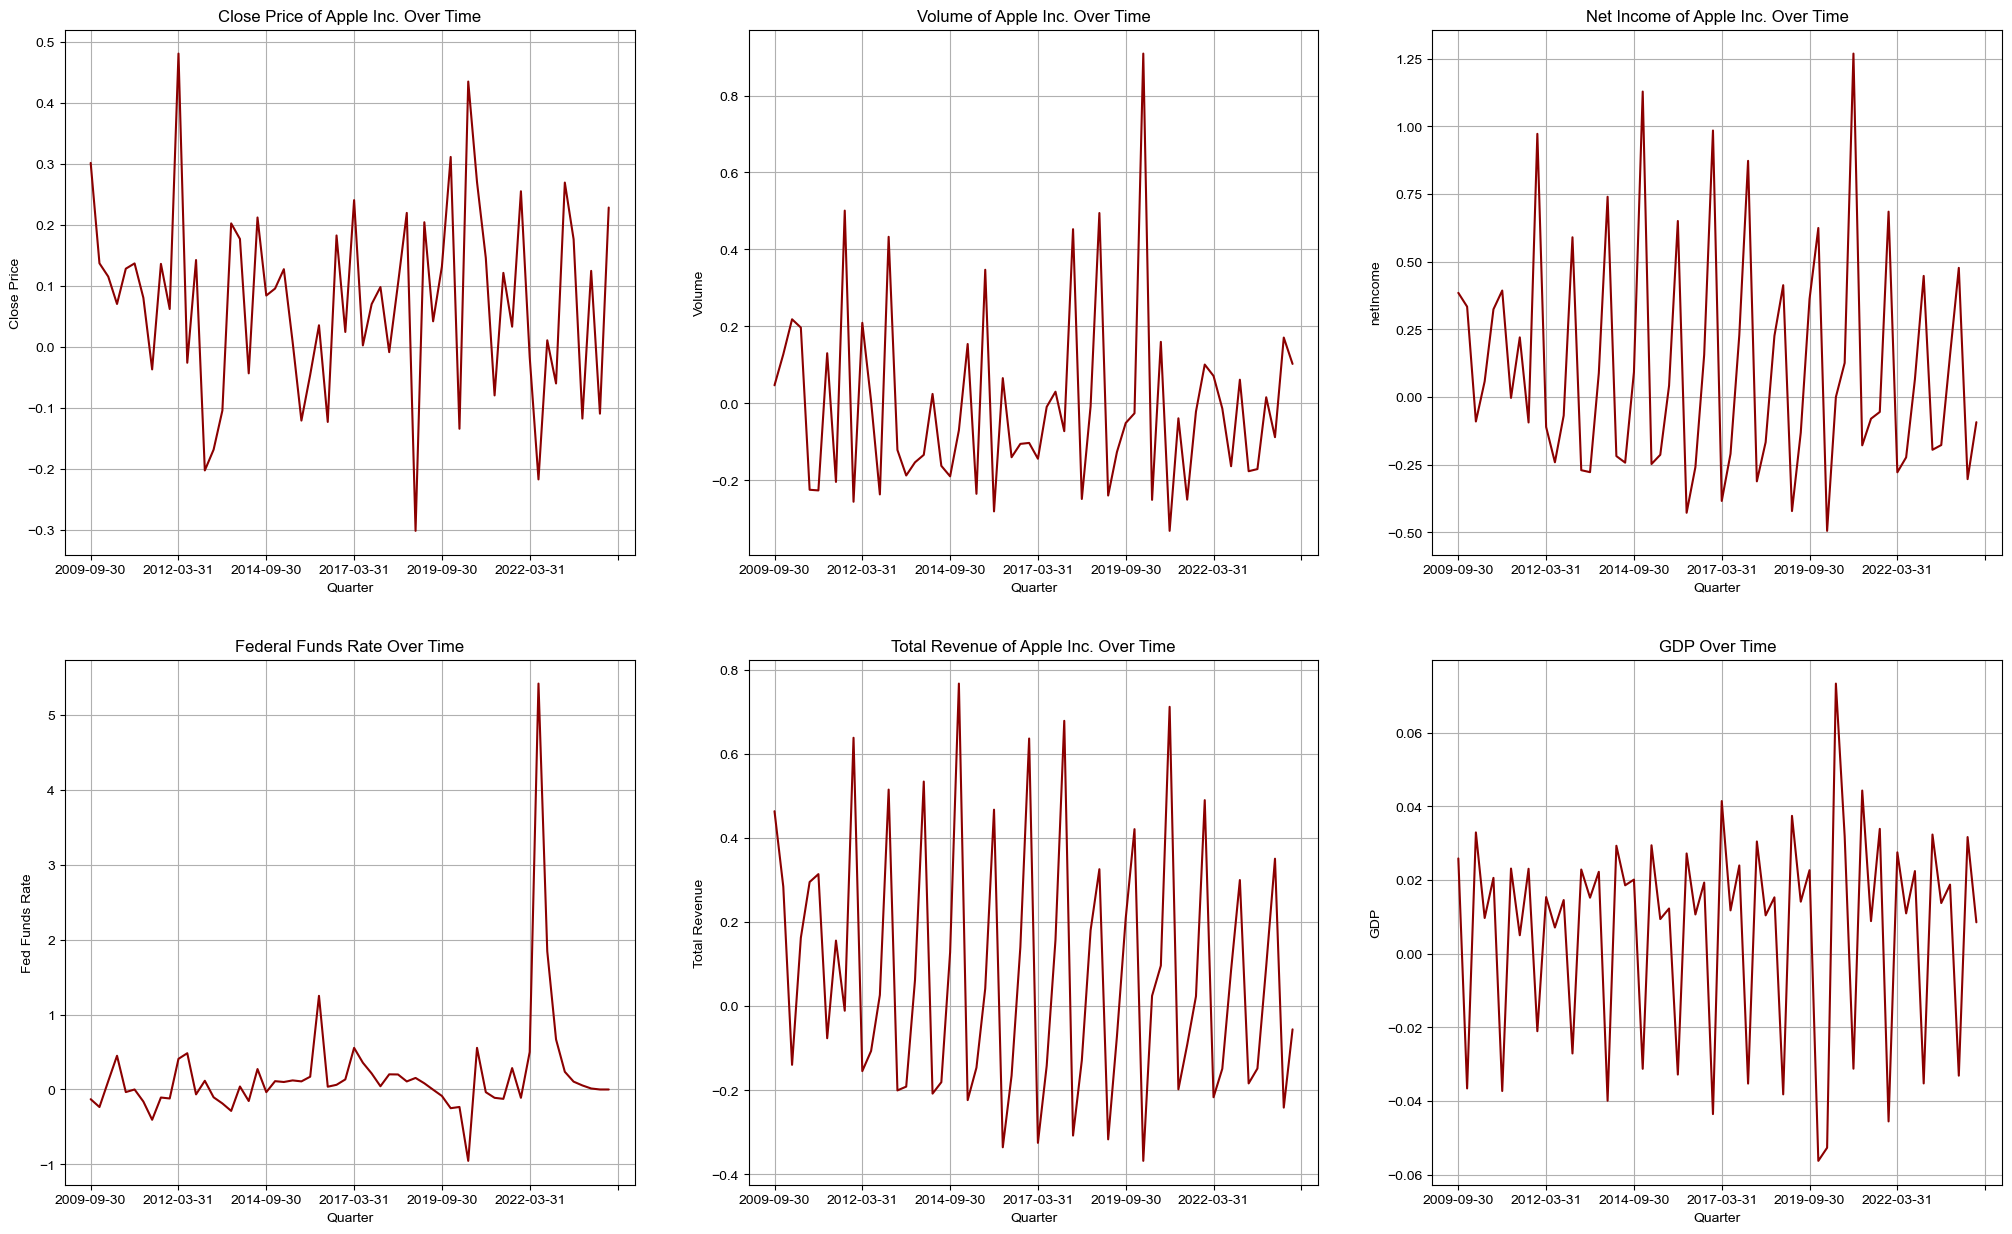

In [127]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
sns.set_style("whitegrid")

relative_df["change_in_Close_from_last_Q"].plot(ax=axes[0, 0], color="darkred")
axes[0, 0].set_title("Close Price of Apple Inc. Over Time", color='black')
axes[0, 0].set_ylabel("Close Price", color='black')
axes[0, 0].set_xlabel("Quarter", color='black')

relative_df["change_in_Volume_from_last_Q"].plot(ax=axes[0, 1], color="darkred")
axes[0, 1].set_title("Volume of Apple Inc. Over Time", color='black')
axes[0, 1].set_ylabel("Volume", color='black')
axes[0, 1].set_xlabel("Quarter", color='black')

relative_df["change_in_netIncome_from_last_Q"].plot(ax=axes[0, 2], color="darkred")
axes[0, 2].set_title("Net Income of Apple Inc. Over Time", color='black')
axes[0, 2].set_ylabel("netIncome", color='black')
axes[0, 2].set_xlabel("Quarter", color='black')

relative_df["change_in_Fed_Funds_Rate_from_last_Q"].plot(ax=axes[1, 0], color="darkred")
axes[1, 0].set_title("Federal Funds Rate Over Time", color='black')
axes[1, 0].set_ylabel("Fed Funds Rate", color='black')
axes[1, 0].set_xlabel("Quarter", color='black')

relative_df["change_in_totalRevenue_from_last_Q"].plot(ax=axes[1, 1], color="darkred")
axes[1, 1].set_title("Total Revenue of Apple Inc. Over Time", color='black')
axes[1, 1].set_ylabel("Total Revenue", color='black')
axes[1, 1].set_xlabel("Quarter", color='black')

relative_df["change_in_GDP_from_last_Q"].plot(ax=axes[1, 2], color="darkred")
axes[1, 2].set_title("GDP Over Time", color='black')
axes[1, 2].set_ylabel("GDP", color='black')
axes[1, 2].set_xlabel("Quarter", color='black')

plt.show()

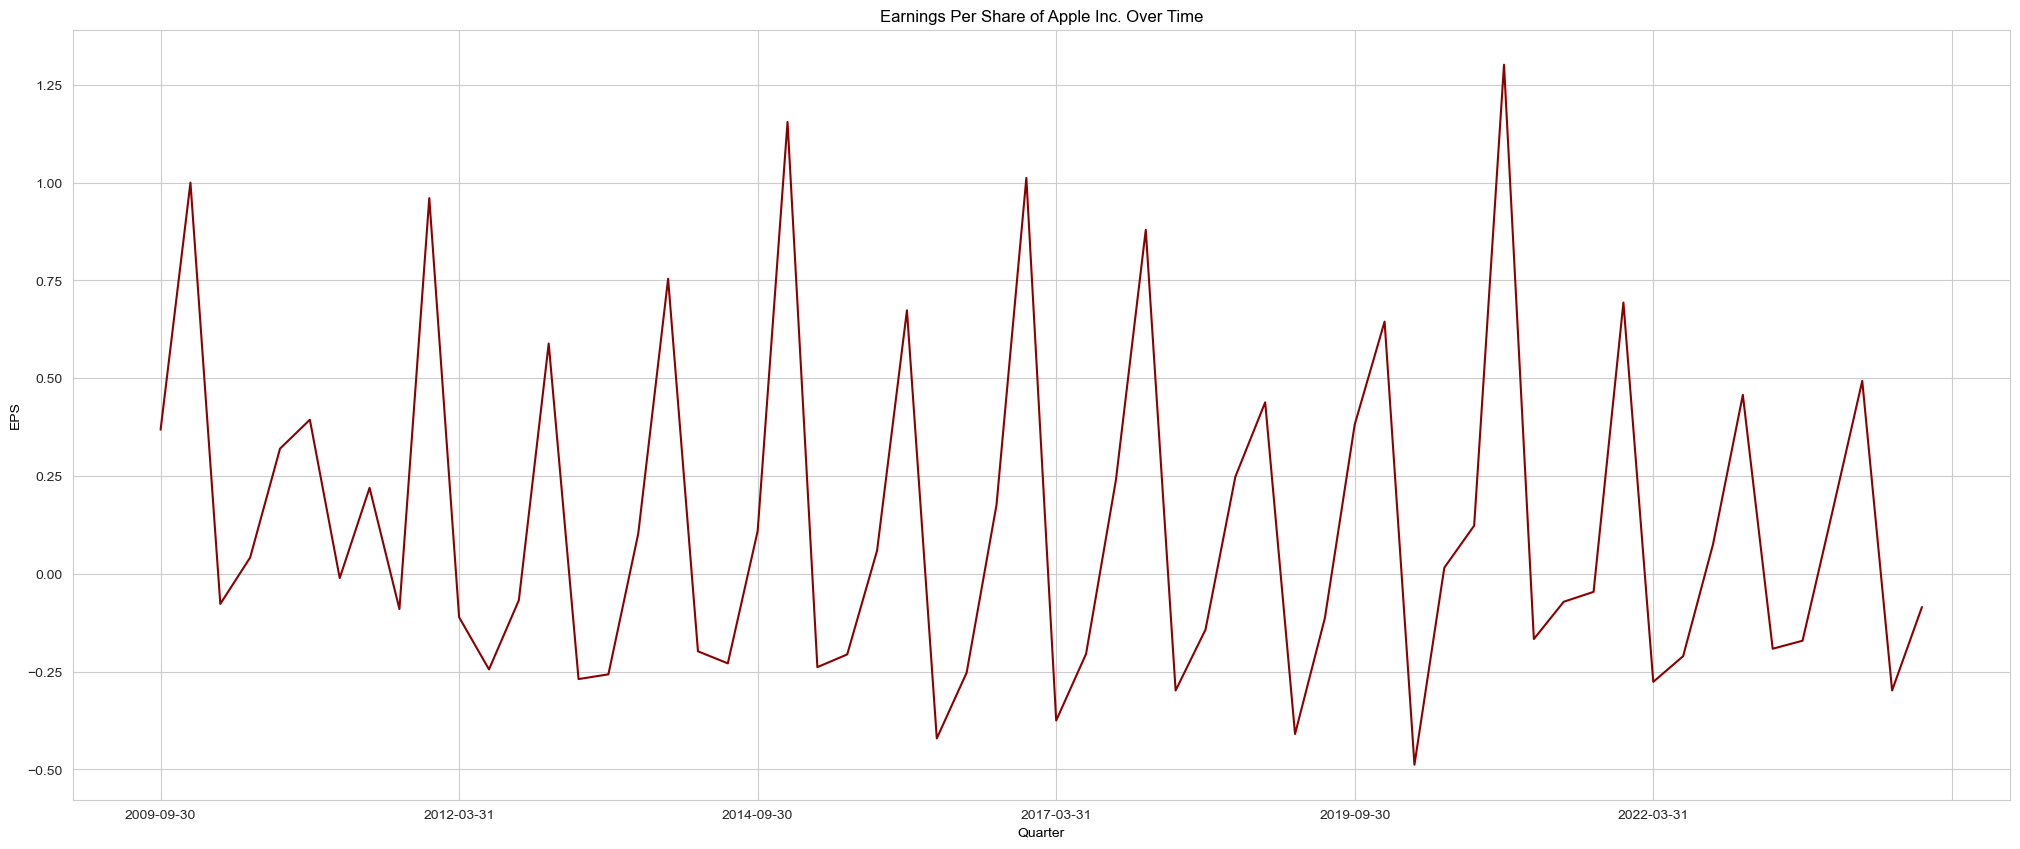

In [128]:
# EPS over time

fig, ax = plt.subplots(figsize=(25, 10))
relative_df["change_in_reportedEPS_from_last_Q"].plot(ax=ax, color="darkred")
ax.set_title("Earnings Per Share of Apple Inc. Over Time", color='black')
ax.set_ylabel("EPS", color='black')
ax.set_xlabel("Quarter", color='black')

plt.show()

Obersevations from the plots:

* The Relative change for EPS, Revenue, and Net Income of Apple Inc over time shows a quite distinct pattern. All three variables show that the peak (increase in relative change from the last quarter) in the second quarter and decrease until the last quarter until they finally reach the peak again in the second quarter.
* There is also a clear pattern in the relative change for GDP over time: It peaks for the first quarter, then decreases for the second quarter, and then increases again for the third quarter, and finally decreases for the fourth quarter.
* There is no inherent pattern for relative change in volume and close price of Apple Inc. over time - and neither for the Federal Funds Rate.

We will now proceed to plot the distribution of each feature variable

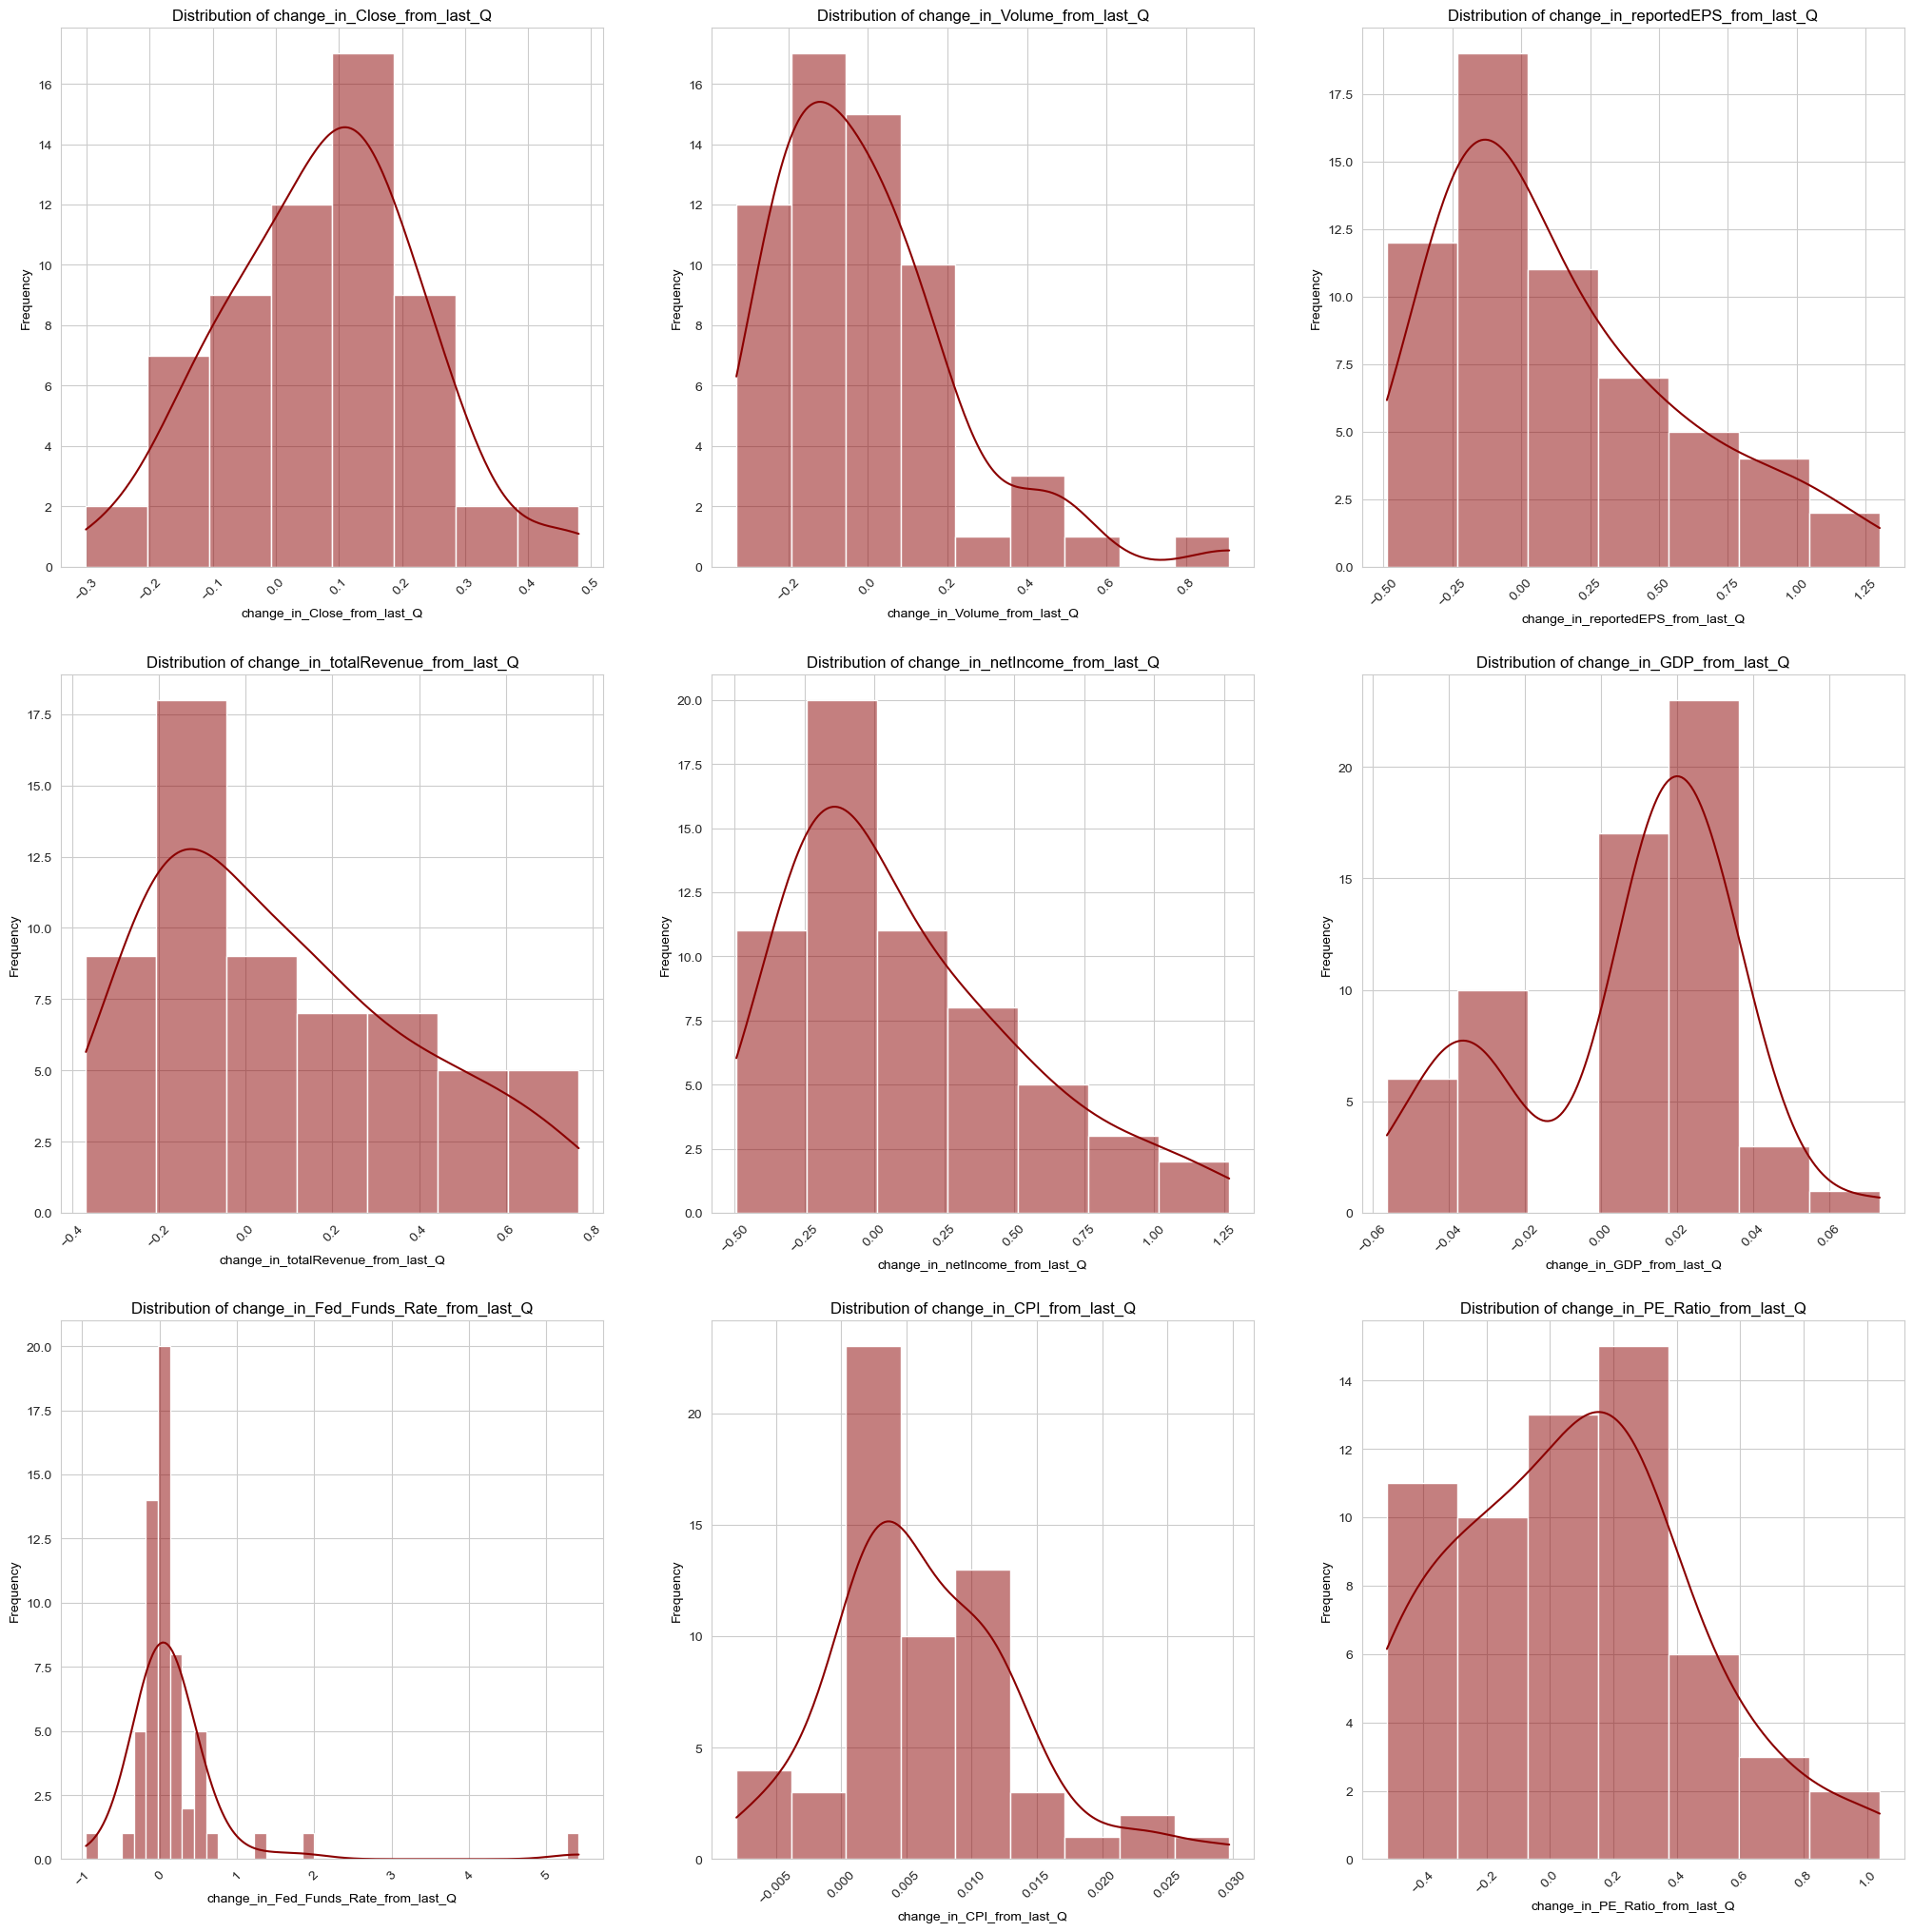

In [129]:
num_columns = len(relative_df.columns)-1 #
num_rows = math.ceil(num_columns / 3)
num_cols = min(3, num_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 25))

for index, column in enumerate([col for col in relative_df.columns]):
    row, col = divmod(index, num_cols)
    ax = axes[row, col]
    sns.histplot(relative_df[column], ax=ax, kde=True, color="darkred")
    ax.set_title("Distribution of " + column, color='black')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column, color='black')
    ax.set_ylabel('Frequency', color='black')

plt.show()

The plots above, concerning the distribution of the features, show that the many features, like Distribution of relative_Dividend_payout_change_from_last_quarter, are not normally distributed - while some are like relative_Close_change_for_next_quarter.  

Also, the plots show that many features are right skewed, which can have impact on the linear regression model because there might be non linearity in the data.

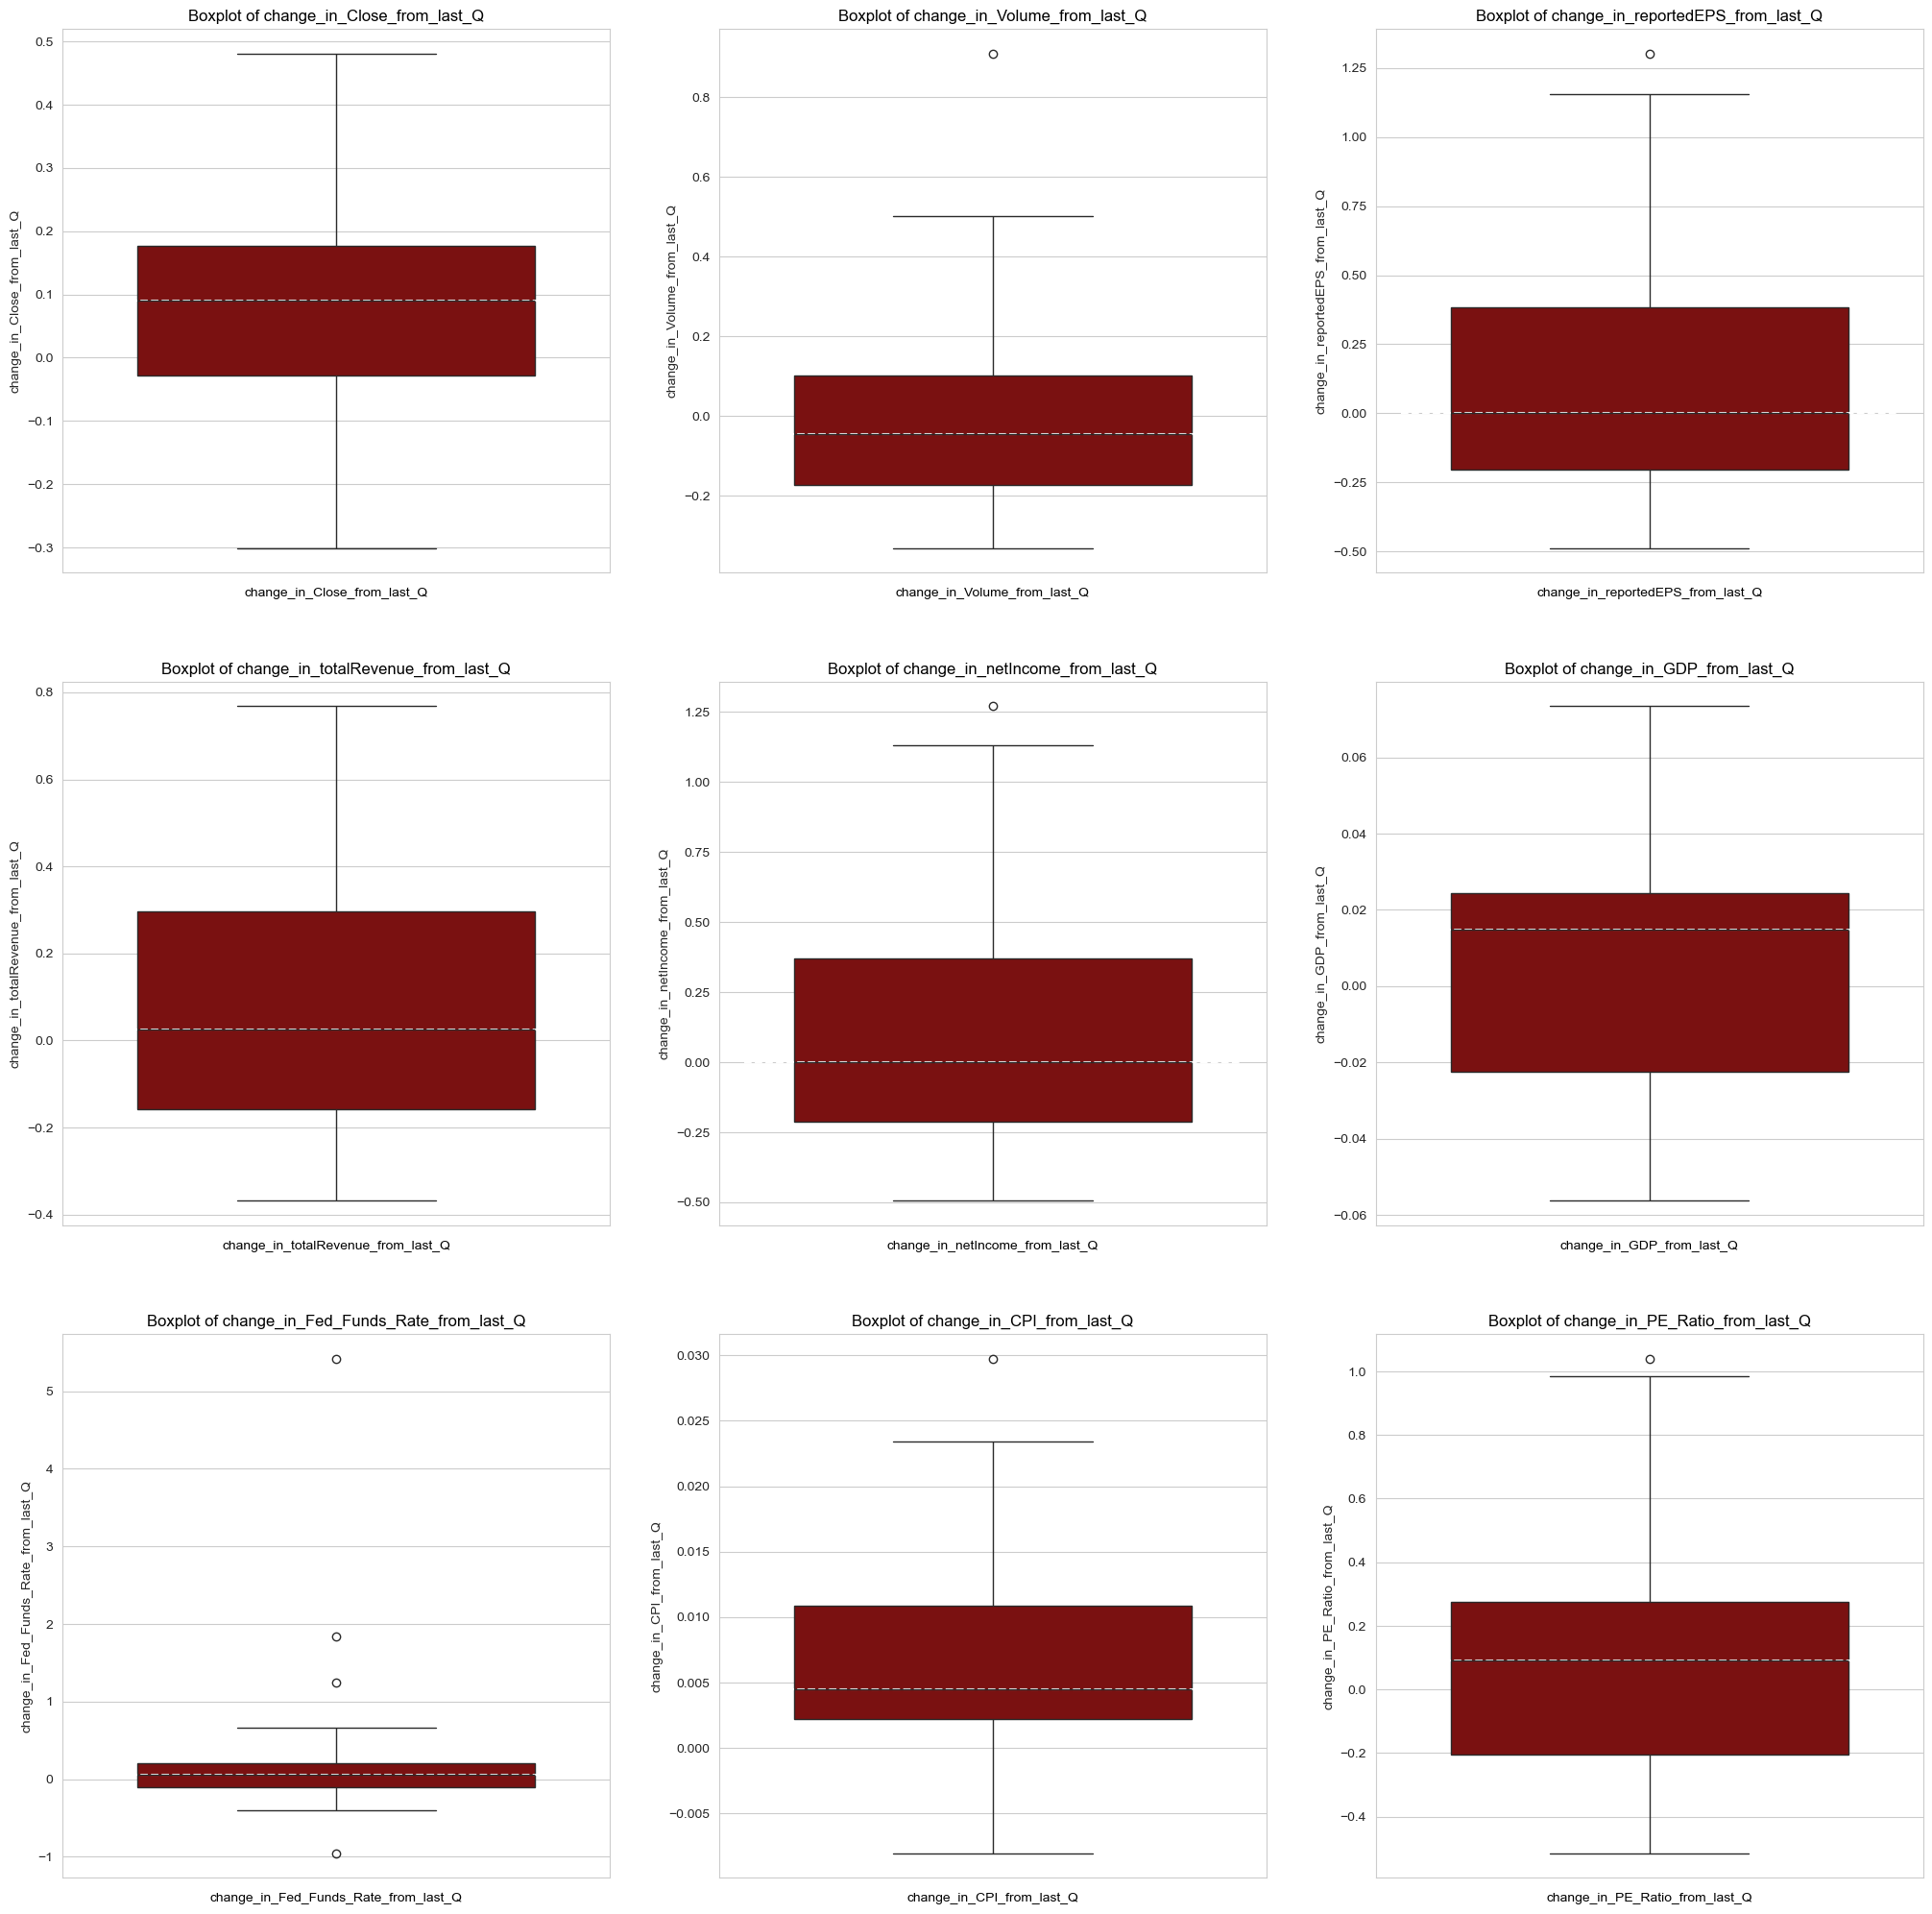

In [130]:
num_columns = len([col for col in relative_df.columns])
num_rows = math.ceil(num_columns / 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 25))

for index, column in enumerate([col for col in relative_df.columns]):
    row, col = divmod(index, 3)
    ax = axes[row, col]
    sns.boxplot(relative_df[column], ax=ax, color="darkred")
    ax.set_title("Boxplot of " + column, color='black')
    ax.hlines(relative_df[column].median(), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='white', linestyles='--')
    ax.set_xlabel(column, color='black')

plt.show()

Very few of our columns have outliers. We will not remove them because they are valid data points given this is financial data and from domain knowledge, we know that interest rate, GDP, and for example, the stock price have been increasing over the years. The box plot above also helps us learn the spread of the each feature!

Now we will plot the correlation matrix of the `relative_df` focusing only on `change_in_Close_from_last_Q`.

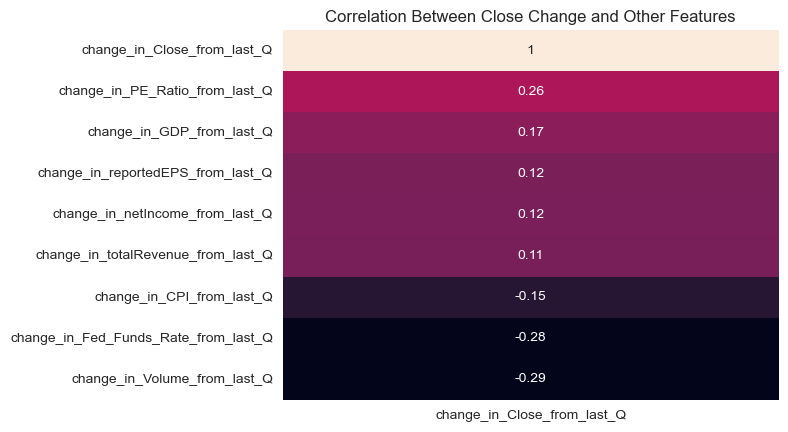

In [131]:
plt.figure()
data = relative_df.corr()[["change_in_Close_from_last_Q"]].sort_values(by="change_in_Close_from_last_Q", ascending=False)
sns.heatmap(data, annot=True, cbar=False)
plt.title("Correlation Between Close Change and Other Features");

The plot above matches with the previous plots. There is no strong correlation between the change in the closing price and other features. As expected, however, variables such as change in PE_Ratio from last Q, change in gdp from last quarter, change in net income from last quarter, and change in total revenue from last quarter, and EPS have the positive correlation with the change in the closing price from the last quarter.

We can finally move on to defining our target variable. We will use the relative_change_in_close_next_quarter column as an intermediary column and depending on the sign of this variable, we will define the column Buy (the target variable). If the relative_change_in_close_next_quarter is positive, we will assign the value 1 to the Buy column, otherwise 0.

In [57]:
# we will now create a new column, named as relative change in close price next quarter, which we will use to classify the data, if the relative change in close price next quarter is positive, we will assign 1, otherwise 0. Equivalently, 1 will corresponf to a Buy signal and 0 will correspond to a Not Buy signal.
relative_df["change_in_Close_next_Q"] = relative_df["change_in_Close_from_last_Q"].shift(-1)
relative_df["Buy"] = np.where(relative_df["change_in_Close_next_Q"] > 0, 1, 0)
relative_df.dropna(inplace = True)

relative_df.drop(columns = ["change_in_Close_next_Q"], inplace = True)

It is also extremely crucial and important to see how do the predictor variables relate to the target variable using correlation matrix for example.

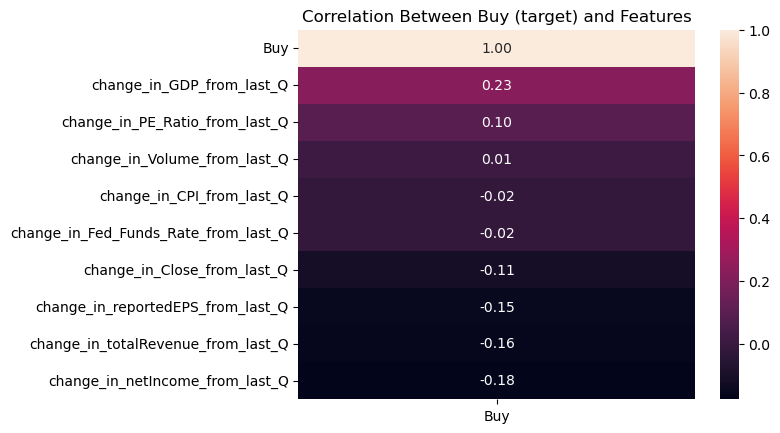

In [419]:
# Correlation matrix
correlation = relative_df.corr()[["Buy"]].sort_values(by="Buy", ascending=False)
plt.figure()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Between Buy (target) and Features", color='black')
plt.show()

The buy column (our target), being a transformation of Close, may not have the similar correlation with the predictors as the Close column (previously analyzed). This is because the buy column is a transformation of the Close column in somewhat convolved way (relative changes).


Buy is defined as: <br><br>
$$
  \text{Buy} = 1 \text{ if } \text{Relative Change in Close next Quarter} > 0, \text{ otherwise } 0
$$
  where:
$$
  \text{Relative Change in Close next Quarter} = \frac{\text{Close}_{t+1} - \text{Close}_t}{\text{Close}_t}
$$

This means the **Buy** signal depends on whether the closing price increases (positive relative change) or decreases (negative relative change) in the next quarter. This also transforms then the relationships (talking about correlations) between predictor variables and Buy variable. However, the relationships are transformed in somewhat unintuitive way:

The plot of correlation matrix between the features of the relative_df for the *Buy column only*, for example, reveals that we should buy if, say, the relative change in net income decreases next quarter. Though unintuitive, I would emphasize that the Buy variable is the transformation of Close and depends not just on Close, but rather relative change in close from last quarter, next quarter and finally is assigned 1 if Relative Change in Close next quarter is positive!

This lead to rather extremely surprising relationships. For example, there is a negative relationship between the **Buy Column (target variable)** and **change_in_Close_from_last_Q** or **change_in_Revenue_from_last_Q**. 

One more remark: *change_in_Volume_from_last_Q, change_in_Fed_Funds_Rate_from_last_Q, and change_in_CPI_from_last_Q columns* have very close to 0 correlation between the target variable. This can be a sign that the model might not be able to predict the target variable well or may not make good use of these columns.

### Normalization 

We saw from the EDA section that many of our variables resembles a bell shape to some extent (normal distribution). Also, all of them, being relative changes, are in a range of -1 to 1, expcept Fed Funds Rate which has a higher relative change in the last quarters as can be seen from the plot below. 

For this reason, we will use StandardScaler from the Scikit-Learn libary for the standardization of the data.

<Axes: xlabel='timestamp'>

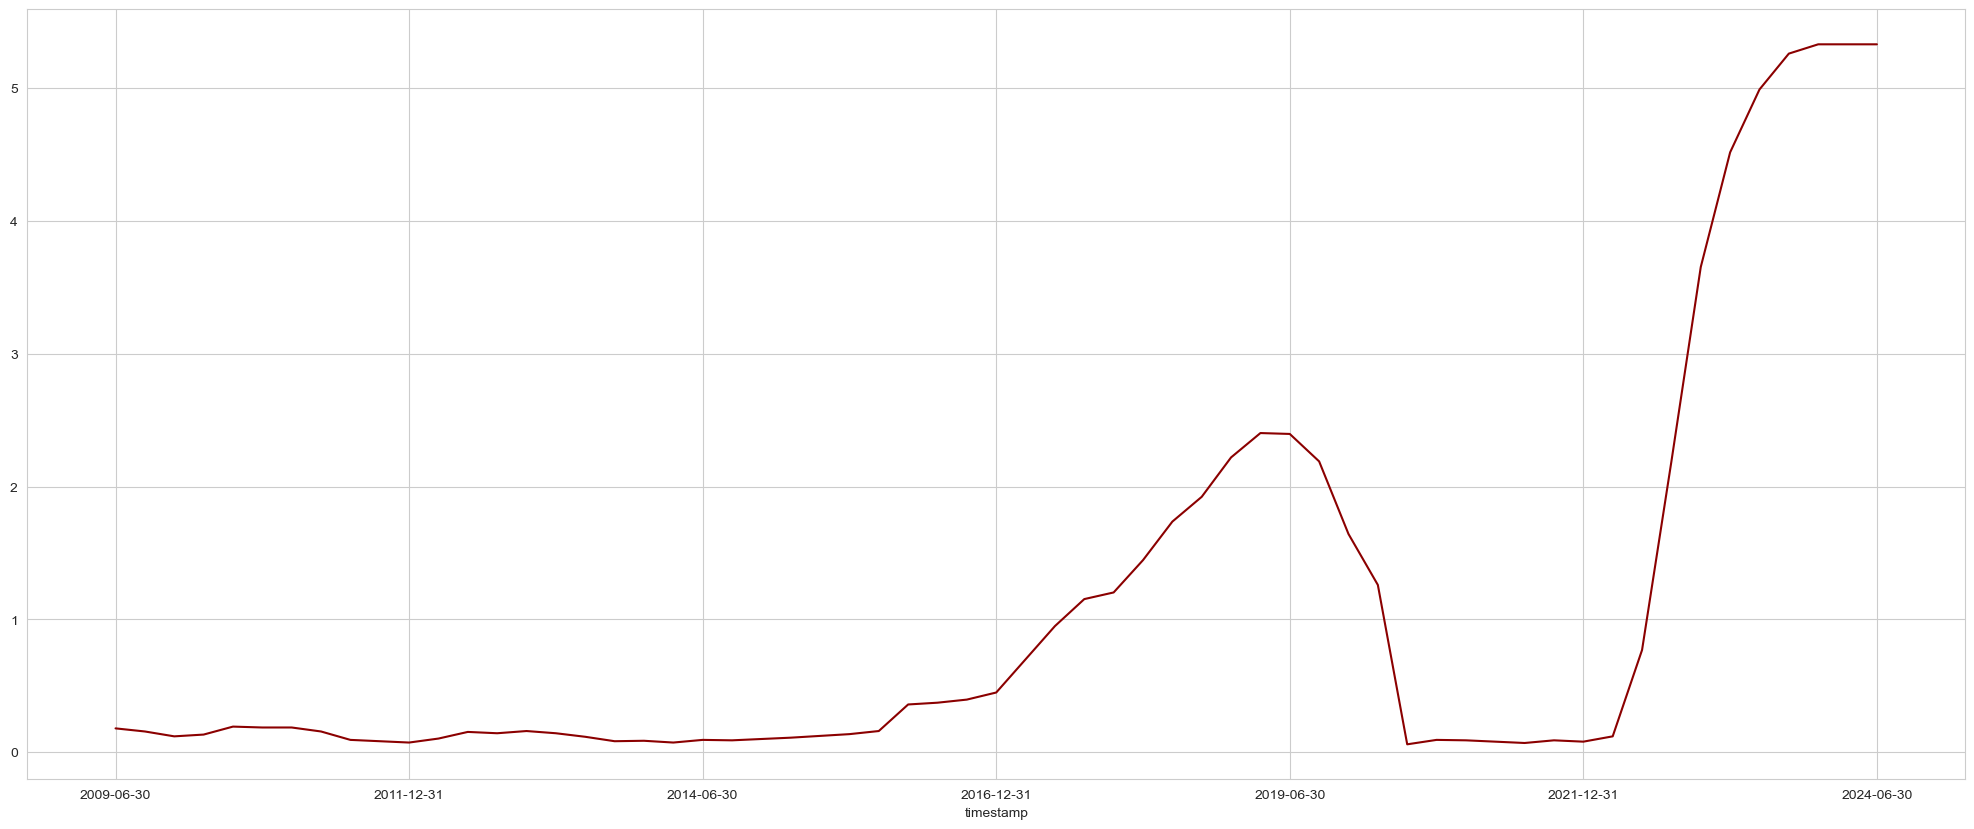

In [134]:
economic_df["Fed_Funds_Rate"].plot(figsize=(25, 10), color="darkred")

In [58]:
scaler = StandardScaler()
cols = [col for col in relative_df.columns if col != "Buy"]
relative_df[cols] = scaler.fit_transform(relative_df[cols])

---
###  Modelling Section.

# Random Walk Model - now with modified dataset!

In [112]:
np.random.seed(0)
rel_df = (apple_df - apple_df.shift()) / apple_df.shift()
rel_df.dropna(inplace=True)
rel_df.columns = [f"change_in_{col}_from_last_Q" for col in rel_df.columns]

rel_df["change_in_Close_next_Q"] = rel_df["change_in_Close_from_last_Q"].shift(-1)
rel_df.dropna(inplace=True)
display(rel_df.head(3))


# Make a copy of the dataframe for the random walk model
apple_walk = rel_df.copy()
apple_walk["change_in_Close_next_Q_prediction"] = apple_walk["change_in_Close_from_last_Q"] + np.random.normal(0, 4, len(apple_walk)) # 4% change error

change_in_Close_from_last_Q  change_in_Volume_from_last_Q  \
2009-09-30                     0.301341                      0.047004   
2009-12-31                     0.136930                      0.127449   
2010-03-31                     0.115171                      0.218506   

            change_in_reportedEPS_from_last_Q  \
2009-09-30                           0.368421   
2009-12-31                           1.000000   
2010-03-31                          -0.076923   

            change_in_totalRevenue_from_last_Q  \
2009-09-30                            0.464196   
2009-12-31                            0.284755   
2010-03-31                           -0.139259   

            change_in_netIncome_from_last_Q  change_in_GDP_from_last_Q  \
2009-09-30                         0.385120                   0.025887   
2009-12-31                         0.334123                  -0.036588   
2010-03-31                        -0.089994                   0.032957   

            change_in_Fed_Funds_Rate_from_last_Q  change_in_CPI_from_last_Q  \
2009-09-30                             -0.129630                   0.006791   
2009-12-31                             -0.234043                   0.002012   
2010-03-31                              0.111111                   0.004014   

            change_in_PE_Ratio_from_last_Q  change_in_Close_next_Q  
2009-09-30                       -0.049020                0.136930  
2009-12-31                       -0.431535                0.115171  
2010-03-31                        0.208102                0.070341

In [113]:
# Model follows the following structure: prediction = current change_in_Close_from_last_Q + random noise ~ N(0, 4)
actuals = apple_walk["change_in_Close_next_Q"].values
predictions = apple_walk["change_in_Close_next_Q_prediction"].values

# evaluate the model
rmse = root_mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Accuracy: if the actuals are positive and the predictions are positive,
# or if the actuals are negative and the predictions are negative, then the prediction is correct.
# Count the number of correct predictions
correct_predictions = np.sum(np.sign(apple_walk["change_in_Close_next_Q"].values) == np.sign(apple_walk["change_in_Close_next_Q_prediction"].values))
total_predictions = len(actuals)
accuracy = correct_predictions / total_predictions

# Print results
# print first 5 predictions
print(f"Predictions: {predictions[:5]}")
# print first 5 real values
print(f"Actuals: {actuals[:5]}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Predictions: [7.35755044 1.73755885 4.03012299 9.0339133  7.59832808]
Actuals: [0.13693002 0.11517105 0.07034051 0.12809612 0.1367753 ]
RMSE: 4.31
MAE: 3.41
R2: -801.32
Accuracy: 0.53


We get the same accuracy as before for the random walk model, of 53%!

---
# Logistic Regression with Feature Engineering!

In [59]:
log_reg_rel = relative_df.copy()

In [60]:
# define the features and target variable
X = log_reg_rel.drop(columns="Buy")
y = log_reg_rel["Buy"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [61]:
# Instantiate the model
model = LogisticRegression(random_state=0)

param_grid = {
    "C": C_values,
    "class_weight": [inverse_class_frequencies_dict, "balanced", None],
    "max_iter": [100, 200, 300],
    "solver": ["liblinear", "lbfgs"]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="Precision_Class_1",
    n_jobs=-1,
    verbose=1,
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                               0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                               0.9, 0.95, 1.01, 1.06, 1.11, 1.16, 1.21, 1.26,
                               1.31, 1.36, 1.41, 1.46, ...],
                         'class_weight': [{0: 3.3333333333333335,
                                           1: 1.4285714285714286},
                                          'balanced', None],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             refit='Precision_Class_1',
             scoring={'Precision_Class_1': make_scorer(precision_score, response_method='predict', pos_label=1, average=binary, zero_division=0),
                      'Recall_Class_1': make_scorer(recall_score, response_method='predict', pos_label=1, average=binary)},
             verbose=1)

In [62]:
# print the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'solver': 'liblinear'}


We see that the combination of tuned hyper parameters grid search gave us, which maximise the precision and recall for class 1 on the validation set (as defined by cv) has C value of 0.01. Small C, espcially this small, means that regularization is strong. However, since we have very few features and we don't want extreme regularization, we will choose C to be 0.5 (default is 1) and keep the rest parameters suggested by the gridsearch.

Accuracy on training set: 0.72
Classification report on training set:
              precision    recall  f1-score   support

           0       0.60      0.21      0.32        14
           1       0.74      0.94      0.83        33

    accuracy                           0.72        47
   macro avg       0.67      0.58      0.57        47
weighted avg       0.70      0.72      0.67        47



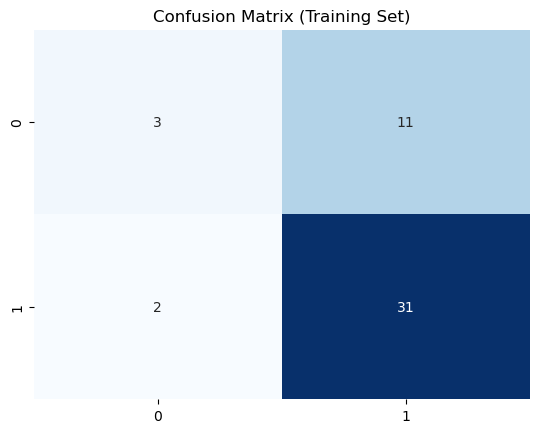

In [63]:
# print the accuracy score, the precision score, and the recall score on the training set
model = LogisticRegression(C=0.5, class_weight=None, max_iter=100, solver="liblinear", random_state=0)

model.fit(X_train, y_train)

accuracy_train = model.score(X_train, y_train)
y_pred_train = model.predict(X_train)

classification_report_train = classification_report(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Classification report on training set:\n{classification_report_train}")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure()
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Training Set)");

We see that the model has an accuracy of 0.72 on the training set. The precision and recall for class `1` (Buy) are 0.74 and 0.94 respectively. The scores, at least on the train set, are really good. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model.

Let's put the trained model on the testing set!

Accuracy on test set: 0.75
Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.73      1.00      0.84         8

    accuracy                           0.75        12
   macro avg       0.86      0.62      0.62        12
weighted avg       0.82      0.75      0.69        12



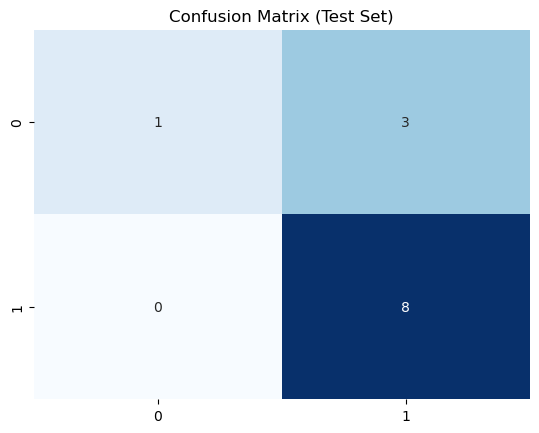

In [64]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification report on test set:\n{classification_report_test}")

# Confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)");

On the test set, the model performs better than the training set in terms of accuracy. The accuracy is 0.75. However, as we care more about the precision and recall for class 1, we can see that the precision is 73% on the test set and the recall is 100%. This means that the model correctly predicts stock increases 73% of the time. More importantly, it makes 27% error of making us buy when we should not. The model correctly identifies 100% (recall) of the quarters where the stock price increased as quarters where the stock price increased.

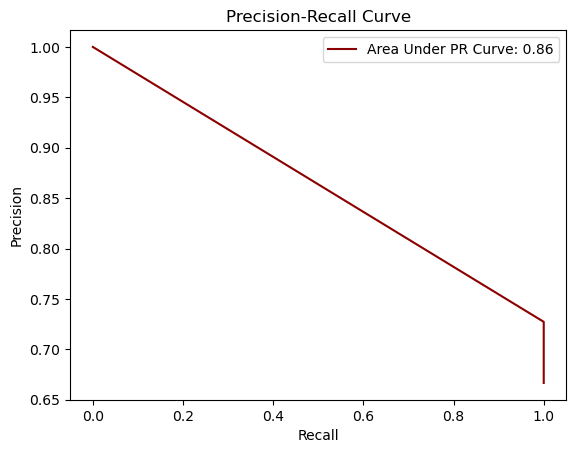

Area Under PR Curve: 0.86


In [65]:
# pr curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color="darkred", label=f"Area Under PR Curve: {auc_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print(f"Area Under PR Curve: {auc_score:.2f}")


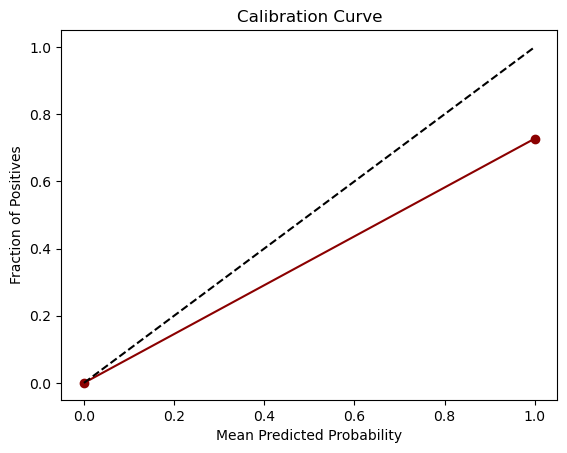

In [67]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

The model seems relatively (relative to other models we have encountered so far) strongly calibrated!

# Linear Regression (with Regularization) - Feature Engineering

In [65]:
apple_linear_reg = relative_df.copy()

In [66]:
apple_linear_reg.drop(columns = ["Buy"], inplace = True)

For the Linear Regression modelling part, we will set `change_in_Close_next_Q` column as the target variable. We will try to predict the change in the closing price of the next quarter using the other features. We will define accuracy and other scoring metrics based on the sign of the predictions.

In [67]:
apple_linear_reg["change_in_Close_next_Q"] = relative_df["change_in_Close_from_last_Q"].shift(-1)
apple_linear_reg.dropna(inplace = True)

apple_linear_reg.head()

change_in_Close_from_last_Q  change_in_Volume_from_last_Q  \
2009-09-30                     1.487156                      0.240379   
2009-12-31                     0.417872                      0.586142   
2010-03-31                     0.276357                      0.977517   
2010-06-30                    -0.015205                      0.885189   
2010-09-30                     0.360418                     -0.926391   

            change_in_reportedEPS_from_last_Q  \
2009-09-30                           0.539252   
2009-12-31                           1.996726   
2010-03-31                          -0.488453   
2010-06-30                          -0.214787   
2010-09-30                           0.427513   

            change_in_totalRevenue_from_last_Q  \
2009-09-30                            1.274805   
2009-12-31                            0.677867   
2010-03-31                           -0.732682   
2010-06-30                            0.272993   
2010-09-30                            0.714384   

            change_in_netIncome_from_last_Q  change_in_GDP_from_last_Q  \
2009-09-30                         0.649412                   0.673730   
2009-12-31                         0.527050                  -1.481548   
2010-03-31                        -0.490574                   0.917632   
2010-06-30                        -0.134926                   0.115928   
2010-09-30                         0.503519                   0.491648   

            change_in_Fed_Funds_Rate_from_last_Q  change_in_CPI_from_last_Q  \
2009-09-30                             -0.418108                   0.066513   
2009-12-31                             -0.551605                  -0.614434   
2010-03-31                             -0.110310                  -0.329174   
2010-06-30                              0.322975                  -0.224161   
2010-09-30                             -0.296458                  -0.768177   

            change_in_PE_Ratio_from_last_Q  change_in_Close_next_Q  
2009-09-30                       -0.312876                0.417872  
2009-12-31                       -1.333936                0.276357  
2010-03-31                        0.373469               -0.015205  
2010-06-30                       -0.108546                0.360418  
2010-09-30                       -0.570098                0.416864

Before moving on to modelling, let's perform some EDA on the data.

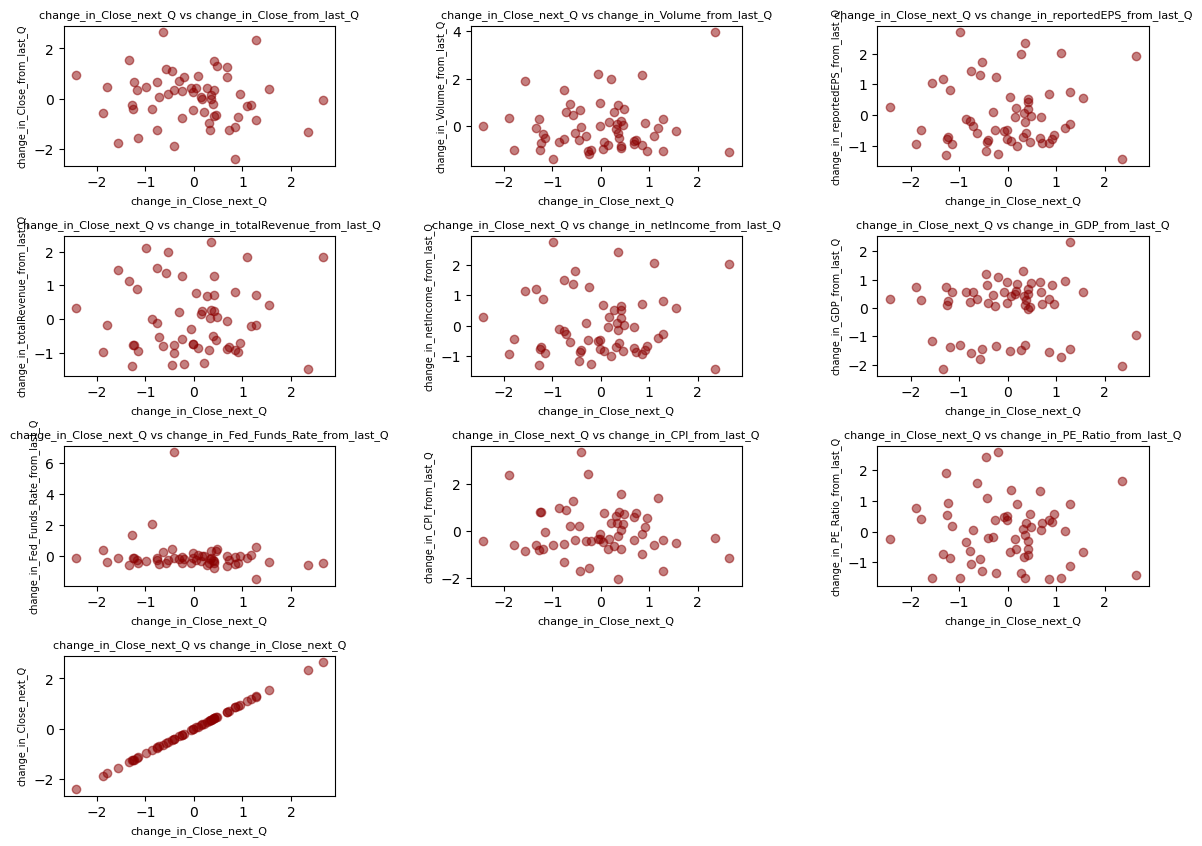

In [458]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(apple_linear_reg.columns):
    plt.subplot(4, 3, i+1)
    plt.scatter(apple_linear_reg["change_in_Close_next_Q"], apple_linear_reg[col], alpha=0.5, color='darkred')
    # add space between the subplots
    plt.subplots_adjust(hspace=.5, wspace=.5)
    plt.xlabel("change_in_Close_next_Q", fontsize=8)
    plt.ylabel(col, fontsize=7)
    plt.title(f"change_in_Close_next_Q vs {col}", fontsize=8)
plt.show();

The plot, like in the section for modelling of Logistic Regression, shows that there is no strong positive or negative relationship between change_in_Close_next_Q (our target variable) and the other features. Meaning, a positive change in the closing price of the stock next quarter does not necessarily mean a positive change in the other features and vice versa. 

Now we will plot the correlation matrix of the `apple_linear_reg` focusing only on `change_in_Close_next_Q`.

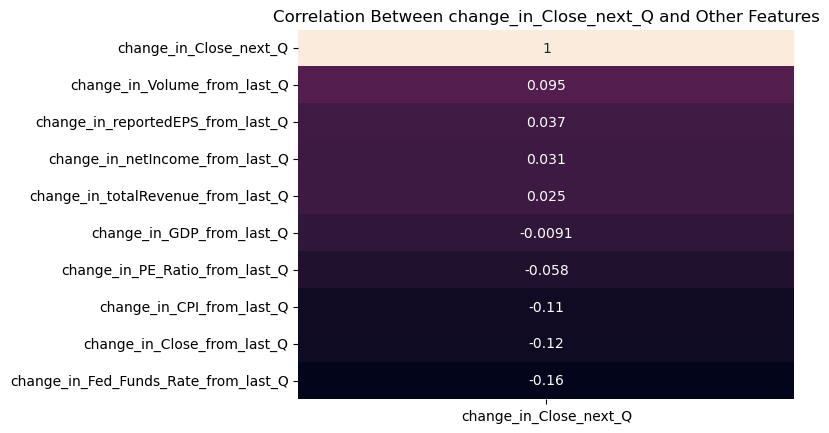

In [459]:
plt.figure()
data = apple_linear_reg.corr()[["change_in_Close_next_Q"]].sort_values(by="change_in_Close_next_Q", ascending=False)
sns.heatmap(data, annot=True, cbar=False)
plt.title("Correlation Between change_in_Close_next_Q and Other Features");

The plot above matches with the previous plot. There is no strong correlation between the change in the closing price next quarter and other features. As can be analysed from the plot above, many of our values have almost 0 correlation. Following the correlation does not imply independence mantra, we are not saying that the variables are independent or that correlation implies causation, but the plot of correlations just give a naive understanding of the relationships. 

In [68]:
X = apple_linear_reg.drop(columns="change_in_Close_next_Q")
y = apple_linear_reg["change_in_Close_next_Q"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True)

Previously, we used grid search for logistic regression and passed on scoring dictionary, containing precision and recall metrics, for the model to be evaluated on so that the best hyperparameters can be selected based on these metrics.


However, for linear regression, we can not make such dictionary because linear regression is not a classification model. Now because we can not fine tune our model using the same method as before, we will use the regular linear regression, and then Ridge reression and see how they perform.

MAE on training set: 0.71
R2 on training set: 0.26
Training Accuracy: 0.70
              precision    recall  f1-score   support

        -1.0       0.66      0.83      0.73        23
         1.0       0.76      0.57      0.65        23

    accuracy                           0.70        46
   macro avg       0.71      0.70      0.69        46
weighted avg       0.71      0.70      0.69        46



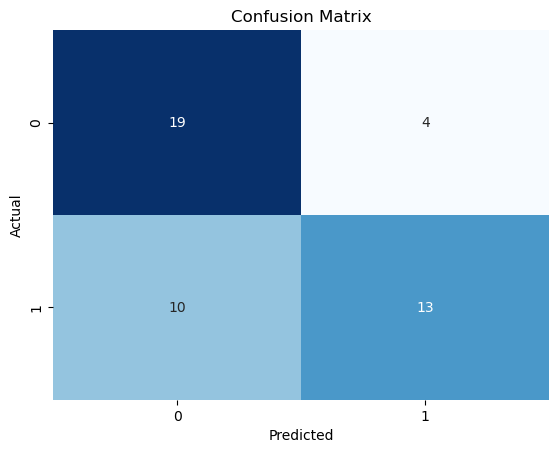

In [69]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print MAE, and R2 on the training set
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE on training set: {mae_train:.2f}")
print(f"R2 on training set: {r2_train:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_train) == np.sign(y_pred_train))
total_predictions = len(y_train)
accuracy = correct_predictions / total_predictions
print(f"Training Accuracy: {accuracy:.2f}")

report = classification_report(np.sign(y_train), np.sign(y_pred_train))
# print the classification report
print(classification_report(np.sign(y_train), np.sign(y_pred_train)))

plt.figure()
sns.heatmap(confusion_matrix(np.sign(y_train), np.sign(y_pred_train)), annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

MAE on training set: 0.70
R2 on training set: 0.25
Training Accuracy: 0.70
              precision    recall  f1-score   support

        -1.0       0.66      0.83      0.73        23
         1.0       0.76      0.57      0.65        23

    accuracy                           0.70        46
   macro avg       0.71      0.70      0.69        46
weighted avg       0.71      0.70      0.69        46



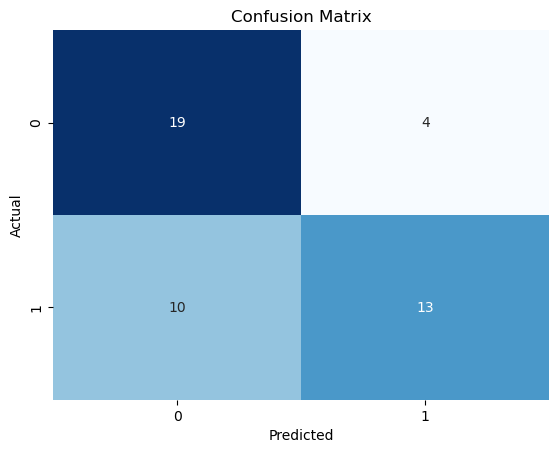

In [70]:
# Now, using the Ridge regression model - a linear regression model with L2 regularization
# Default alpha value is 1.0 - meaning the regularization strength is 1.0. the equation becomes:
# Loss = OLS Loss + alpha * (sum of square of coefficients)
# The higher the alpha, the stronger the regularization.

model = Ridge()

# Fit the model
model.fit(X_train, y_train)

# Print MAE, and R2 on the training set
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE on training set: {mae_train:.2f}")
print(f"R2 on training set: {r2_train:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_train) == np.sign(y_pred_train))
total_predictions = len(y_train)
accuracy = correct_predictions / total_predictions
print(f"Training Accuracy: {accuracy:.2f}")

report = classification_report(np.sign(y_train), np.sign(y_pred_train))
# print the classification report
print(classification_report(np.sign(y_train), np.sign(y_pred_train)))

plt.figure()
sns.heatmap(confusion_matrix(np.sign(y_train), np.sign(y_pred_train)), annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

No matter we use Ridge Regression or standard Linear Regression, we get the same results on the training set. We will move on to use Ridge Regression to benefit of Regularization, tune the hyperparameters and see what we get on the test result.

In [71]:
model = Ridge()

param_grid = {
    "alpha" : C_values
}

# Instantiate the GridSearchCV object with scoring as mean absolute error
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                   0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75,
                                   0.8, 0.85, 0.9, 0.95, 1.01, 1.06, 1.11, 1.16,
                                   1.21, 1.26, 1.31, 1.36, 1.41, 1.46, ...]},
             scoring='neg_mean_absolute_error', verbose=1)

In [72]:
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'alpha': 10.0}


The value we got for the hyperparameter is too strong. In GridSearchCV, we defined scoring to be Negative MAE to aim for minimum MAE. However, this would not necessarily translate into the desired precision or recall scoring. This is because we can not utilitize, when dealing with Linear or Ridge Regression, scoring metrics like Recall or Precision in GridSearchCV directly - though we (as in the previous case too) transformed the results to match signs of the predictions and then applied metrics on it. Now if we proceed with alpha value given by GridSearch, we will almost certainly not get desired output. 

MAE on training set: 1.04
R2 on training set: -1.82
Testing Accuracy: 0.33
              precision    recall  f1-score   support

        -1.0       0.33      0.60      0.43         5
         1.0       0.33      0.14      0.20         7

    accuracy                           0.33        12
   macro avg       0.33      0.37      0.31        12
weighted avg       0.33      0.33      0.30        12



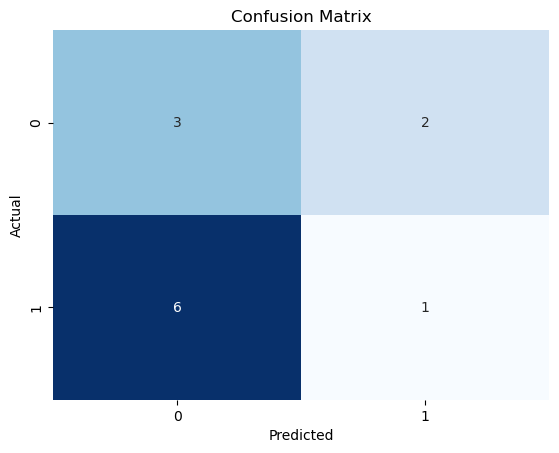

In [73]:
# Standard linear regression works better than Ridge regression for this dataset. Let's now evaluate on the test set.

# Predict on the test set
model = Ridge(alpha=10)

# Fit the model
model.fit(X_train, y_train)

# Print MAE, and R2 on the training set
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MAE on training set: {MAE:.2f}")
print(f"R2 on training set: {R2:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_test) == np.sign(y_pred))
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print(f"Testing Accuracy: {accuracy:.2f}")

report = classification_report(np.sign(y_test), np.sign(y_pred))
# print the classification report
print(classification_report(np.sign(y_test), np.sign(y_pred)))

plt.figure()
sns.heatmap(confusion_matrix(np.sign(y_test), np.sign(y_pred)), annot = True, fmt = 'd', cbar = False, cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

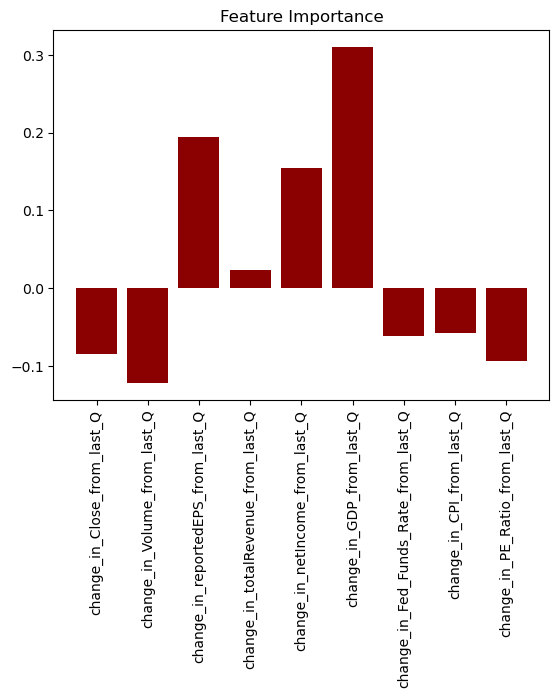

In [472]:
# plot models coefficients
plt.figure()
plt.bar(X_train.columns, model.coef_, color='darkred')
plt.xticks(rotation=90, fontsize=10)
plt.title("Feature Importance")
plt.show()

The output does not even need interpretation. Linear Regression failed miserably!

--- 

# Support Vector Machines - Feature Engineering

In [68]:
# Using the already prepared dataset from the logistic regression model
apple_svm = log_reg_rel.copy()

In [69]:
# From the EDA, we remember that our target class is imbalanced, so when instantiating the model, we will take this into account.
prop = apple_svm.Buy.value_counts(normalize=True)
print(f"Proportion of Buy: {prop[1]:.2f} and Hold: {prop[0]:.2f}")

Proportion of Buy: 0.69 and Hold: 0.31


In [70]:
X = apple_svm.drop(columns="Buy")
y = apple_svm["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [71]:
# Instantiate the model
model = SVC(random_state=0)

param_grid = {
    "C": C_values,
    "kernel": ["linear", "rbf", "poly"],
    "class_weight": [None, "balanced", inverse_class_frequencies_dict],
    "gamma": ["scale", "auto", 0.1, .5, 1, 2, 4, 5, 6, 10]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="Precision_Class_1",
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                               0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,
                               0.9, 0.95, 1.01, 1.06, 1.11, 1.16, 1.21, 1.26,
                               1.31, 1.36, 1.41, 1.46, ...],
                         'class_weight': [None, 'balanced',
                                          {0: 3.3333333333333335,
                                           1: 1.4285714285714286}],
                         'gamma': ['scale', 'auto', 0.1, 0.5, 1, 2, 4, 5, 6,
                                   10],
                         'kernel': ['linear', 'rbf', 'poly']},
             refit='Precision_Class_1',
             scoring={'Precision_Class_1': make_scorer(precision_score, response_method='predict', pos_label=1, average=binary, zero_division=0),
                      'Recall_Class_1': make_scorer(recall_score, response_method='predict', pos_label=1, average=binary)},
             verbose=1)

In [74]:
# print the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'C': 0.5, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly'}


Accuracy on training set: 0.79
Classification report on training set:
              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.79      0.94      0.86        33

    accuracy                           0.79        47
   macro avg       0.77      0.68      0.70        47
weighted avg       0.78      0.79      0.77        47



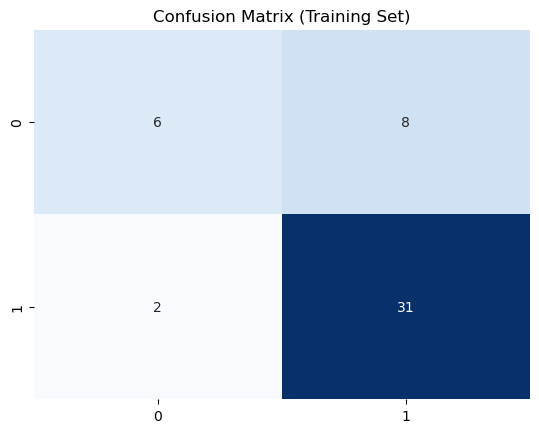

In [75]:
# print the accuracy score, the precision score, and the recall score on the training set
best_model = SVC(**best_params, random_state=0)

best_model.fit(X_train, y_train)

accuracy_train = best_model.score(X_train, y_train)
y_pred_train = best_model.predict(X_train)


classification_report_train = classification_report(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Classification report on training set:\n{classification_report_train}")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure()
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Training Set)");

We see that the model has an accuracy of 0.79 on the training set. The precision and recall for class `1` (Buy) are 0.79 and 0.94 respectively. The scores, at least on the train set, are really good. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model.

Let's put the trained model on the testing set!

Accuracy on test set: 0.75
Classification report on test set:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.78      0.88      0.82         8

    accuracy                           0.75        12
   macro avg       0.72      0.69      0.70        12
weighted avg       0.74      0.75      0.74        12



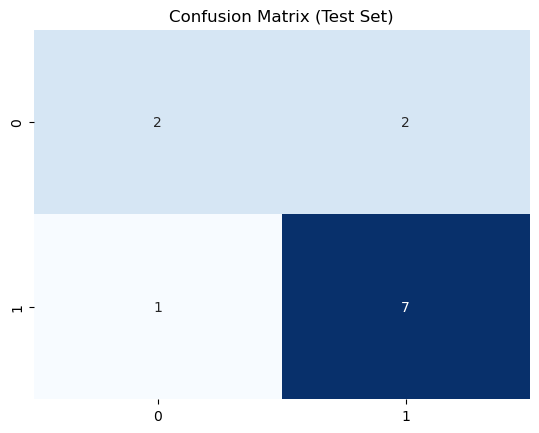

In [76]:
# test the model
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification report on test set:\n{classification_report_test}")

# Confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)");


On the test set, the model performs a bit worse than the training set in terms of accuracy. The accuracy is 0.75. However, as we care more about the precision and recall for class 1, we can see that the precision is 78% on the test set and the recall is 88%. This means that the model correctly predicts stock increases 78% of the time. More importantly, it makes 22% error of making us buy when we should not. The model correctly identifies 88% (recall) of the quarters where the stock price increased as quarters where the stock price increased.

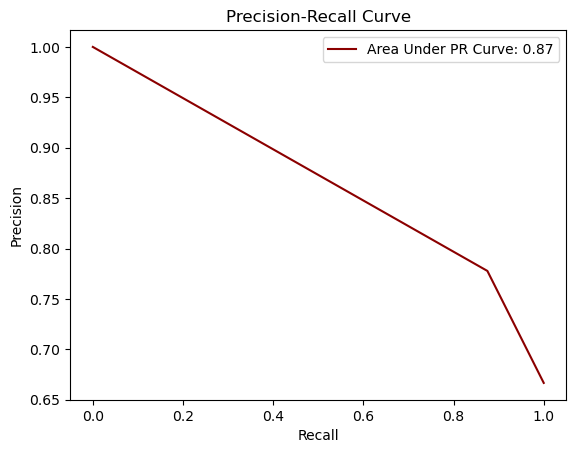

Area Under PR Curve: 0.87


In [77]:
# pr curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the area under the precision-recall curve
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color="darkred", label=f"Area Under PR Curve: {auc_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print(f"Area Under PR Curve: {auc_score:.2f}")


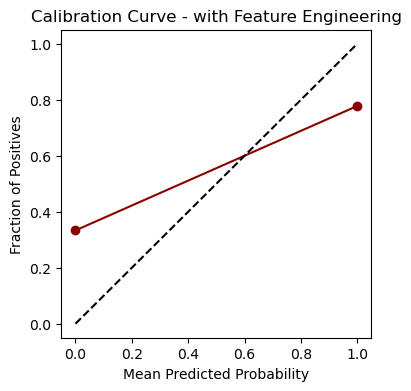

In [78]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(4, 4))
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve - with Feature Engineering")
plt.show()

The model is decently calibrated as well!

---

# XGBoost with Feature Engineering

In [79]:
# Using the already prepared dataset from the logistic regression model
xgboost_df = log_reg_rel.copy()
X = xgboost_df.drop(columns="Buy")
y = xgboost_df["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [222]:
# parameters to tune for the XGBoost model

param_grid = {
    'eta': [0.01, 0.1, 0.3], # learning rate - default=0.3
    'max_depth': [3, 5, 7, 9], # maximum depth of the tree - default=6
    'subsample': [0.5, 0.7, 1], # fraction of observations to be randomly sampled for each tree - Default=1
    'colsample_bytree': [0.5, 0.7, 1], # fraction of columns to be randomly sampled for each tree - Default=1 
    'n_estimators': [100, 200, 300], # number of trees - Default=100
    'reg_lambda': [0, .2, 0.5, .8, 1] # L2 regularization - Default=1
}

# Instantiate the XGBoost model
model = XGBClassifier(random_state=0)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring=scoring,
    refit="Precision_Class_1",
    n_jobs=-1, 
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                         'eta': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300],
                         'reg_lambda': [0, 0.2, 0.5, 0.8, 1],
                         'subsample': [0.5, 0.7, 1]},
             refit='Precision_Class_1',
             scoring={'Precision_Class_1': make_scorer(precision_score, response_method='predict', pos_label=1, average=binary, zero_division=0),
                      'Recall_Class_1': make_scorer(recall_score, response_method='predict', pos_label=1, average=binary)},
             verbose=1)

In [223]:
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'colsample_bytree': 0.7, 'eta': 0.01, 'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 0, 'subsample': 1}


The best hyperparameters chosen by the grid search have a nice interpretation too. They suggest us that by considering colsample_bytree=0.7, we can reduce the overfitting of the model. The learning rate eta=0.01 is a small value, which means that the model will learn slowly, but it will be more robust. The maximum depth of the tree is 5, which is a good value to prevent overfitting. The number of trees is 100, which is a good value to prevent overfitting. The L2 regularization term is 0, which means that there is no regularization directly on the weights!

Accuracy on training set: 0.94
Classification report on training set:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.94      0.97      0.96        33

    accuracy                           0.94        47
   macro avg       0.93      0.91      0.92        47
weighted avg       0.94      0.94      0.94        47



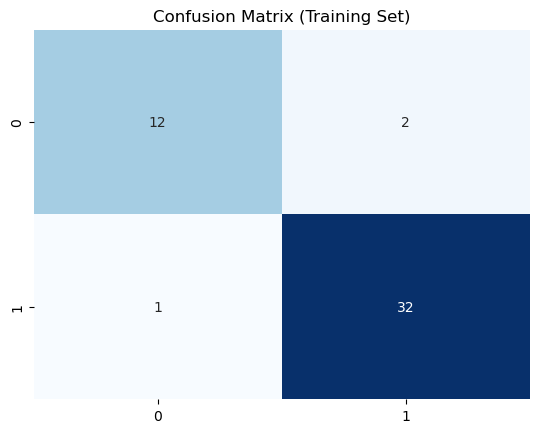

In [ ]:
model = XGBClassifier(**grid_search.best_params_, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# print the accuracy score, the precision score, and the recall score on the training set
accuracy_train = model.score(X_train, y_train)
y_pred_train = model.predict(X_train)

classification_report_train = classification_report(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}")
print(f"Classification report on training set:\n{classification_report_train}")

# confusion matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
plt.figure()
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Training Set)");

We see that the model has a whopping accuracy of 0.94 on the training set. The precision and recall for class `1` (Buy) are 0.94 and 0.97 respectively. The scores, at least on the train set, are really good. Moreover, comparing the accuracy with the naive model, we see that the model has, not surprisingly, a higher accuracy than the naive model.

Let's put the trained model on the testing set!

Accuracy on test set: 0.75
Classification report on test set:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.78      0.88      0.82         8

    accuracy                           0.75        12
   macro avg       0.72      0.69      0.70        12
weighted avg       0.74      0.75      0.74        12



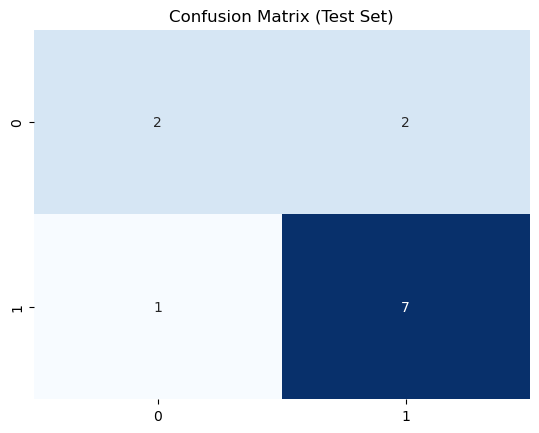

In [81]:
# test the model
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report
classification_report_test = classification_report(y_test, y_pred)
print(f"Classification report on test set:\n{classification_report_test}")

# Confusion matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Test Set)");

On the test set, the model performs a bit worse than the training set in terms of accuracy (signs of overfitting and variance). The accuracy is 0.75. However, as we care more about the precision and recall for class 1, we can see that the precision is 78% on the test set and the recall is 88%. This means that the model correctly predicts stock increases 78% of the time. More importantly, it makes 22% error of making us buy when we should not. The model correctly identifies 88% (recall) of the quarters where the stock price increased as quarters where the stock price increased (similar results to SVM).

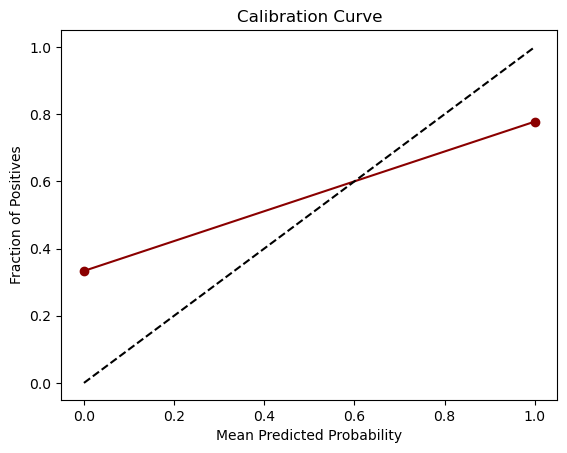

In [83]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()


The Calibration Plot for XGBoost is very similar to SVM. The model is decently calibrated.

# Neural Networks with Feature Engineering

In [499]:
nn_df = relative_df.copy()
X = nn_df.drop(columns="Buy")
y = nn_df["Buy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [500]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32) 
print(f"X_train_tensor shape: {X_train_tensor.shape}")
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
print(f"X_test_tensor shape: {X_test_tensor.shape}")
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
print(f"y_train_tensor shape: {y_train_tensor.shape}")
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
print(f"y_test_tensor shape: {y_test_tensor.shape}")

X_train_tensor shape: torch.Size([47, 9])
X_test_tensor shape: torch.Size([12, 9])
y_train_tensor shape: torch.Size([47, 1])
y_test_tensor shape: torch.Size([12, 1])


**Defining the Structure for our Neural Netowrk:**

Neural Network Architecture: `NeuralNetwork_Apple`

This is a feedforward neural network designed for binary classification, implemented using PyTorch. Below are the architectural details:

1. **Input Layer**:
   - The input size is determined by the number of features (`input_size`) - 8 in our case 

2. **Hidden Layers**:
   - **First Hidden Layer**:
   - Fully connected layer with 64 neurons. Previously, it was 128. We decreased the neurons to avoid overfitting because we saw there was a significant and non-decreasing gap between training and validation loss.
      - Batch normalization to stabilize and accelerate training.
      - ReLU activation for non-linearity.
      - Dropout to prevent overfitting, with a rate of `dropout_rate`.
   - **Second Hidden Layer**:
     - Fully connected layer with 32 neurons.
     - Batch normalization, ReLU activation, and dropout as above.
   - **Third Hidden Layer**:
     - Fully connected layer with 16 neurons.
     - Batch normalization, ReLU activation, and dropout as above.

3. **Output Layer**:
   - Fully connected layer with 1 neuron to produce the output.
   - A sigmoid activation function to map the output to the range [0, 1], representing a probability for binary classification.

4. **Initialization**:
   - Weights of all linear layers are initialized using the Kaiming Normal (HE) initialization for better convergence.
   - Biases are initialized to zero.

5. **Forward Pass**:
   - Data flows sequentially through the layers defined in the model, with each layer applying transformations such as linear mapping, activation, normalization, and dropout.

This architecture is designed to effectively handle tabular data with a moderate number of features, leveraging regularization (dropout) and batch normalization to improve generalization and training stability.


In [508]:
# Define the Neural Network model
class NeuralNetwork_Apple(nn.Module):
    def __init__(self, input_size, dropout_rate): # input_size = number of features, dropout_rate = dropout rate
        super(NeuralNetwork_Apple, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(dropout_rate),

            nn.Linear(16, 1),
            nn.Sigmoid()   
        )
        self.apply(self.init_weights)

    def init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.kaiming_normal_(module.weight)
            nn.init.zeros_(module.bias)
        
    def forward(self, x):
        return self.network(x)

After an iterative process of adjusting the learning rate and dropout rate, aided by the plots generated for each training fold and the final dataframe consisting of results, we determined that the optimal learning rate is 0.01 and the optimal dropout rate is 0.4.


Training Fold 1
Epoch [5/100], Train Loss: 0.6460, Val Loss: 0.5843
Epoch [10/100], Train Loss: 0.6260, Val Loss: 0.6347
Epoch [15/100], Train Loss: 0.5559, Val Loss: 0.6356
Epoch [20/100], Train Loss: 0.5604, Val Loss: 0.6418
Early stopping triggered at epoch 24
Fold 1 Precision: 0.7000
Fold 1 Recall: 1.0000


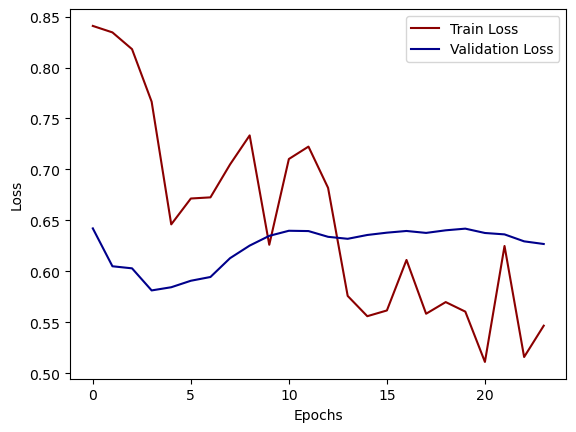


Training Fold 2
Epoch [5/100], Train Loss: 0.6514, Val Loss: 0.7493
Epoch [10/100], Train Loss: 0.5471, Val Loss: 0.6765
Epoch [15/100], Train Loss: 0.6109, Val Loss: 0.6873
Epoch [20/100], Train Loss: 0.5802, Val Loss: 0.7279
Epoch [25/100], Train Loss: 0.5057, Val Loss: 0.7509
Epoch [30/100], Train Loss: 0.4344, Val Loss: 0.7705
Early stopping triggered at epoch 33
Fold 2 Precision: 0.7143
Fold 2 Recall: 0.7143


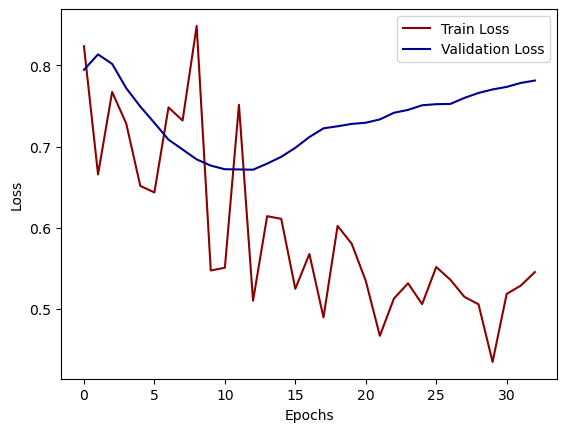


Training Fold 3
Epoch [5/100], Train Loss: 0.6466, Val Loss: 0.6869
Epoch [10/100], Train Loss: 0.6087, Val Loss: 0.6928
Epoch [15/100], Train Loss: 0.5299, Val Loss: 0.6961
Epoch [20/100], Train Loss: 0.5723, Val Loss: 0.7607
Early stopping triggered at epoch 25
Fold 3 Precision: 0.7500
Fold 3 Recall: 1.0000


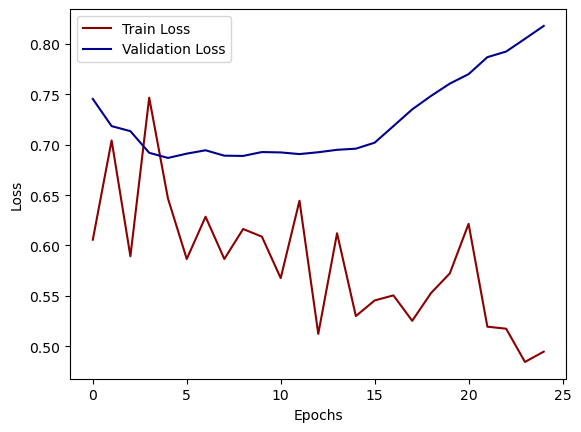


Training Fold 4
Epoch [5/100], Train Loss: 0.7349, Val Loss: 0.8226
Epoch [10/100], Train Loss: 0.7225, Val Loss: 0.7805
Epoch [15/100], Train Loss: 0.5534, Val Loss: 0.8028
Epoch [20/100], Train Loss: 0.5088, Val Loss: 0.7877
Epoch [25/100], Train Loss: 0.5344, Val Loss: 0.7803
Epoch [30/100], Train Loss: 0.5273, Val Loss: 0.7404
Epoch [35/100], Train Loss: 0.5470, Val Loss: 0.7108
Epoch [40/100], Train Loss: 0.4758, Val Loss: 0.6935
Epoch [45/100], Train Loss: 0.4419, Val Loss: 0.6982
Epoch [50/100], Train Loss: 0.5632, Val Loss: 0.7177
Epoch [55/100], Train Loss: 0.4378, Val Loss: 0.7378
Early stopping triggered at epoch 60
Fold 4 Precision: 0.6250
Fold 4 Recall: 0.8333


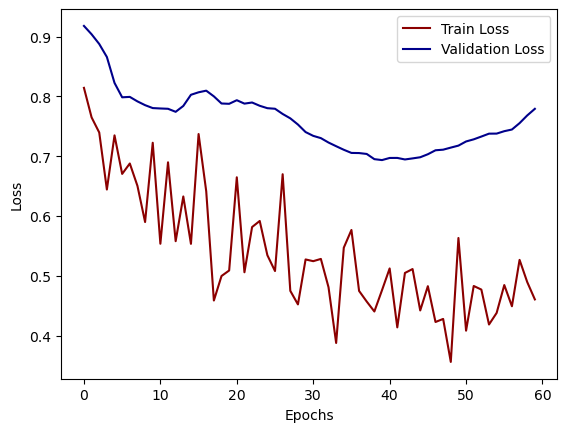


Training Fold 5
Epoch [5/100], Train Loss: 0.6646, Val Loss: 0.7690
Epoch [10/100], Train Loss: 0.5334, Val Loss: 0.6836
Epoch [15/100], Train Loss: 0.6136, Val Loss: 0.6476
Epoch [20/100], Train Loss: 0.5877, Val Loss: 0.6161
Epoch [25/100], Train Loss: 0.6619, Val Loss: 0.5972
Epoch [30/100], Train Loss: 0.5559, Val Loss: 0.6102
Epoch [35/100], Train Loss: 0.5074, Val Loss: 0.6457
Epoch [40/100], Train Loss: 0.4224, Val Loss: 0.6859
Early stopping triggered at epoch 45
Fold 5 Precision: 0.7500
Fold 5 Recall: 0.8571


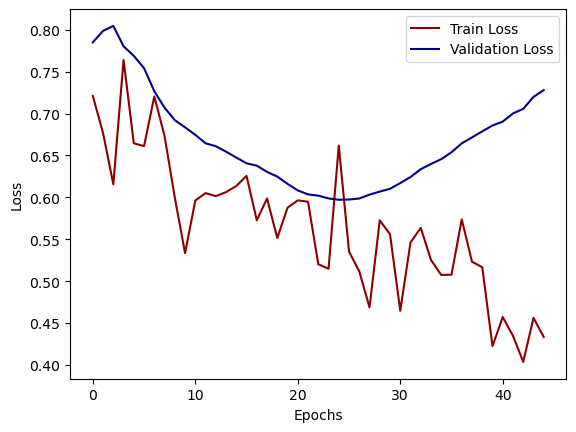


Best Precision across folds: 0.7500


fold  precision    recall  accuracy  \
2    3   0.750000  1.000000  0.777778   
4    5   0.750000  0.857143  0.666667   
1    2   0.714286  0.714286  0.600000   
0    1   0.700000  1.000000  0.700000   
3    4   0.625000  0.833333  0.555556   

                                         model_state  
2  {'network.0.weight': [[tensor(0.2985), tensor(...  
4  {'network.0.weight': [[tensor(-0.0278), tensor...  
1  {'network.0.weight': [[tensor(-0.0849), tensor...  
0  {'network.0.weight': [[tensor(0.1129), tensor(...  
3  {'network.0.weight': [[tensor(0.3464), tensor(...

In [514]:
input_size = X_train_tensor.shape[1]
best_model, data = train_and_evaluate(X_train_tensor, y_train_tensor, input_size, n_splits=5, learning_rate=0.01, dropout_rate=0.4, num_epochs=100, early_stopping_patience=20, threshold=0.5)

In [521]:
# Use the best paramters, defined here: data["model_state"].iloc[0] for the best model
best_model.load_state_dict(data["model_state"].iloc[0])

<All keys matched successfully>


Test Set Metrics:
Accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         1.0       0.73      1.00      0.84         8

    accuracy                           0.75        12
   macro avg       0.86      0.62      0.62        12
weighted avg       0.82      0.75      0.69        12


Confusion Matrix:


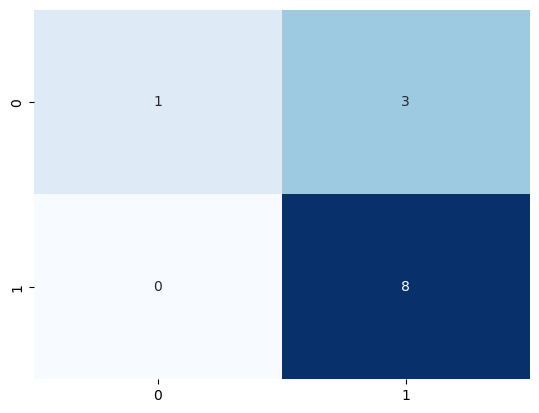

In [522]:
test_predictions, test_labels = test_model(best_model, X_test_tensor, y_test_tensor, threshold=0.5)

On the test set, the accuracy is 0.75. However, as we care more about the precision and recall for class 1, we can see that the precision is 73% on the test set and the recall is 100%. This means that the model correctly predicts stock increases 73% of the time. More importantly, it makes 27% error of making us buy when we should not. The model correctly identifies 100% (recall) of the quarters where the stock price increased as quarters where the stock price increased.

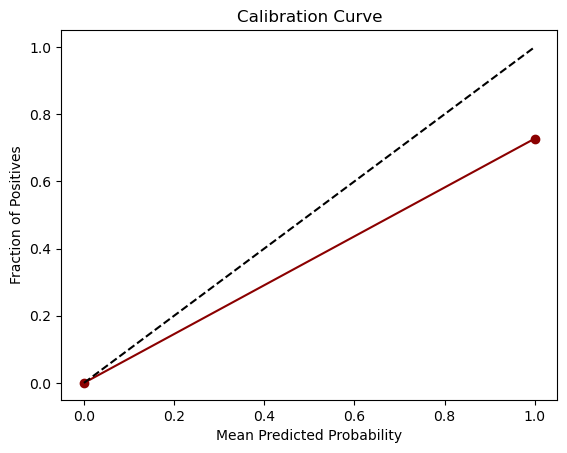

In [523]:
# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(test_labels, test_predictions, n_bins=10)

# Plot the calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker="o", color="darkred")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")

plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

The model is really well calibrated too!

---

# Conclusion and Findings

All the conclusions, insights, practicability, literatures, and resources used have been deeply discussed in the report that can be accessed via the following link: [Report](https://github.com/saifali03/Predicting_Stock_Returns/blob/main/Project_Report.pdf). Readers are invited to read the report for a comprehensive understanding.

---
